### Prepared by @moaliSafaei
#### written by jupyter notebook in python
#### reach me through: mohammadsf1998@gmail.com\tma.safaei@ut.ac.ir

In [1]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os
import pandas as pd
import time

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.random import set_seed

### Passed in parameters 

In [3]:
np.random.seed(24)
set_seed(24)

In [4]:
Image_size = (30,30) #for resizing of inputs
path = os.getcwd()
print(path)

D:\M.Sc. Degree\AI\AI - Shariat Panahi\HWs\HW5 - khodam


## Showing all classes' pics

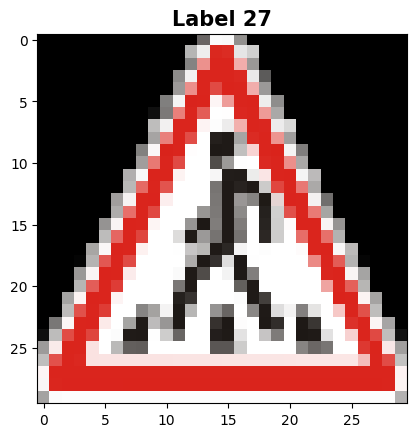

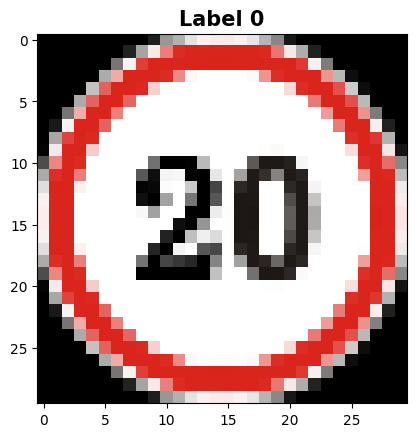

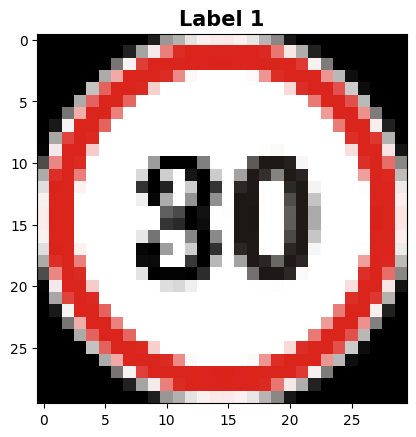

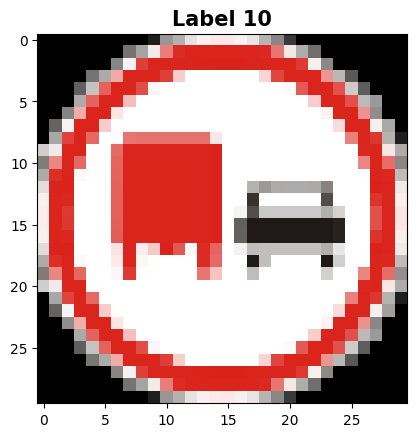

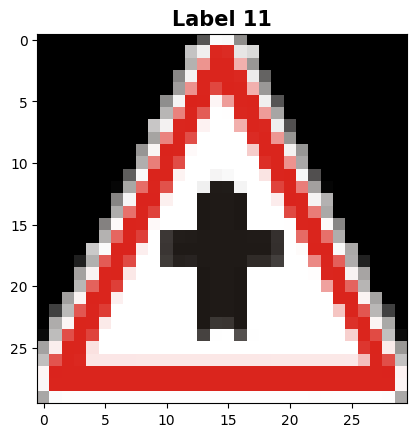

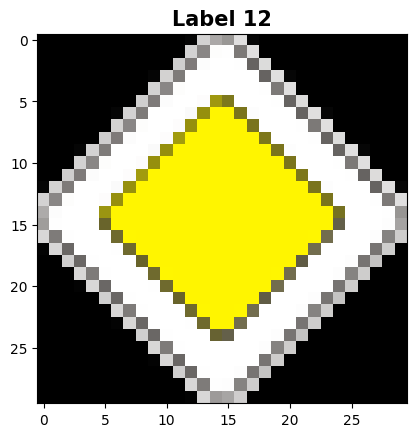

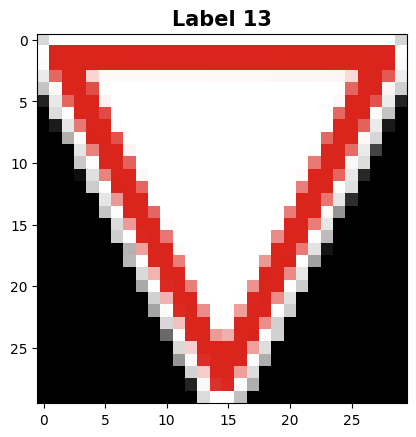

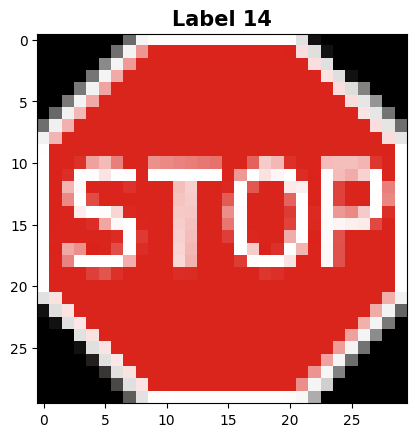

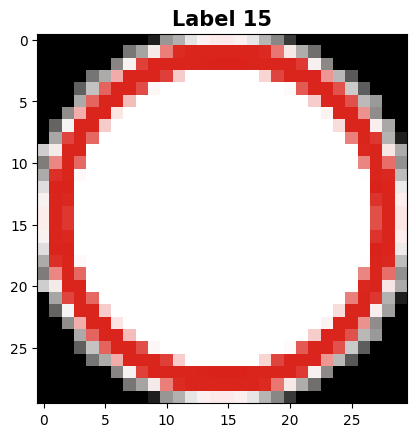

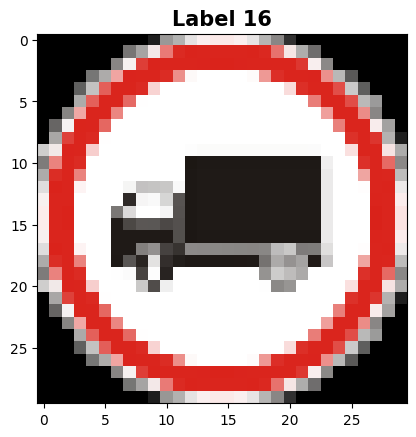

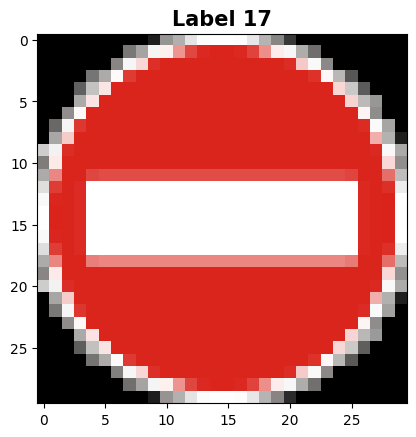

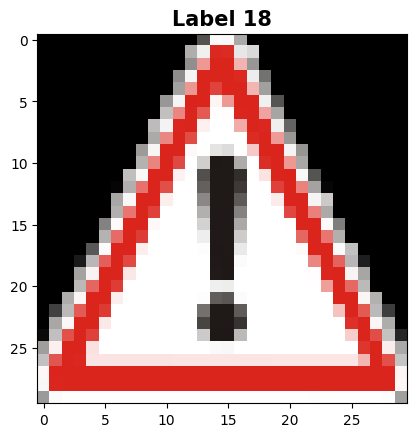

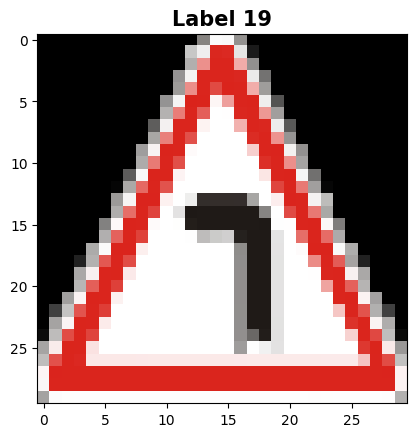

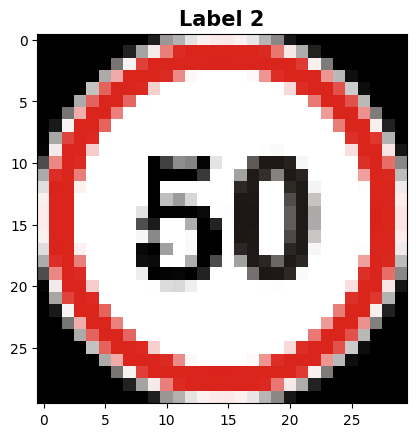

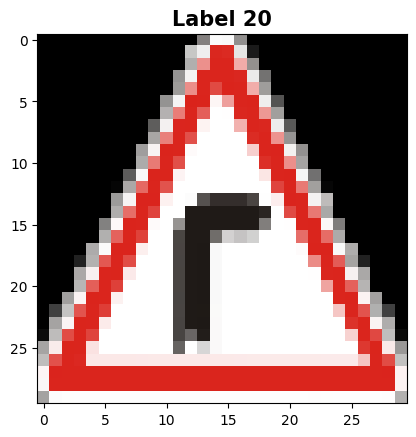

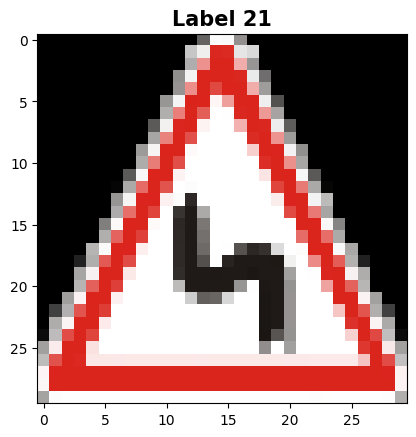

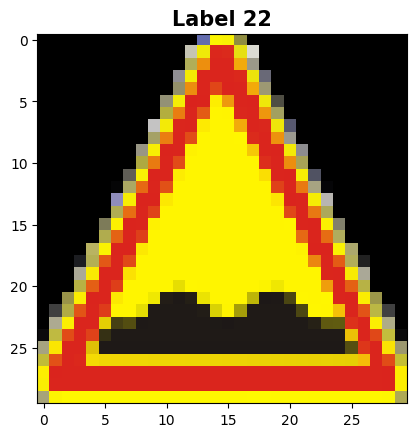

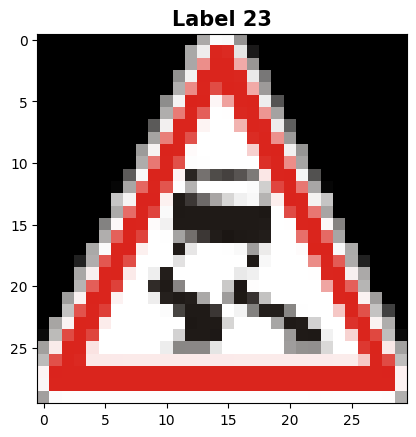

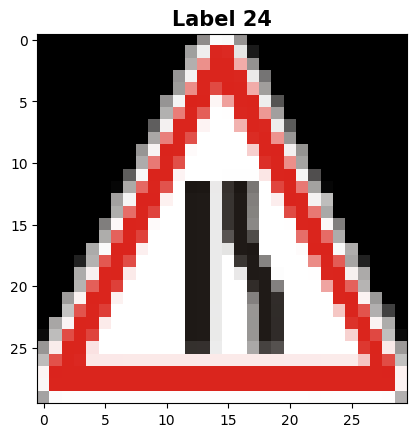

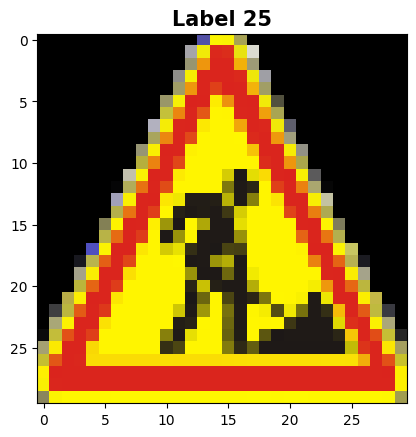

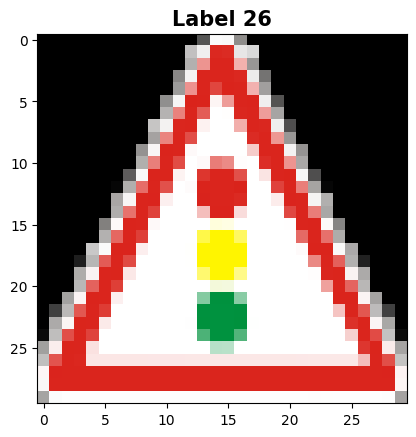

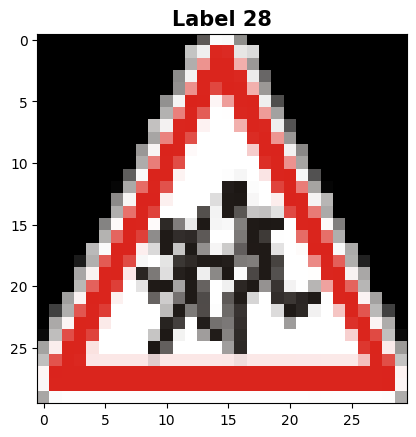

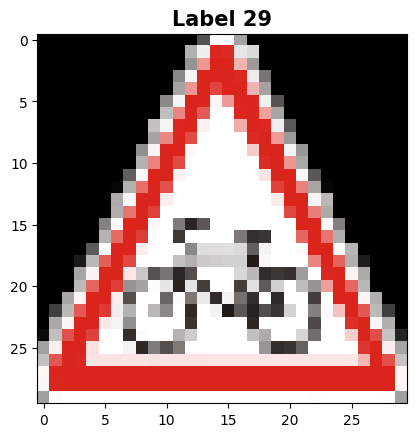

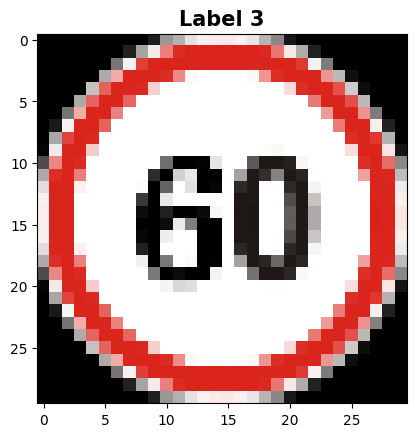

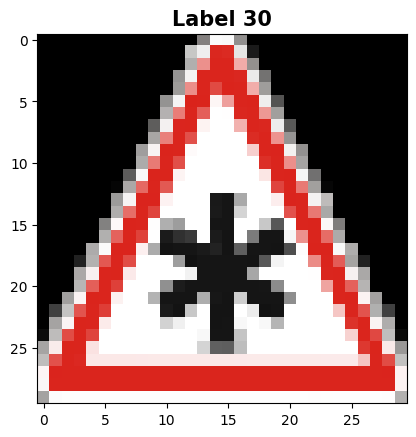

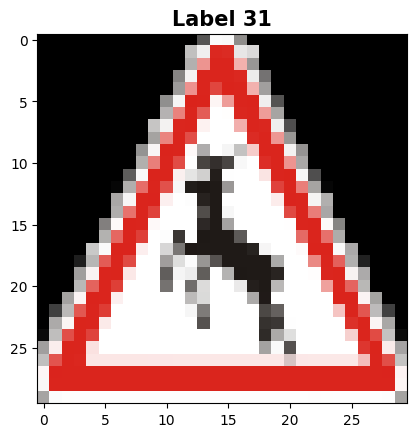

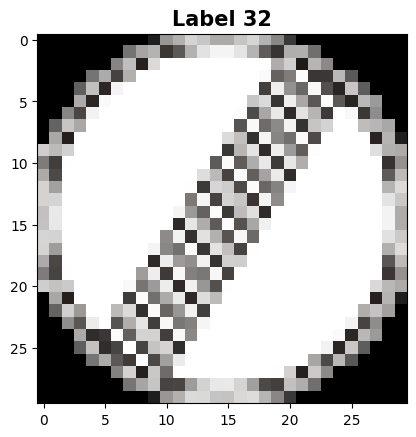

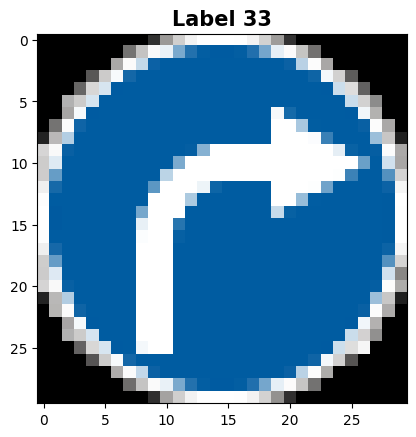

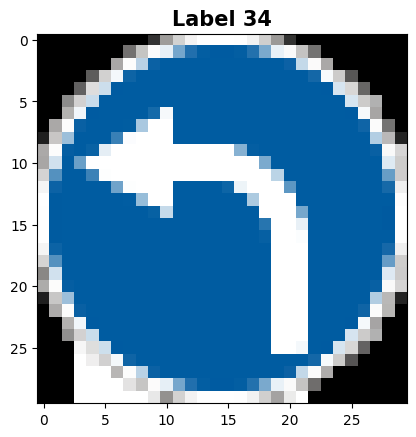

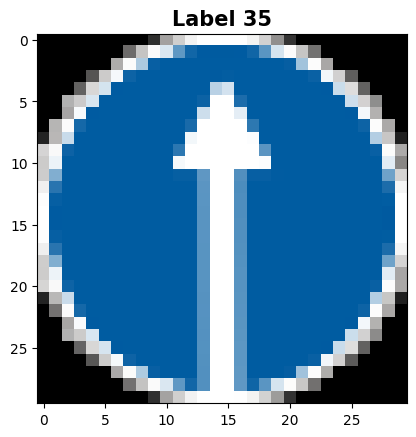

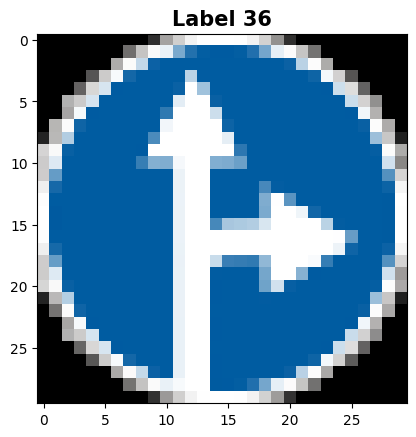

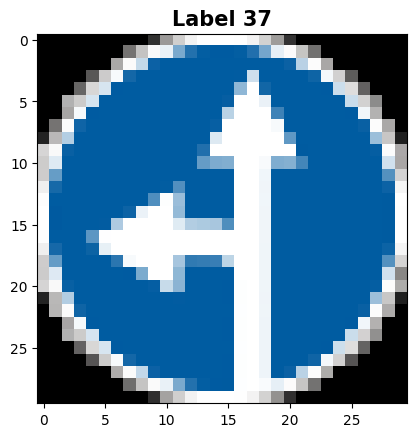

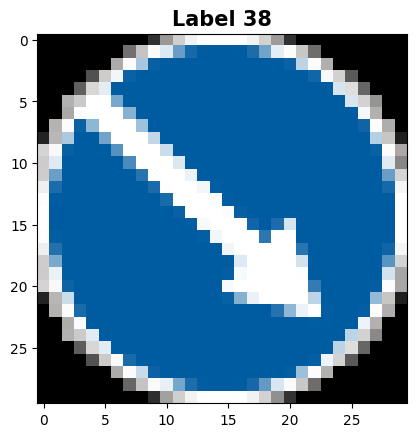

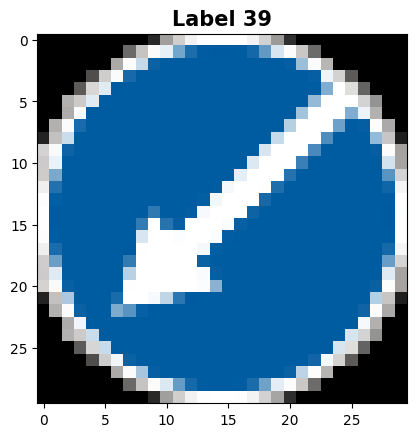

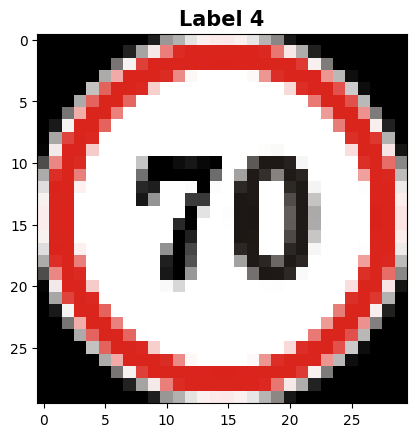

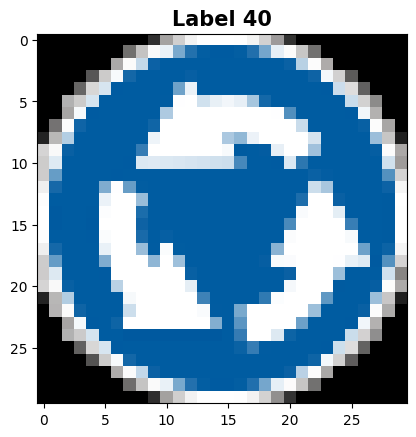

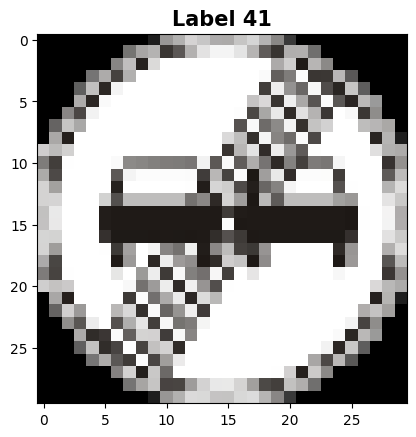

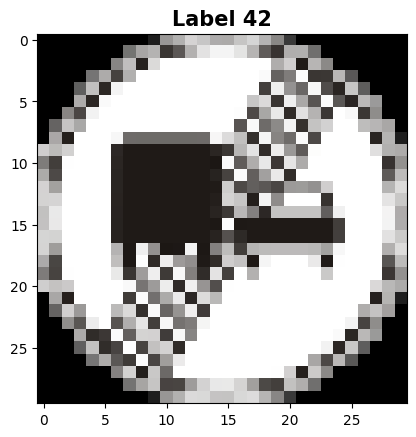

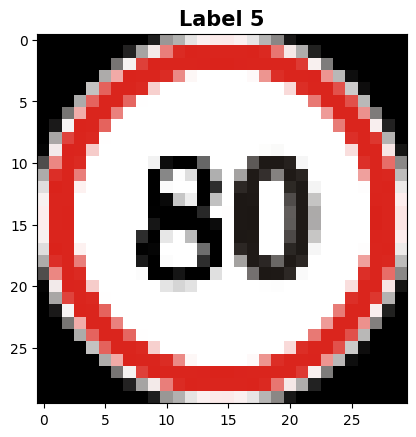

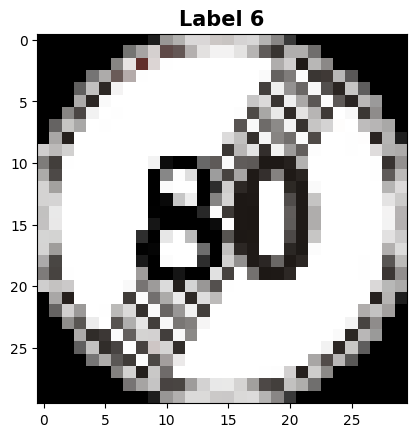

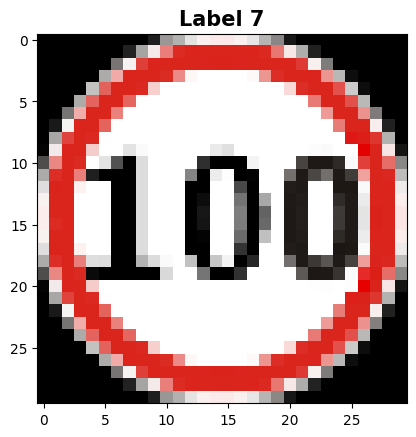

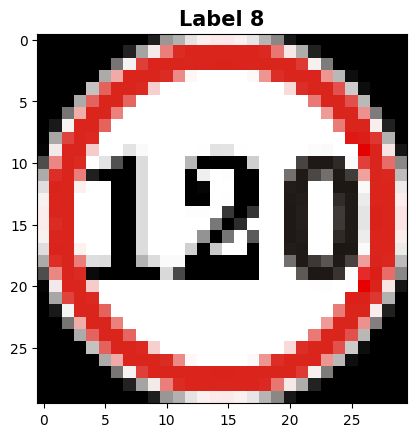

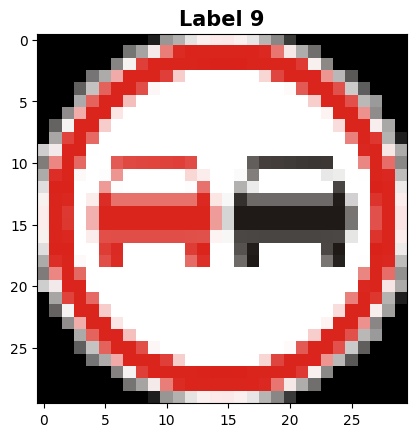

In [5]:
CSV_Meta_path = os.path.join(path,r"Meta.csv")
# print(CSV_Meta_path)
df_Meta = pd.read_csv(CSV_Meta_path)
# print(df_Meta)
y_Meta = df_Meta['ClassId'].to_numpy()
# print(y_Meta)
# print(len(y_Meta))

Meta_file_path = df_Meta['Path'].tolist()
#print(Meta_file_path)
Meta_img_path = os.path.join(path,"Data")
# print(Meta_img_path)

first_arr = len(df_Meta)
# print(first_arr)

X_Meta = np.zeros((first_arr,30,30,3))

i = 0
for item in Meta_file_path:
    #print(item)
    item = os.path.join(Meta_img_path,item)
    #print(item)
    img = cv.imread(item)
    img = cv.resize(img,Image_size)
    X_Meta[i] = img
    i += 1
#print(type(X_Meta))
fontdict = {'fontsize': 15,'fontweight': "bold"}
plt.rcParams['axes.grid'] = False

for j in range(len(df_Meta)):
    label = y_Meta[j]
    plt.title(f"Label {label}", fontdict = fontdict)
    #img_rgb = cv.cvtColor(X_Meta[label], cv.COLOR_BGR2RGB)
    plt.imshow(np.array(X_Meta[j,:,:,::-1],np.int32))
    plt.show()


## Train data manipulation

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_csv = os.path.join(path,r"Train.csv")
df_train_raw = pd.read_csv(train_csv)
# print(df_train_raw)
y_train_raw = df_train_raw['ClassId'].tolist()
#print(y_train_raw)
X_train_raw = df_train_raw['Path'].tolist()    #A string containing path of each train data
#print(X_train_raw)

X_train0, X_valid0, y_train, y_valid = train_test_split(X_train_raw, y_train_raw, test_size= 0.1 ,random_state=42)

#numpy array of y
y_train = np.array(y_train)
y_valid = np.array(y_valid)

# print(len(X_train0))
# print(len(X_train))
# print(y_train)
# print(len(y_train))

path_Data = os.path.join(path,r"Data")
print(path_Data)

train_first_arr = len(X_train0)
valid_first_arr = len(X_valid0)
# print(train_first_arr)
# print(valid_first_arr)

X_train = np.zeros((train_first_arr,30,30,3))
X_valid = np.zeros((valid_first_arr,30,30,3))
# print(pic.shape)

i = 0
for train_item in X_train0:
    train_item = os.path.join(path_Data,train_item)
    #print(type(item))
    img = cv.imread(train_item)
    img = cv.resize(img,Image_size)
    X_train[i] = img
    #plt.imshow(img)
    i += 1

j = 0
for valid_item in X_valid0:
    valid_item = os.path.join(path_Data,valid_item)
    #print(type(item))
    img = cv.imread(valid_item)
    img = cv.resize(img,Image_size)
    X_valid[j] = img
    j += 1

print(f"Type of train data: {type(X_train)}")
print(f"X_train's shape: {X_train.shape}")

# convert from integers to floats
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')

# normalize to the range 0-1
X_train /= 255.0
X_valid /= 255.0
#print(X_train)

D:\M.Sc. Degree\AI\AI - Shariat Panahi\HWs\HW5 - khodam\Data
Type of train data: <class 'numpy.ndarray'>
X_train's shape: (35288, 30, 30, 3)


### Defining a closs for bold printing of data

In [8]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
#print(color.BOLD + 'Hello, World!' + color.END)

Hello, World!


## Showing some train data

Label of the pic is: 18
Path of the pic in dataset is: Train/18/00018_00025_00008.png


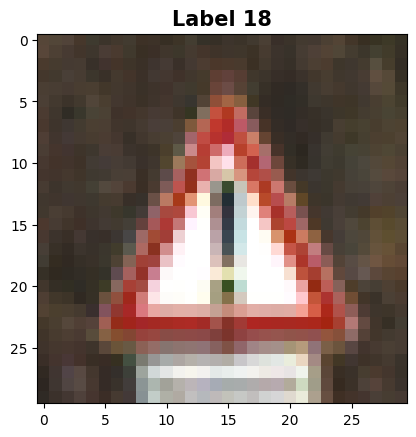

Label of the pic is: 25
Path of the pic in dataset is: Train/25/00025_00018_00020.png


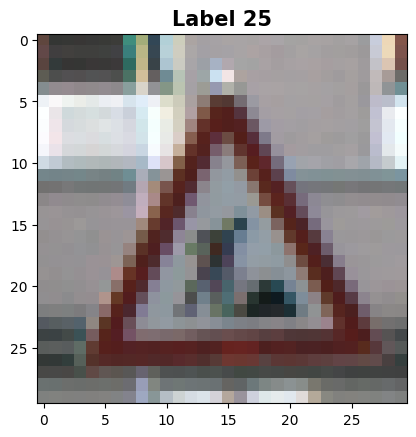

Label of the pic is: 7
Path of the pic in dataset is: Train/7/00007_00008_00001.png


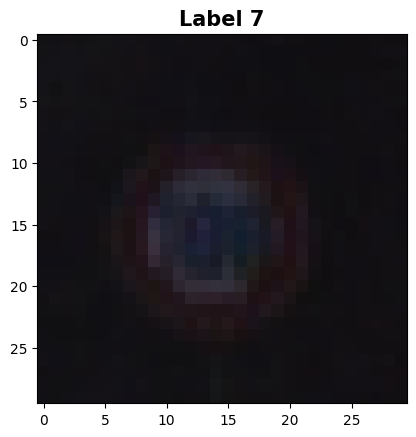

Label of the pic is: 12
Path of the pic in dataset is: Train/12/00012_00017_00026.png


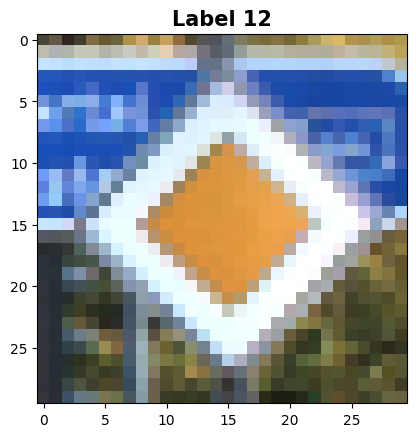

Label of the pic is: 1
Path of the pic in dataset is: Train/1/00001_00049_00002.png


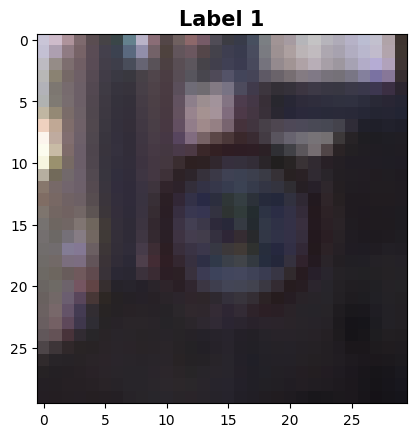

Label of the pic is: 38
Path of the pic in dataset is: Train/38/00038_00038_00003.png


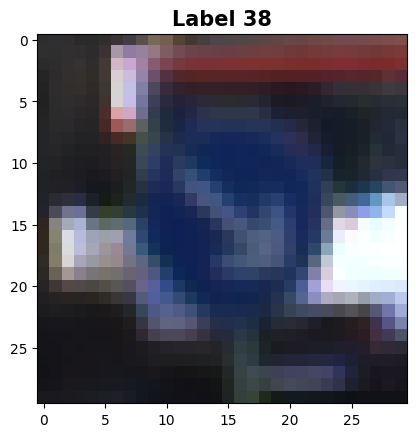

In [9]:
plt.rcParams['axes.grid'] = False
showlist = [16000,5500,735,32,29200,7700]

for i in showlist:
    pic_exp = X_train[i,:,:,::-1]
    plt.title(f"Label {y_train[i]}",fontdict=fontdict)
    print(color.BOLD + f"Label of the pic is: {y_train[i]}" + color.END)
    print(color.BOLD + f"Path of the pic in dataset is: " + color.END + f"{X_train0[i]}" )
    plt.imshow(np.array(pic_exp,np.float32))
    plt.show()

## Test data manipulation

In [10]:
path_2 = os.path.join(path,r"Test.csv")
print(path_2)
df_test = pd.read_csv(path_2)
print(df_test)
y_test = df_test['ClassId'].to_numpy()
print(y_test)
print(len(df_test))

name = df_test['Path'].tolist()
# print(type(name))

path_3 = os.path.join(path,r"Data")
print(path_3)

X_test = np.zeros((12630,30,30,3))
i = 0

for item in name:
    item = os.path.join(path_3,item)
    #print(item)
    img = cv.imread(item)
    img = cv.resize(img,Image_size)
    X_test[i,:,:,:] = img
    i += 1

print(f"Type of test data: {type(X_test)}")
print(f"X_test's shape: {X_test.shape}")


print(X_test[1,:,:,:].dtype)
print(X_test.shape)
# convert from integers to floats
X_test = X_test.astype('float32')

# normalize to the range 0-1
X_test /= 255.0
print(X_test)
#print(X_test[1,:,:,:].dtype)

D:\M.Sc. Degree\AI\AI - Shariat Panahi\HWs\HW5 - khodam\Test.csv
       Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0         53      54       6       5      48      49       16  Test/00000.png
1         42      45       5       5      36      40        1  Test/00001.png
2         48      52       6       6      43      47       38  Test/00002.png
3         27      29       5       5      22      24       33  Test/00003.png
4         60      57       5       5      55      52       11  Test/00004.png
...      ...     ...     ...     ...     ...     ...      ...             ...
12625     42      41       5       6      37      36       12  Test/12625.png
12626     50      51       6       5      45      46       33  Test/12626.png
12627     29      29       6       6      24      24        6  Test/12627.png
12628     48      49       5       6      43      44        7  Test/12628.png
12629     32      31       6       5      27      26       10  Test/12629.png

## Function for displaying results

In [37]:
def disp_result(df_result,name):
    
    plt.rcParams['axes.grid'] = True
    fig , ax = plt.subplots(1,2,figsize=(12,5))
    ax = ax.flatten()
    fig.suptitle(name, fontsize=15,fontweight="bold")
    fig.subplots_adjust(hspace=0.4, top=0.85)
    ax[0].set_title(f"Loss of the model")
    ax[0].set_xlabel(f"epochs")
    ax[0].set_ylabel(f"Loss")
    ax[0].plot(df_result['epoch'],df_result['loss'],'ro--',label = 'loss')
    ax[0].plot(df_result['epoch'],df_result['val_loss'],'bo--',label = 'val_loss')
    ax[0].legend()
    
    ax[1].set_title(f"Accuracy of the model")
    ax[1].set_xlabel(f"epochs")
    ax[1].set_ylabel(f"Accuracy")
    ax[1].plot(df_result['epoch'],df_result['accuracy'],'ro--',label = 'accuracy')
    ax[1].plot(df_result['epoch'],df_result['val_accuracy'],'bo--',label = 'val_accuracy')
    ax[1].legend(loc='center right')
    plt.show()

## Function for Confusion Matrix

In [127]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score

### Confusion Matrix DataFrame (stroting .csv file in dir)

In [128]:
def cm_df(multi_class_CM,txt):   #defining a function for storing confusion matrix as DataFrame 
    
    head = [str(i) for i in range(43)]
    CM_table = pd.DataFrame(multi_class_CM, columns= head)
#     print(color.BOLD + "Vertical Direction is True Label" + color.END )
#     print(color.BOLD + "Horizontal Direction is Predicted Label" + color.END )
    CM_table.to_csv(os.path.join(path,f"{txt}.csv"),header=True,index = True)
    
    return CM_table

### Storing a pic of Matrix

In [135]:
def confusion_Matrix_pic(y_test,ypred,txt):
    fontdict = {'fontsize': 25,'fontweight': "bold"}
    plt.rcParams['axes.grid'] = False
    plt.rcParams["figure.autolayout"] = True
    cm = confusion_matrix(y_test, ypred_SGD_lr1, labels=np.unique(y_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    fig, ax = plt.subplots(figsize=(20,20))
    disp.plot(ax = ax)
    ax.set_ylabel('True Label',fontdict= fontdict)
    ax.set_xlabel('Predicted Label',fontdict= fontdict)
    disp.im_.colorbar.remove()
    plt.title(txt,fontdict = fontdict)
    plt.savefig('Confusion Matrix '+ txt + '.png')
    plt.show()
    acc = accuracy_score(y_test, ypred)
    print(f"Accuracy score: {acc}")

### Function for specifying label to predictions

In [46]:
def argmax(y_pred):
    ypred = []
    for i in range(pred1.shape[0]):
        amax = pred1[i].argmax()
        ypred.append(amax)
    return ypred

# Creating MLP Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from keras.engine import input_layer

In [15]:
def model_mlp(X_train,y_train,X_valid,y_valid,X_test,y_test,epochs,loss,optimizer):
    
    model = Sequential()
    model.add(Flatten(input_shape=(30, 30, 3)))
    model.add(Dense(512,activation = 'relu'))
    model.add(Dense(256,activation = 'relu'))
    model.add(Dense(128,activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(43, activation = 'softmax'))
    model.summary()

    model.compile(optimizer= optimizer, loss = loss, metrics = ['accuracy'])
    history = model.fit(X_train,y_train, epochs  = epochs, validation_data = (X_valid,y_valid))
    
    MLP_result = pd.DataFrame(history.history)
    MLP_result['epoch'] = history.epoch

    score = model.evaluate(X_test,y_test)
    y_pred = model.predict(X_test)

    return MLP_result, score , y_pred

### Passed in parameter of epoch

In [16]:
epoch10 = 10    # 10 Number of epochs definition
epoch15 = 15    # 15 Number of epochs definition
epoch20 = 20    # 20 Number of epochs definition
epoch30 = 30    # 30 Number of epochs definition

### Different parameters for MLP (including learning rate)

In [17]:
loss = 'sparse_categorical_crossentropy'
optimizer1 = tf.keras.optimizers.SGD(learning_rate=0.1)
optimizer2 = tf.keras.optimizers.SGD(learning_rate=0.01)
optimizer3 = tf.keras.optimizers.SGD(learning_rate=0.001)

### Learning the network

In [18]:
start1 = time.time()
MLP_result1, score1 , pred1 = model_mlp(X_train,y_train,X_valid,y_valid,X_test,y_test,epoch30,loss,optimizer1)
end1 = time.time()
start2 = time.time()
MLP_result2, score2 , pred2 = model_mlp(X_train,y_train,X_valid,y_valid,X_test,y_test,epoch30,loss,optimizer2)
end2 = time.time()
start3 = time.time()
MLP_result3, score3 , pred3 = model_mlp(X_train,y_train,X_valid,y_valid,X_test,y_test,epoch30,loss,optimizer3)
end3 = time.time()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2700)              0         
                                                                 
 dense (Dense)               (None, 512)               1382912   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 43)                2795      
                                                                 
Total params: 1,558,187
Trainable params: 1,558,187
Non-

Epoch 10/30
1103/1103 [==============================] - 7s 6ms/step - loss: 0.2907 - accuracy: 0.9209 - val_loss: 0.3481 - val_accuracy: 0.8998
Epoch 11/30
1103/1103 [==============================] - 7s 7ms/step - loss: 0.2588 - accuracy: 0.9294 - val_loss: 0.2301 - val_accuracy: 0.9419
Epoch 12/30
1103/1103 [==============================] - 7s 6ms/step - loss: 0.2317 - accuracy: 0.9360 - val_loss: 0.2746 - val_accuracy: 0.9212
Epoch 13/30
1103/1103 [==============================] - 7s 6ms/step - loss: 0.2051 - accuracy: 0.9464 - val_loss: 0.2500 - val_accuracy: 0.9301
Epoch 14/30
1103/1103 [==============================] - 7s 6ms/step - loss: 0.1904 - accuracy: 0.9481 - val_loss: 0.2138 - val_accuracy: 0.9429
Epoch 15/30
1103/1103 [==============================] - 7s 6ms/step - loss: 0.1866 - accuracy: 0.9503 - val_loss: 0.1819 - val_accuracy: 0.9556
Epoch 16/30
1103/1103 [==============================] - 7s 6ms/step - loss: 0.1556 - accuracy: 0.9590 - val_loss: 0.1844 - val_ac

In [19]:
print(f"time of running for MLP with learning rate 0.1 (in seconds): {end1 - start1}")
print(f"time of running for MLP with learning rate 0.01 (in seconds): {end2 - start2}")
print(f"time of running for MLP with learning rate 0.001 (in seconds): {end3 - start3}")

time of running for MLP with learning rate 0.1 (in seconds): 221.26358222961426
time of running for MLP with learning rate 0.01 (in seconds): 215.70986008644104
time of running for MLP with learning rate 0.001 (in seconds): 213.4354887008667


### Displaying Results for MLP

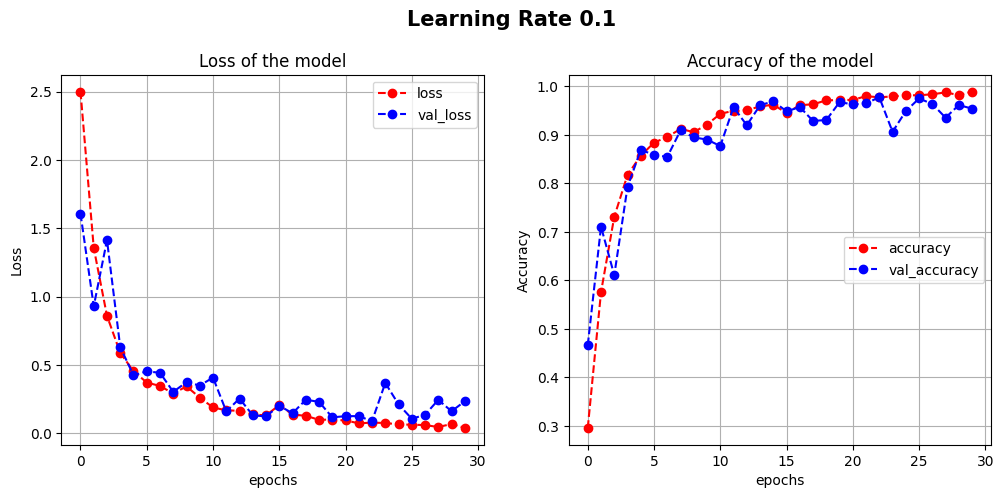

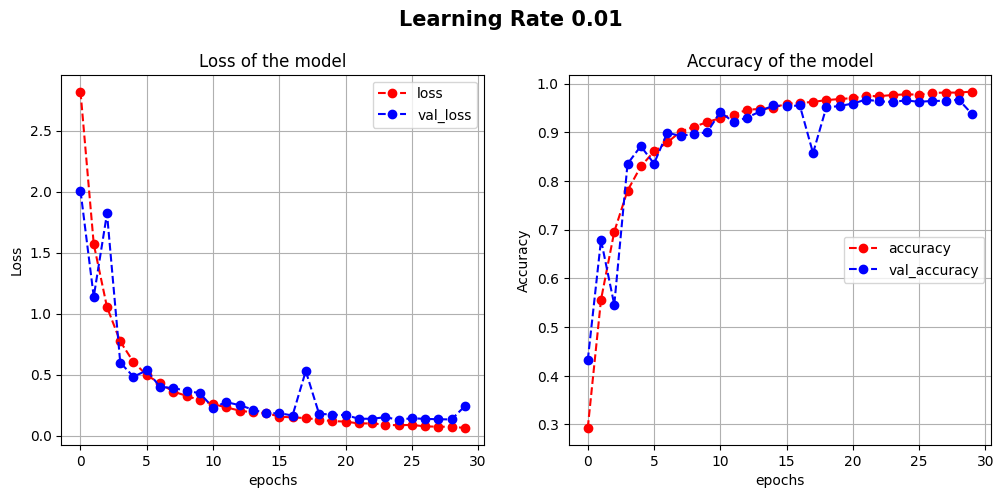

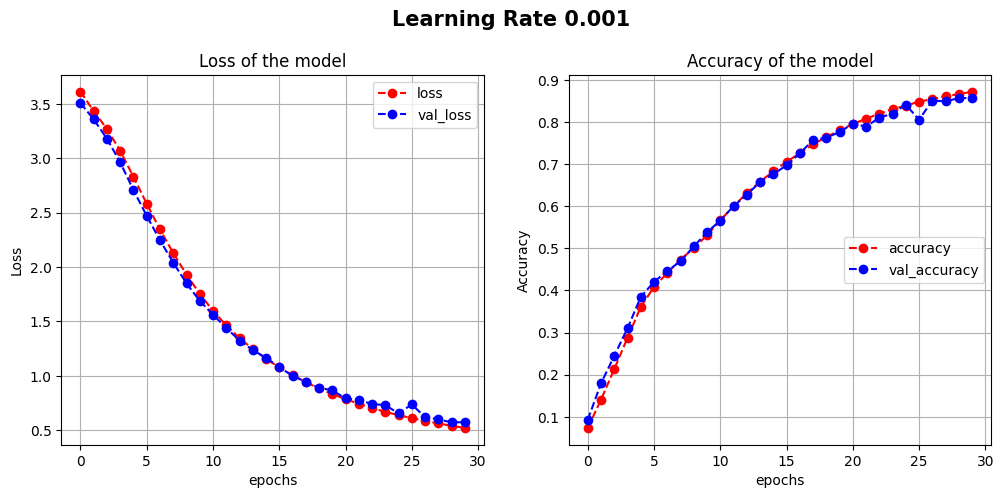

In [20]:
MLP1_name = f"Learning Rate 0.1"
disp_result(MLP_result1,MLP1_name)
MLP2_name = f"Learning Rate 0.01"
disp_result(MLP_result2,MLP2_name)
MLP3_name = f"Learning Rate 0.001"
disp_result(MLP_result3,MLP3_name)

### Accuracy and Losses

In [21]:
print("MLP Resuts of learning rate 0.1\n",MLP_result1.tail(3))
print("\n\nMLP Resuts of learning rate 0.01\n",MLP_result2.tail(3))
print("\n\nMLP Resuts of learning rate 0.001\n",MLP_result3.tail(3))

MLP Resuts of learning rate 0.1
         loss  accuracy  val_loss  val_accuracy  epoch
27  0.044692  0.987276  0.243663      0.935221     27
28  0.066699  0.981779  0.159971      0.961234     28
29  0.038204  0.989090  0.233195      0.953838     29


MLP Resuts of learning rate 0.01
         loss  accuracy  val_loss  val_accuracy  epoch
27  0.073281  0.981779  0.134462      0.964805     27
28  0.072546  0.981637  0.132599      0.967100     28
29  0.063314  0.983847  0.241458      0.937516     29


MLP Resuts of learning rate 0.001
         loss  accuracy  val_loss  val_accuracy  epoch
27  0.561653  0.861086  0.598837      0.848763     27
28  0.539732  0.865620  0.571288      0.856414     28
29  0.520169  0.872053  0.572590      0.856669     29


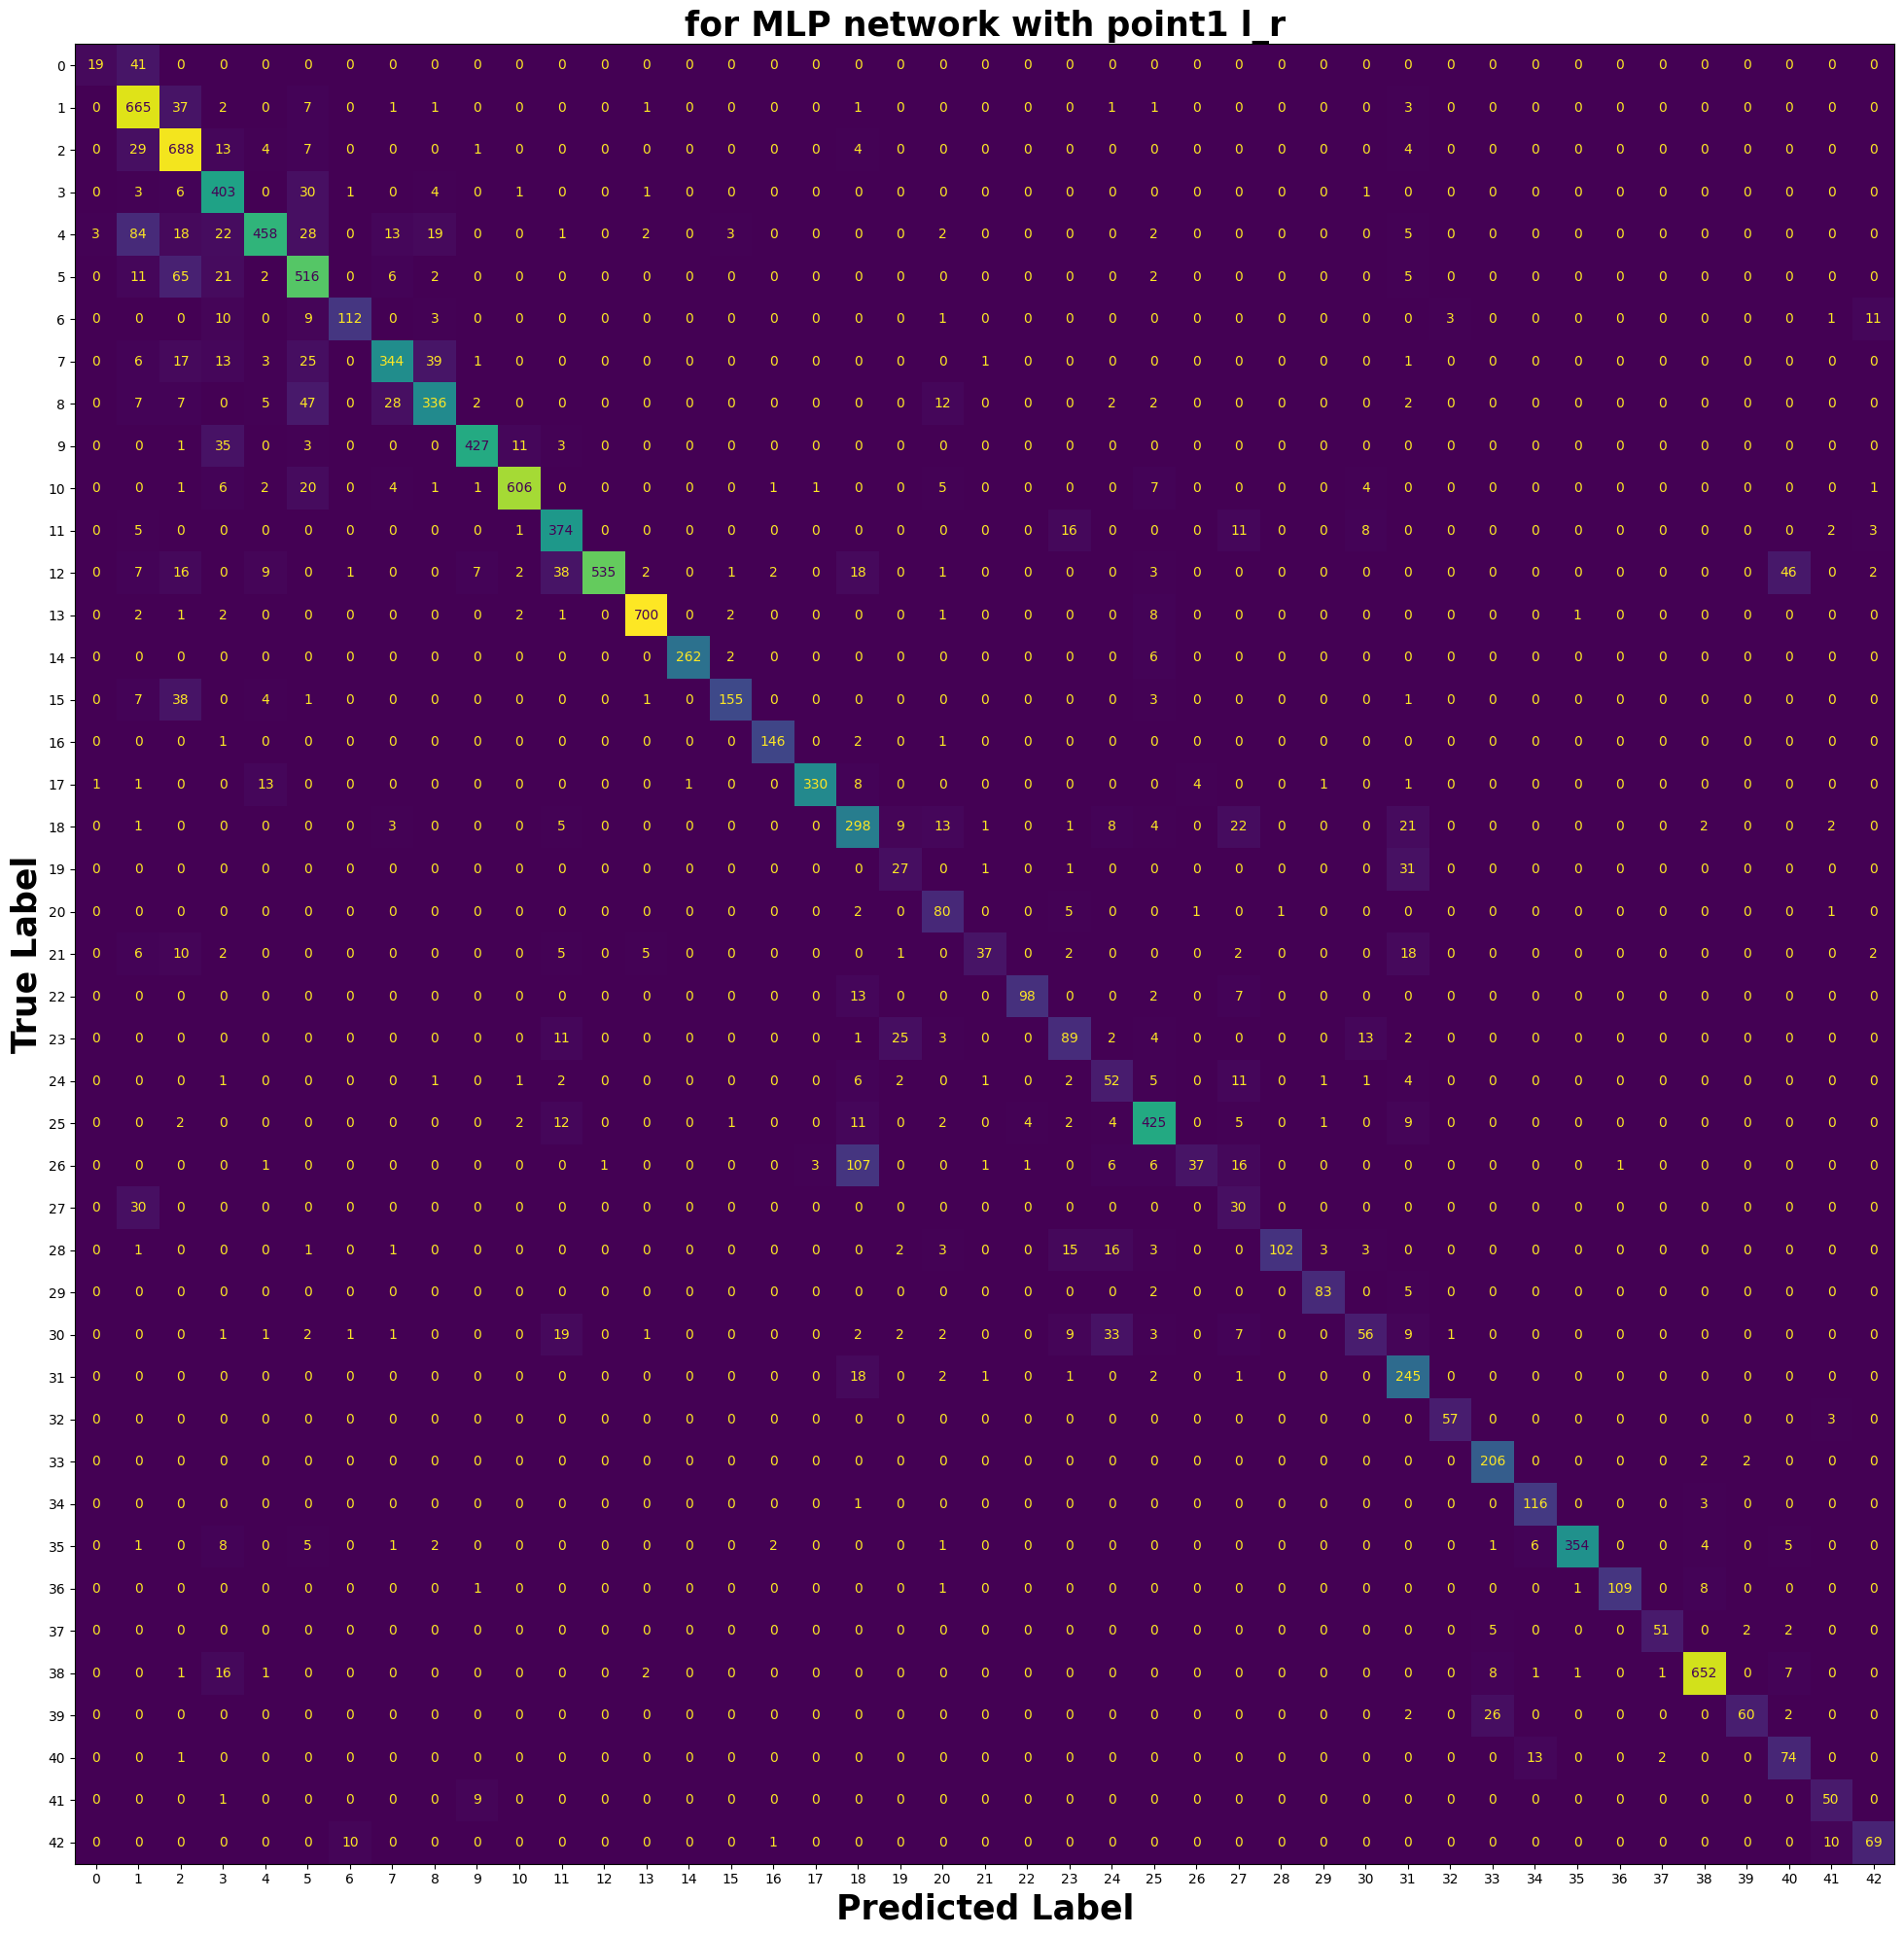

Accuracy score: 0.8339667458432304


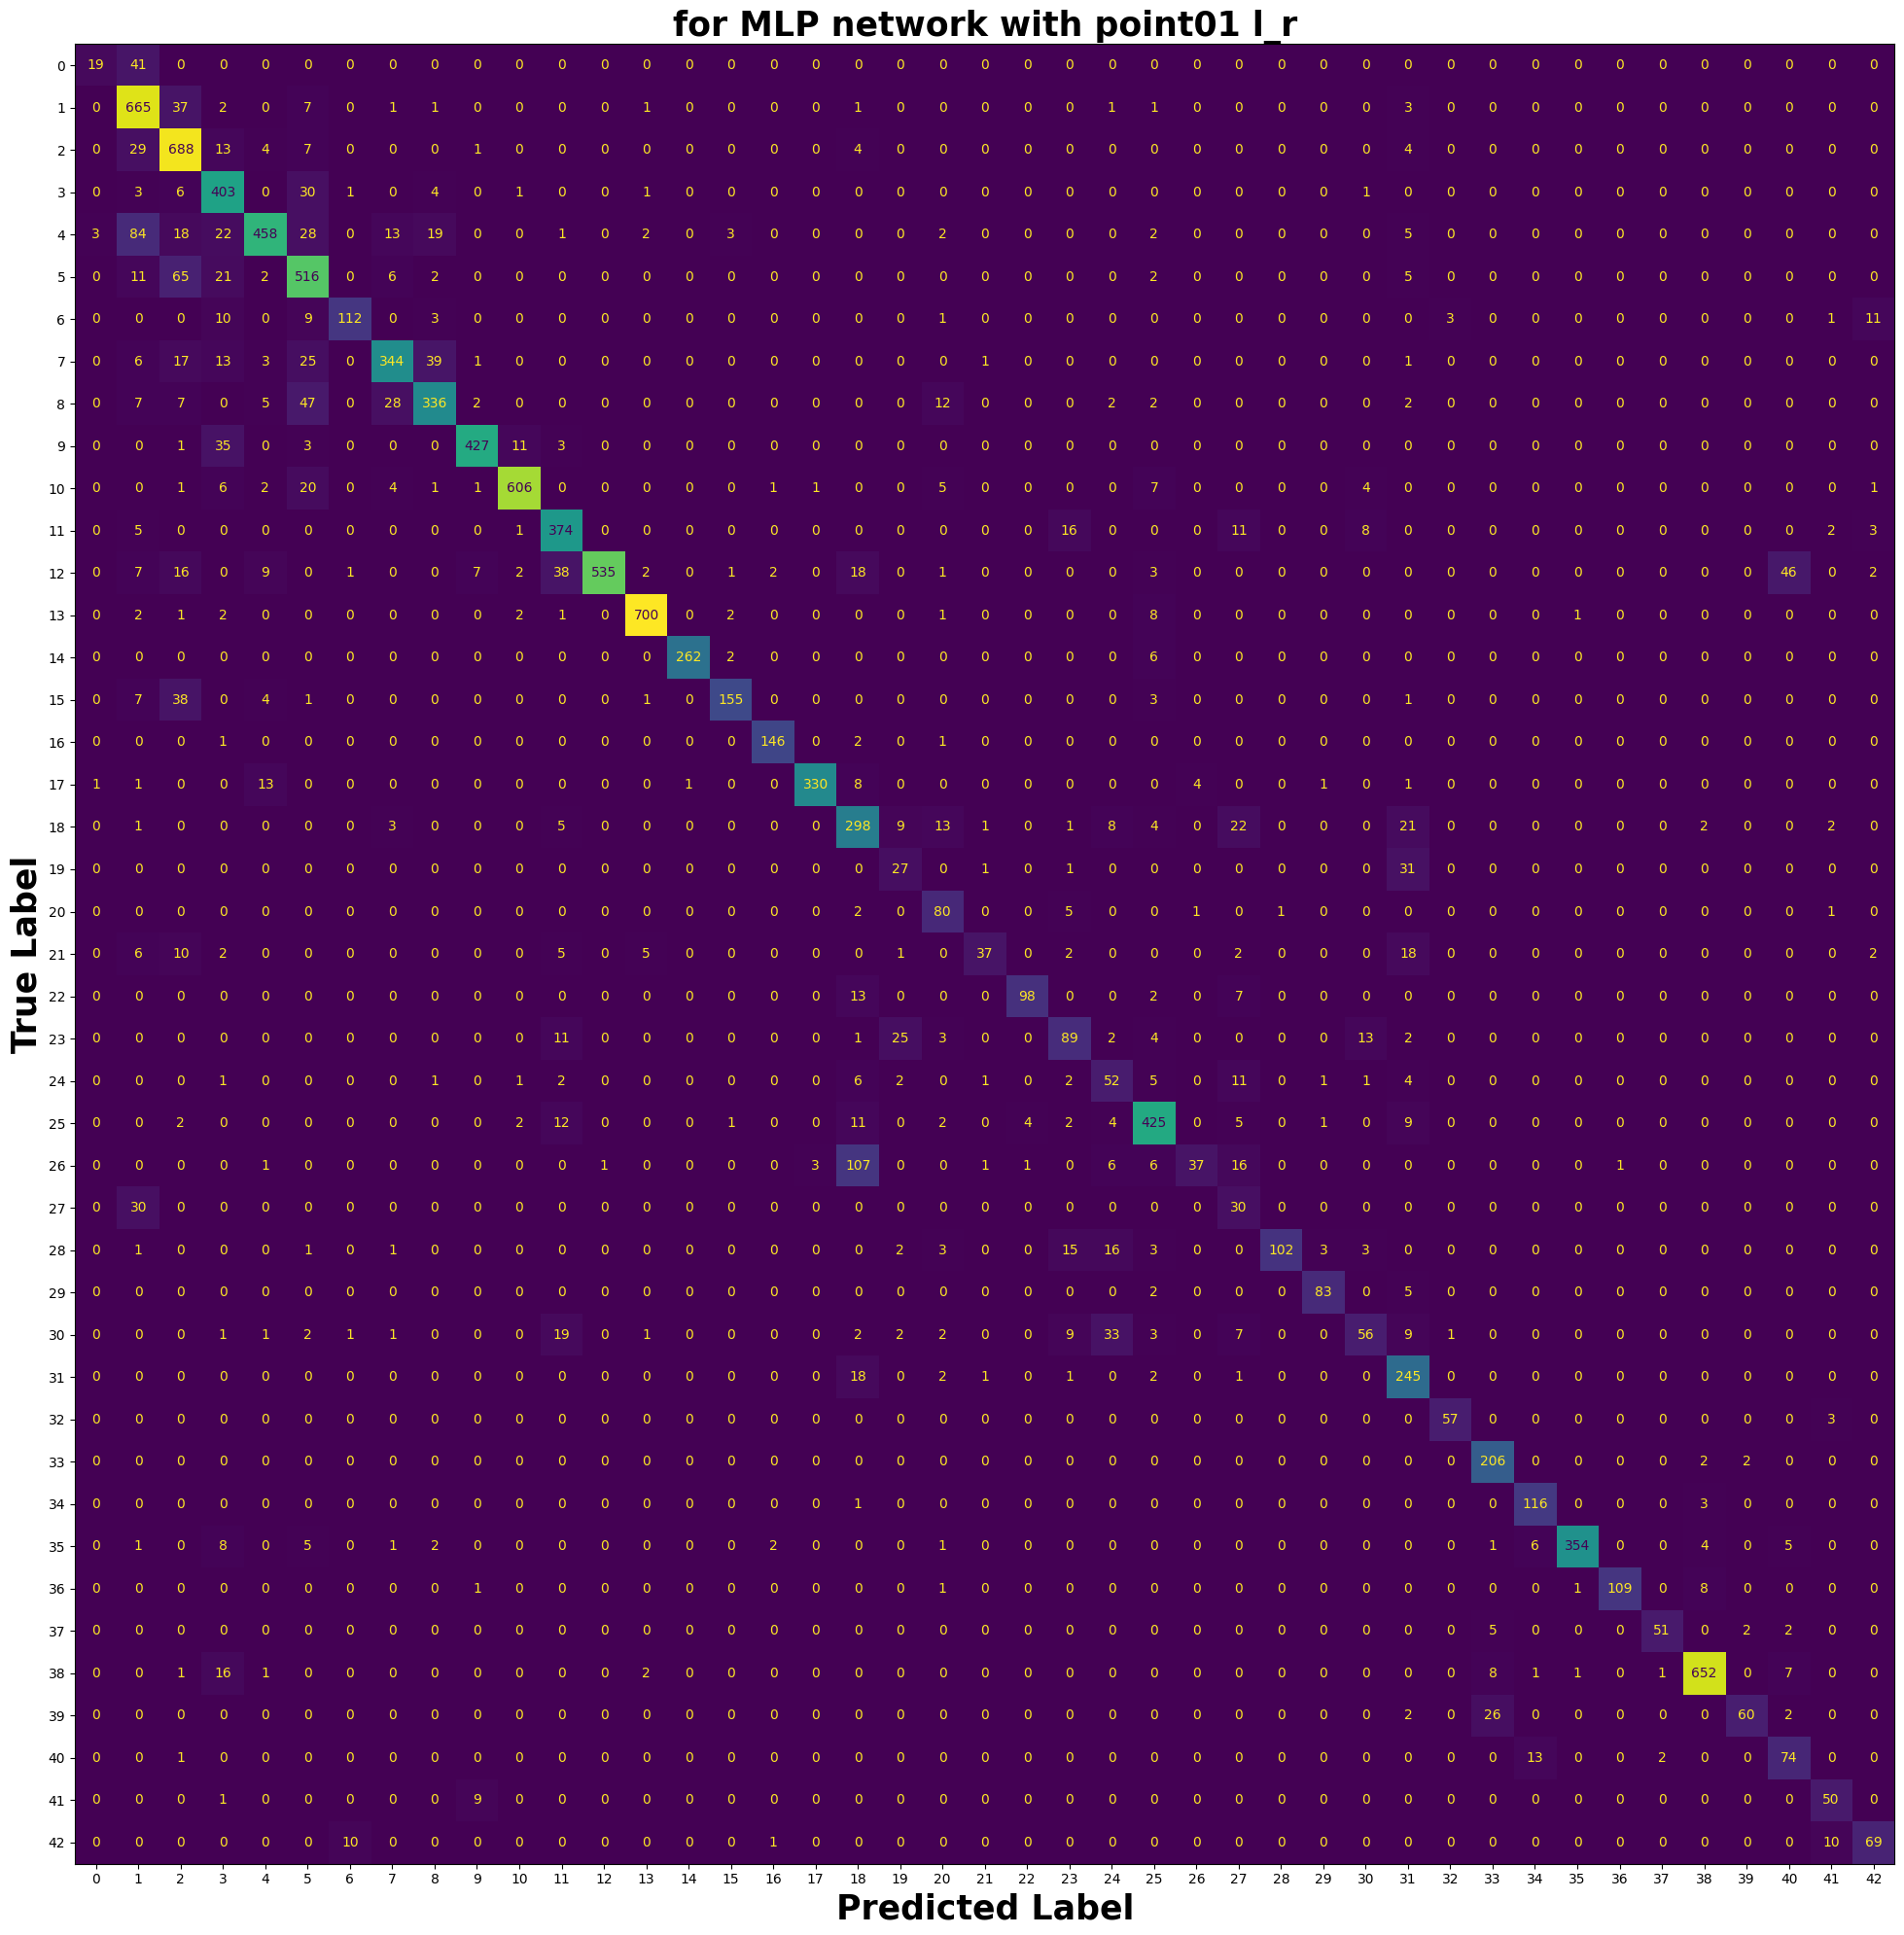

Accuracy score: 0.8339667458432304


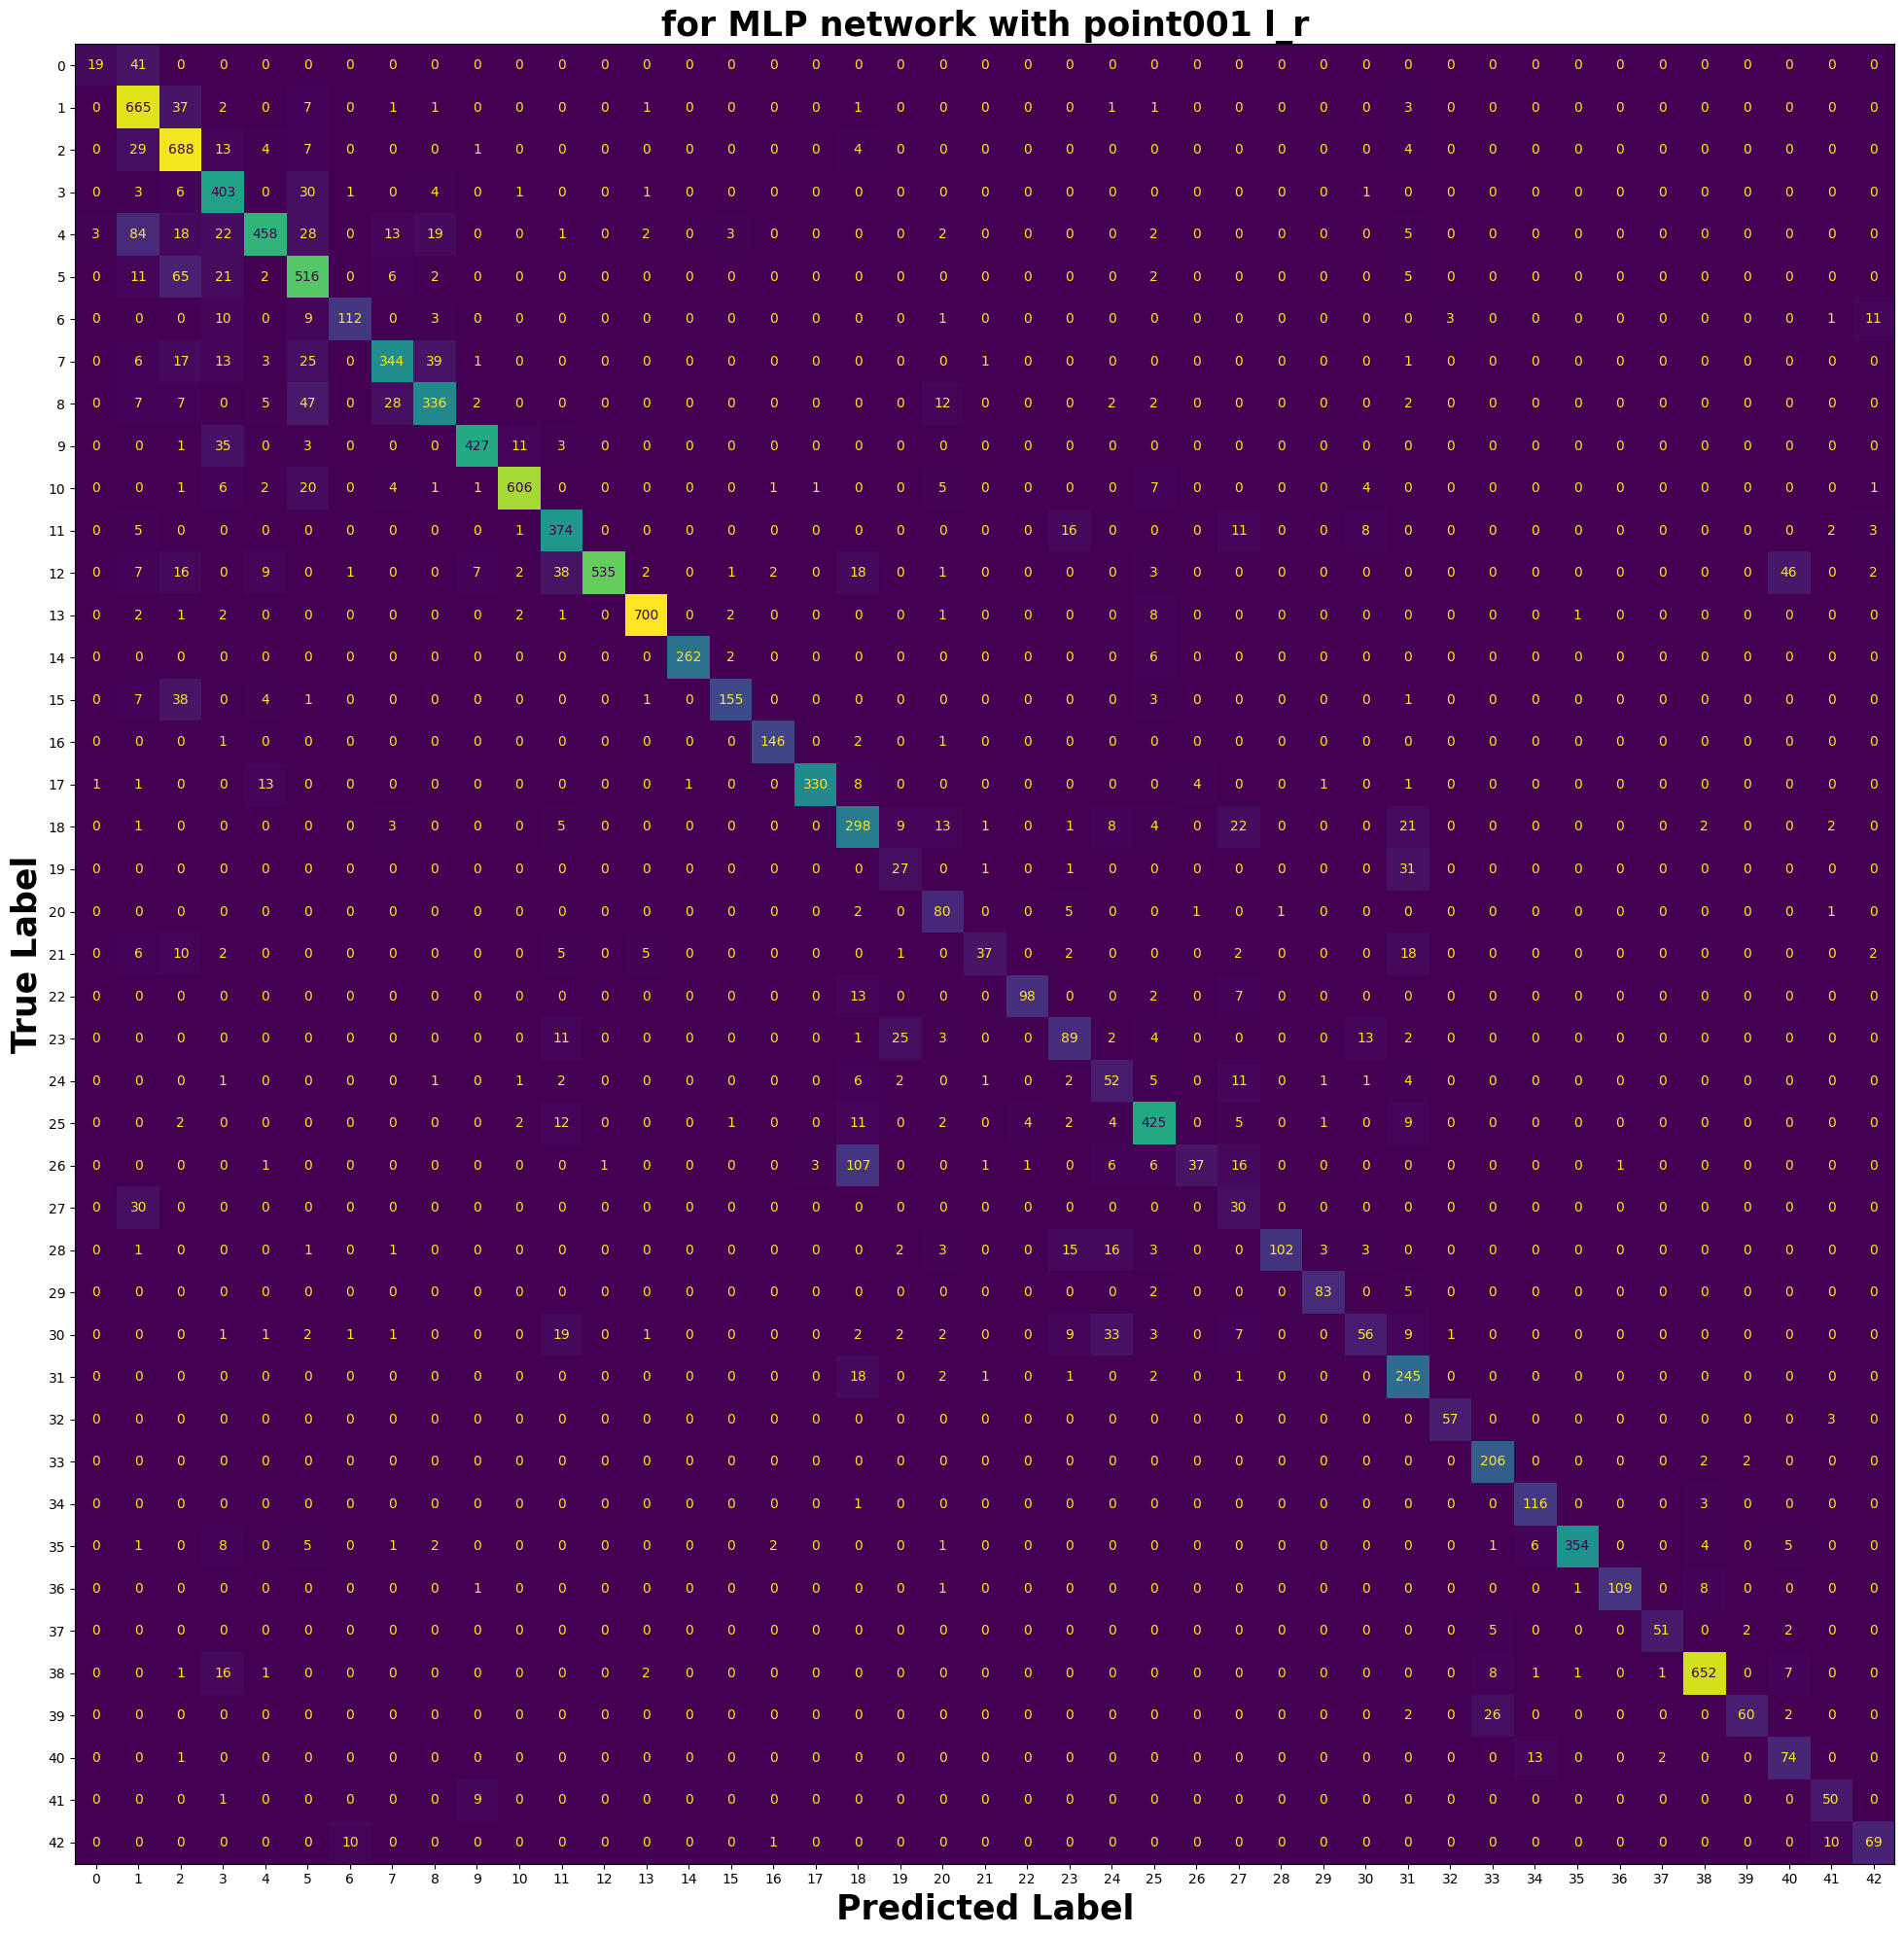

Accuracy score: 0.8339667458432304


In [136]:
y_pred_lr1 = argmax(pred1) # for learning_rate 0.1
y_pred_lr01 = argmax(pred2) # for learning_rate 0.01
y_pred_lr001 = argmax(pred3) # for learning_rate 0.001

Categ_CM_lr1 = confusion_matrix(y_test, y_pred_lr1)
Categ_CM_lr01 = confusion_matrix(y_test, y_pred_lr01)
Categ_CM_lr001 = confusion_matrix(y_test, y_pred_lr001)

#print(Categ_CM_lr1)
#multi_label_CM = multilabel_confusion_matrix(y_test, y_pred_lr1)
#print(multi_label_CM)
confusion_Matrix_pic(y_test, y_pred_lr1,'for MLP network with point1 l_r')
confusion_Matrix_pic(y_test, y_pred_lr01,'for MLP network with point01 l_r')
confusion_Matrix_pic(y_test, y_pred_lr001,'for MLP network with point001 l_r')

# Creating CNN Models

In [24]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D , AveragePooling2D

### MaxPooling

In [40]:
def cnn_maxpooling(X_train,y_train,X_valid,y_valid,X_test,y_test,batch_size,epochs):
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation = 'relu' , input_shape = (30,30,3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="same"))
    model.add(Conv2D(32,(3,3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="same"))
    model.add(Flatten())
    model.add(Dense(128,activation = tf.nn.relu))
    model.add(Dense(43,activation = tf.nn.softmax))

    model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
    #plot_model(model,show_shapes = True)
    
    history = model.fit(X_train , y_train , batch_size = batch_size,epochs = epochs,
                        validation_data = (X_valid,y_valid))
    CNN_result = pd.DataFrame(history.history)
    CNN_result['epoch'] = history.epoch
    y_pred = model.predict(X_test)

        
    return CNN_result, y_pred

### AveragePooling

In [41]:
def cnn_avgpooling(X_train,y_train,X_valid,y_valid,X_test,y_test,batch_size,epochs):
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation = 'relu' , input_shape = (30,30,3)))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=None, padding="same"))
    model.add(Conv2D(32,(3,3),activation = 'relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=None, padding="same"))
    model.add(Flatten())
    model.add(Dense(128,activation = tf.nn.relu))
    model.add(Dense(43,activation = tf.nn.softmax))
    
    model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
    #plot_model(model,show_shapes = True)
        
    history = model.fit(X_train , y_train , batch_size = batch_size,epochs = epochs, 
                        validation_data = (X_valid,y_valid))
    CNN_result = pd.DataFrame(history.history)
    CNN_result['epoch'] = history.epoch
    y_pred = model.predict(X_test)
    
    return CNN_result , y_pred

### Comparison of MaxPooling & AveragePooling

In [42]:
#defining Hyper parameters
batch_size = 64

#Training the models
start_maxpooling = time.time()
maxpooling_result, ypred_maxpooling  = cnn_maxpooling(X_train,y_train,X_valid,y_valid,X_test,y_test,batch_size,epoch20)
end_maxpooling = time.time()

start_avgpooling = time.time()
avgpooling_result, ypred_avgpooling  = cnn_avgpooling(X_train,y_train,X_valid,y_valid,X_test,y_test,batch_size,epoch20)
end_avgpooling = time.time()
print(f"time of running for CNN with MaxPooling: {end_maxpooling - start_maxpooling}\ntime of running for CNN with AvgPooling: {end_avgpooling - start_avgpooling}  (both in seconds)")


Epoch 1/20
552/552 [==============================] - 14s 25ms/step - loss: 1.3786 - accuracy: 0.6338 - val_loss: 0.4488 - val_accuracy: 0.8689
Epoch 2/20
552/552 [==============================] - 13s 24ms/step - loss: 0.2730 - accuracy: 0.9262 - val_loss: 0.2296 - val_accuracy: 0.9421
Epoch 3/20
552/552 [==============================] - 13s 24ms/step - loss: 0.1397 - accuracy: 0.9646 - val_loss: 0.1139 - val_accuracy: 0.9707
Epoch 4/20
552/552 [==============================] - 13s 24ms/step - loss: 0.0923 - accuracy: 0.9770 - val_loss: 0.0960 - val_accuracy: 0.9768
Epoch 5/20
552/552 [==============================] - 13s 24ms/step - loss: 0.0623 - accuracy: 0.9854 - val_loss: 0.0962 - val_accuracy: 0.9768
Epoch 6/20
552/552 [==============================] - 13s 24ms/step - loss: 0.0470 - accuracy: 0.9881 - val_loss: 0.0715 - val_accuracy: 0.9804
Epoch 7/20
552/552 [==============================] - 13s 24ms/step - loss: 0.0420 - accuracy: 0.9891 - val_loss: 0.0692 - val_accuracy:

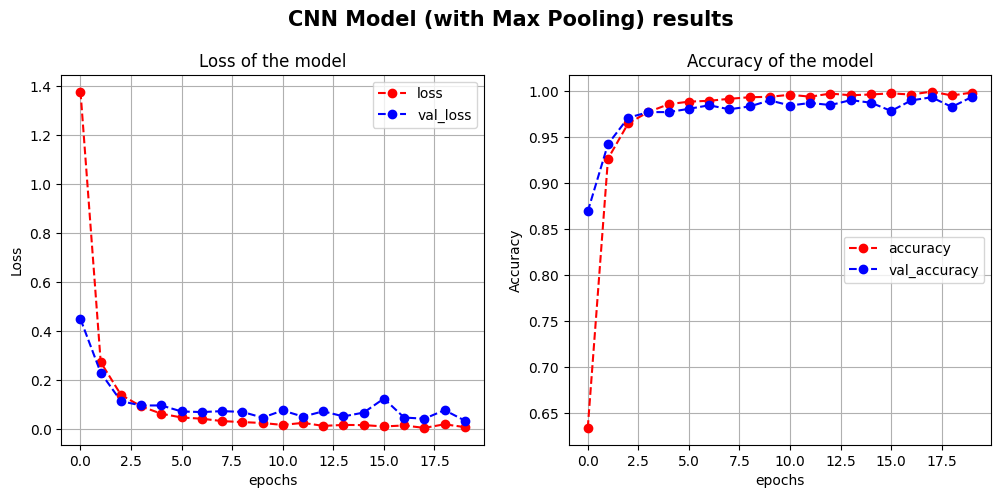

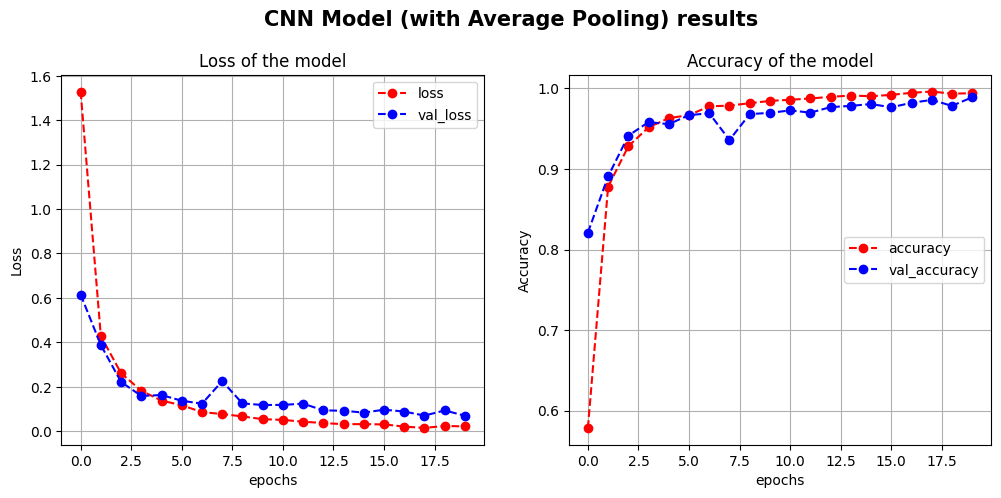



CNN Network with MaxPooling Results:
         loss  accuracy  val_loss  val_accuracy  epoch
17  0.004464  0.999121  0.041907      0.992859     17
18  0.019241  0.994842  0.077081      0.982402     18
19  0.007674  0.998045  0.034259      0.993369     19


CNN Network with AveragePooling Results:
         loss  accuracy  val_loss  val_accuracy  epoch
17  0.014619  0.996118  0.069977      0.985718     17
18  0.023426  0.993482  0.093360      0.978322     18
19  0.021196  0.994021  0.069435      0.989033     19


In [43]:
MaxPool_name = f"CNN Model (with Max Pooling) results"
disp_result(maxpooling_result,MaxPool_name)
AvgPool_name = f"CNN Model (with Average Pooling) results"
disp_result(avgpooling_result,AvgPool_name)


print("\n\nCNN Network with MaxPooling Results:\n",maxpooling_result.tail(3))
print("\n\nCNN Network with AveragePooling Results:\n",avgpooling_result.tail(3))

### Confusion Matrix

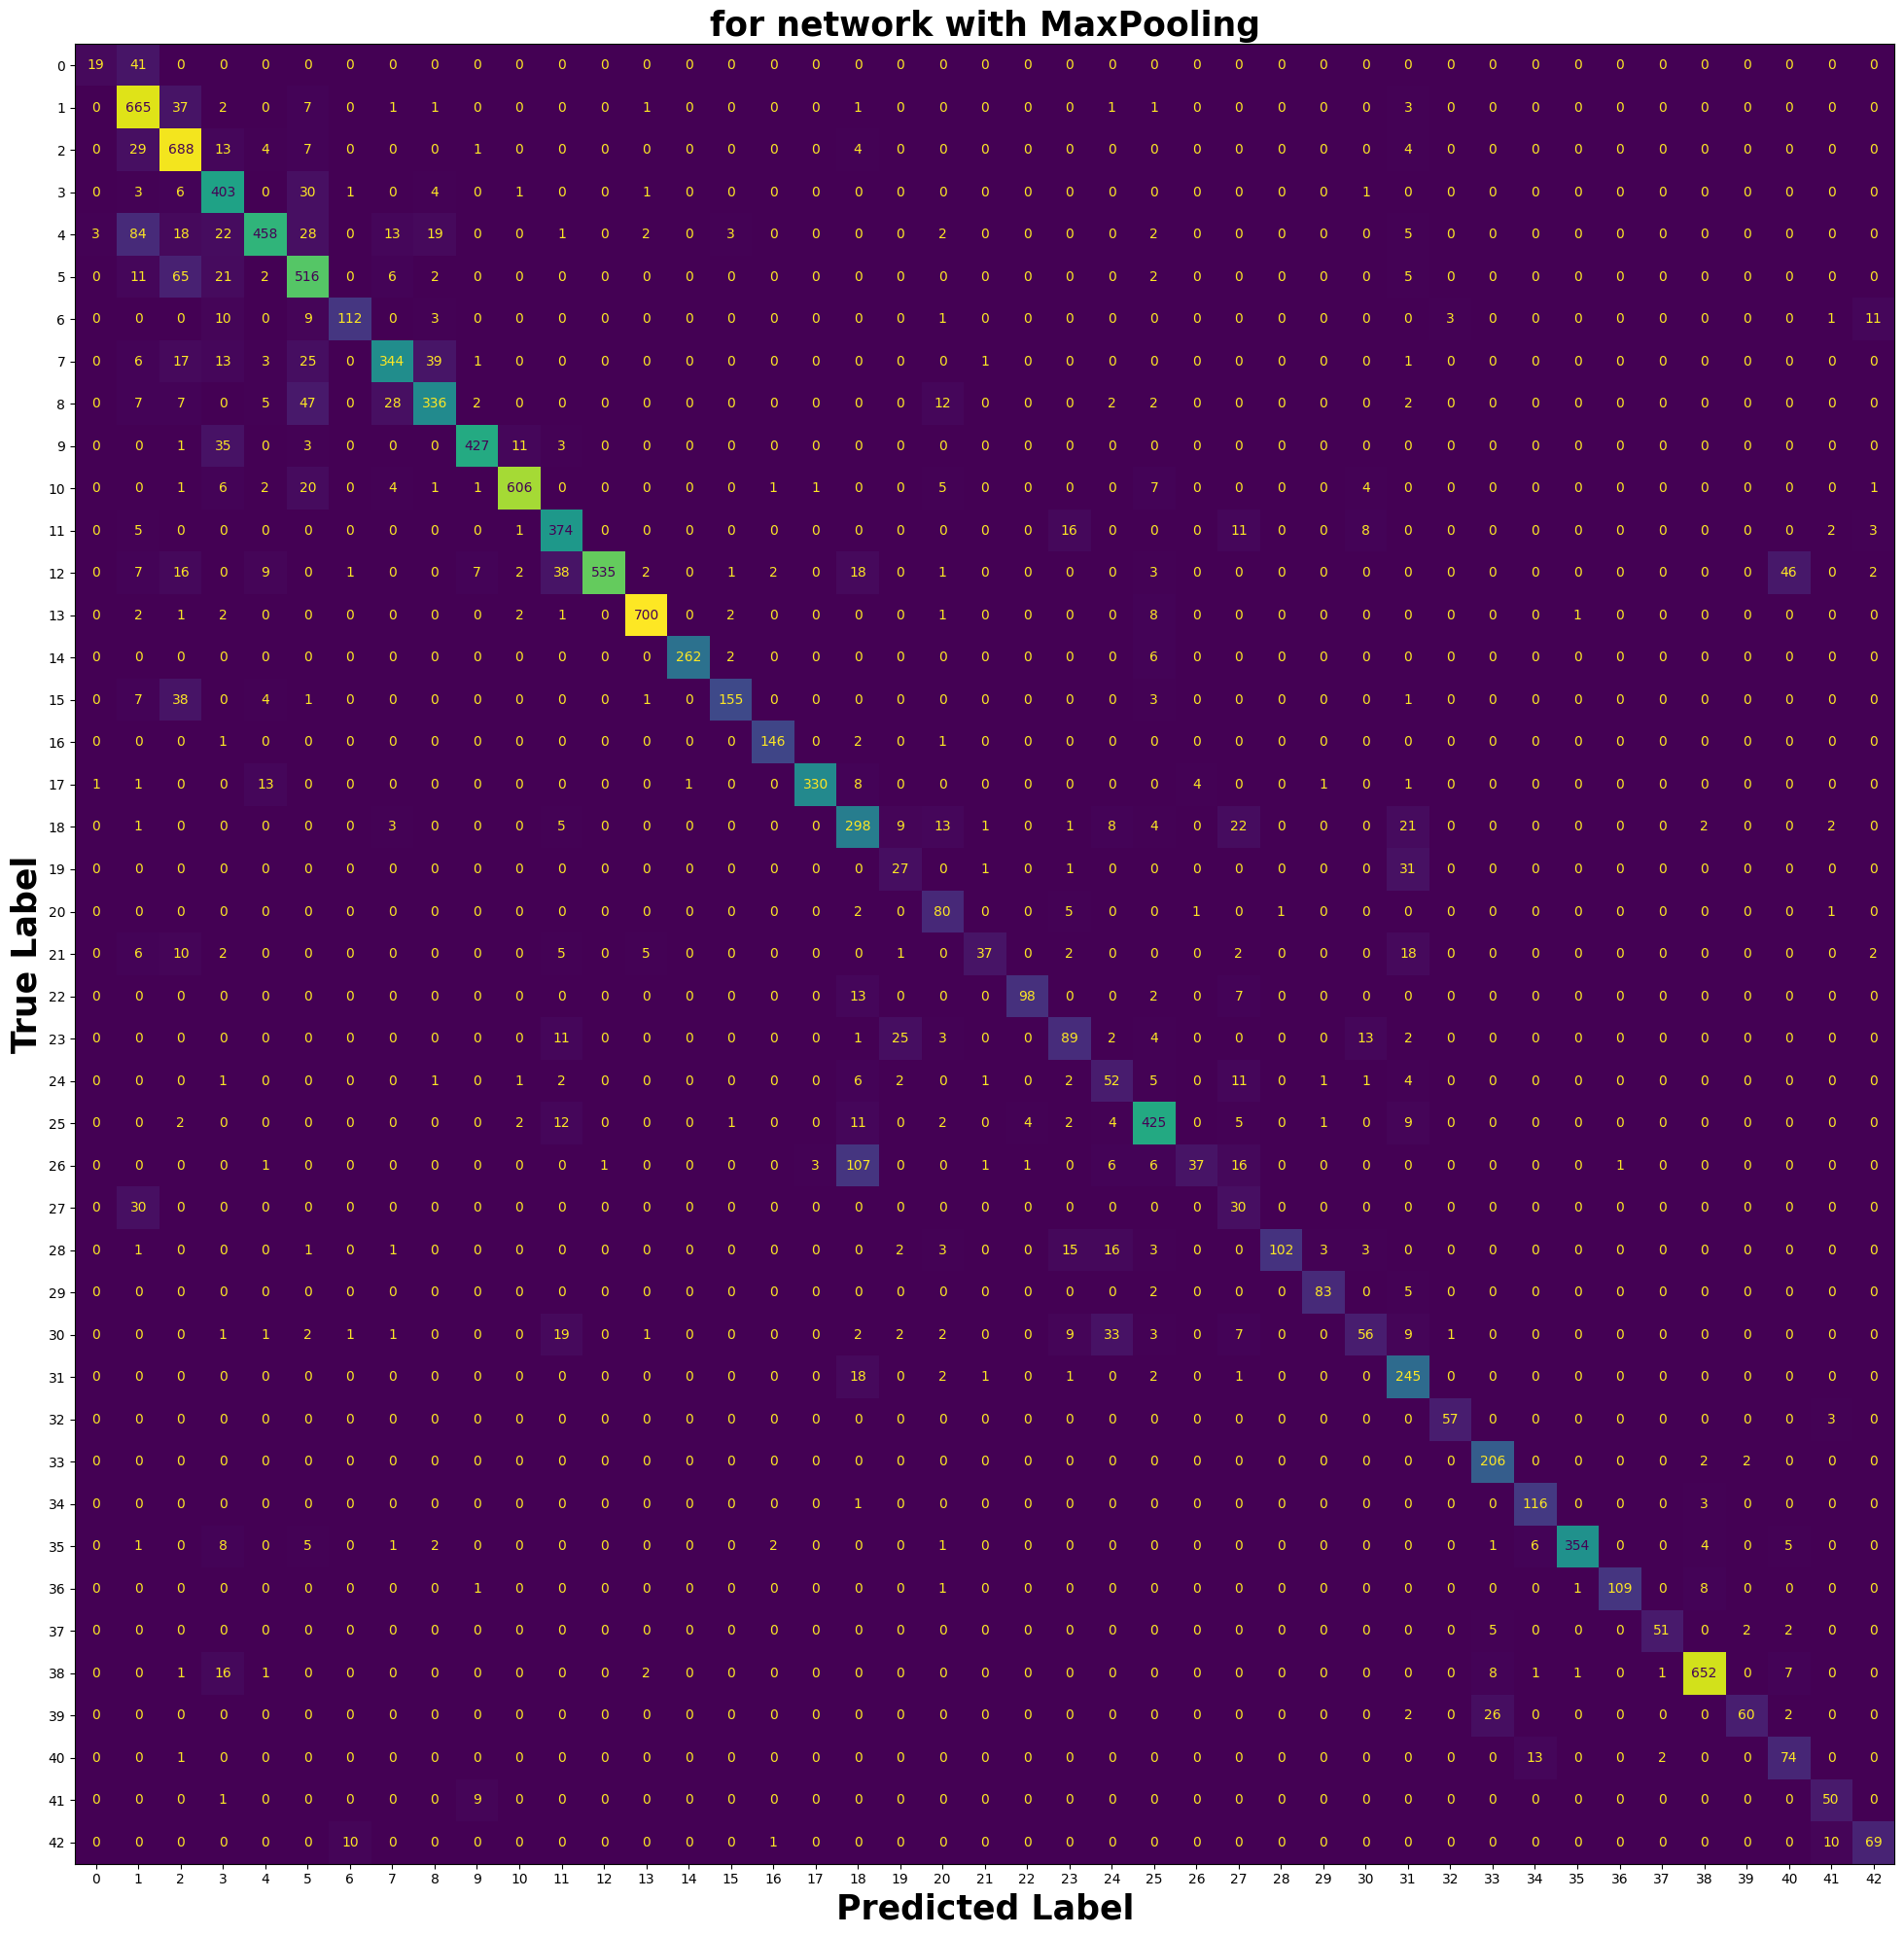

Accuracy score: 0.8339667458432304


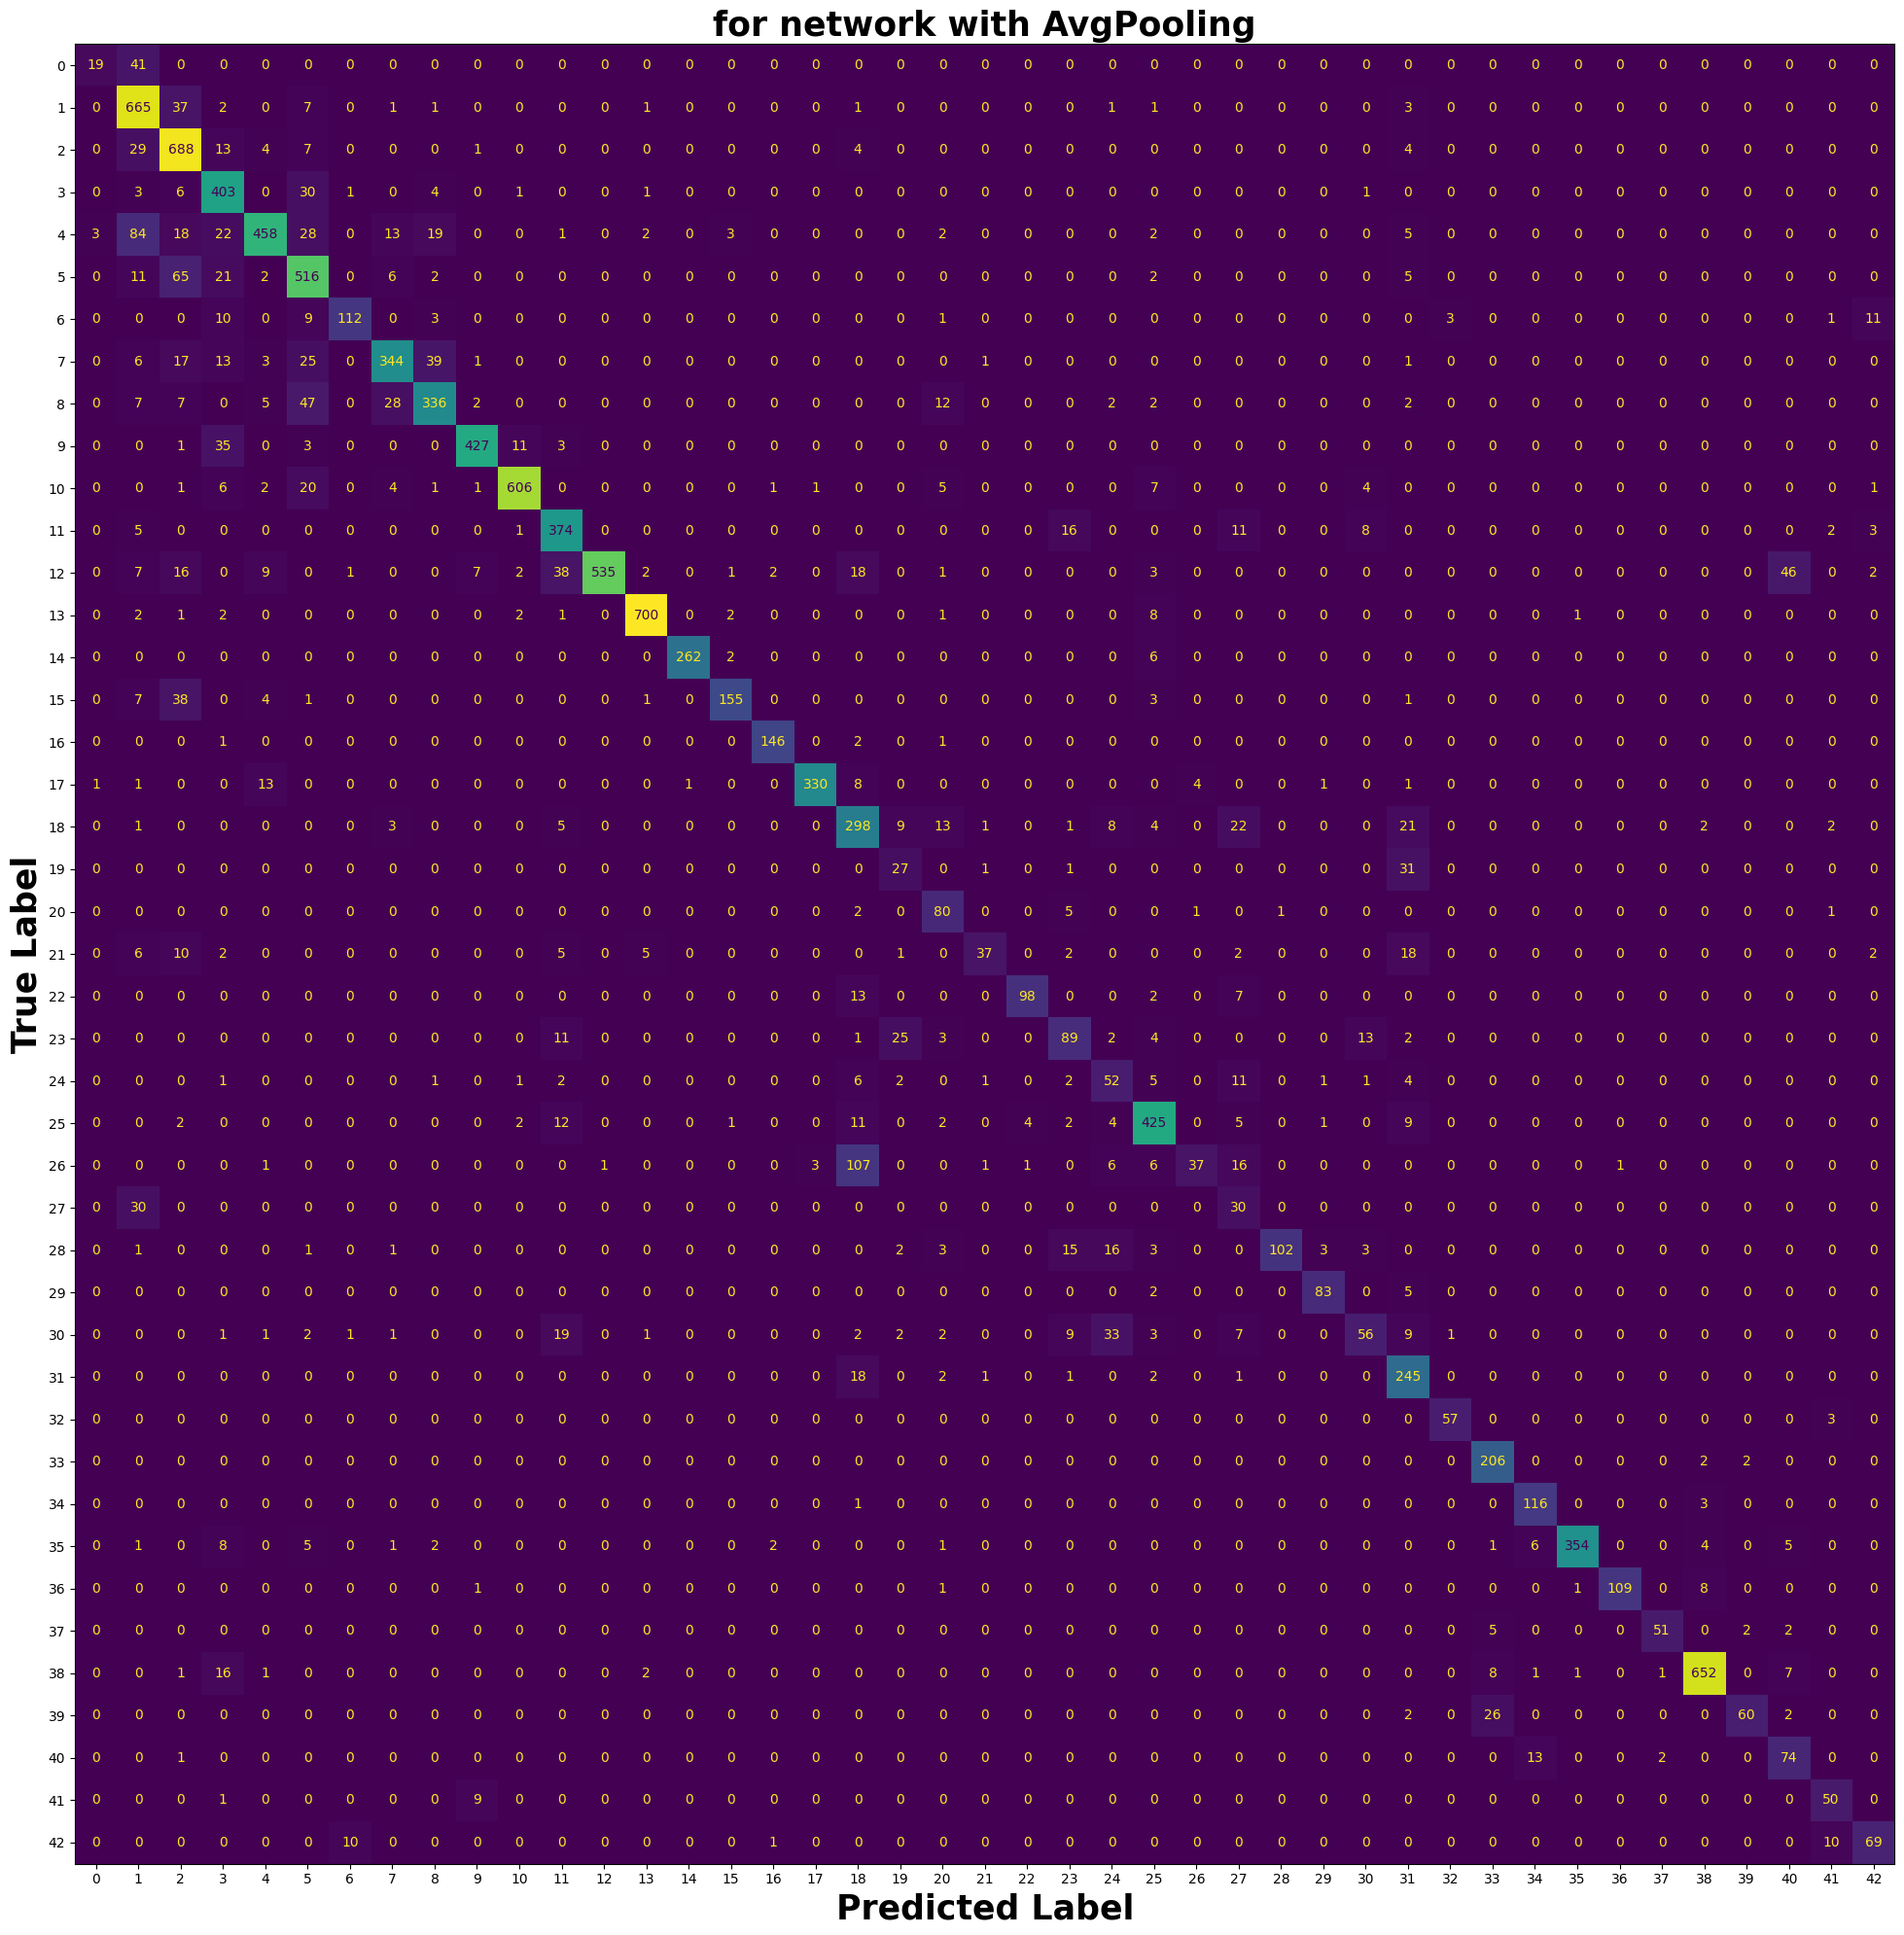

Accuracy score: 0.8339667458432304


In [137]:
ypred_maxpooling = argmax(ypred_maxpooling) 
CategCM_CNN_MaxPooling = confusion_matrix(y_test, ypred_maxpooling)
ypred_avgpooling = argmax(ypred_avgpooling) 
CategCM_CNN_AvgPooling = confusion_matrix(y_test, ypred_avgpooling)

MaxPooling_table = cm_df(CategCM_CNN_MaxPooling,"CM for network with MaxPooling")
AvgPooling_table = cm_df(CategCM_CNN_AvgPooling,"CM for network with AvgPooling")
confusion_Matrix_pic(y_test, ypred_maxpooling,'for network with MaxPooling')
confusion_Matrix_pic(y_test, ypred_avgpooling,'for network with AvgPooling')

In [138]:
def cnn_maxpool_dropout(X_train,y_train,X_valid,y_valid,X_test,y_test,batch_size,epochs):
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation = 'relu' , input_shape = (30,30,3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="same"))
    model.add(Conv2D(32,(3,3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="same"))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(128,activation = tf.nn.relu))
    model.add(Dropout(0.2))
    model.add(Dense(43,activation = tf.nn.softmax))

    model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
    
    history = model.fit(X_train , y_train , batch_size = batch_size,epochs = epochs,
                        validation_data = (X_valid,y_valid))
    CNN_result = pd.DataFrame(history.history)
    CNN_result['epoch'] = history.epoch
    y_pred = model.predict(X_test)
    
    return CNN_result, y_pred


### Comparison of network with and without DROPOUT layer

Epoch 1/20
552/552 [==============================] - 16s 28ms/step - loss: 1.6091 - accuracy: 0.5544 - val_loss: 0.4389 - val_accuracy: 0.8906
Epoch 2/20
552/552 [==============================] - 15s 27ms/step - loss: 0.4356 - accuracy: 0.8713 - val_loss: 0.1851 - val_accuracy: 0.9551
Epoch 3/20
552/552 [==============================] - 14s 26ms/step - loss: 0.2708 - accuracy: 0.9211 - val_loss: 0.1211 - val_accuracy: 0.9758
Epoch 4/20
552/552 [==============================] - 14s 25ms/step - loss: 0.1892 - accuracy: 0.9457 - val_loss: 0.0757 - val_accuracy: 0.9819
Epoch 5/20
552/552 [==============================] - 14s 26ms/step - loss: 0.1453 - accuracy: 0.9578 - val_loss: 0.0588 - val_accuracy: 0.9844
Epoch 6/20
552/552 [==============================] - 15s 26ms/step - loss: 0.1158 - accuracy: 0.9661 - val_loss: 0.0566 - val_accuracy: 0.9865
Epoch 7/20
552/552 [==============================] - 14s 25ms/step - loss: 0.0962 - accuracy: 0.9709 - val_loss: 0.0405 - val_accuracy:

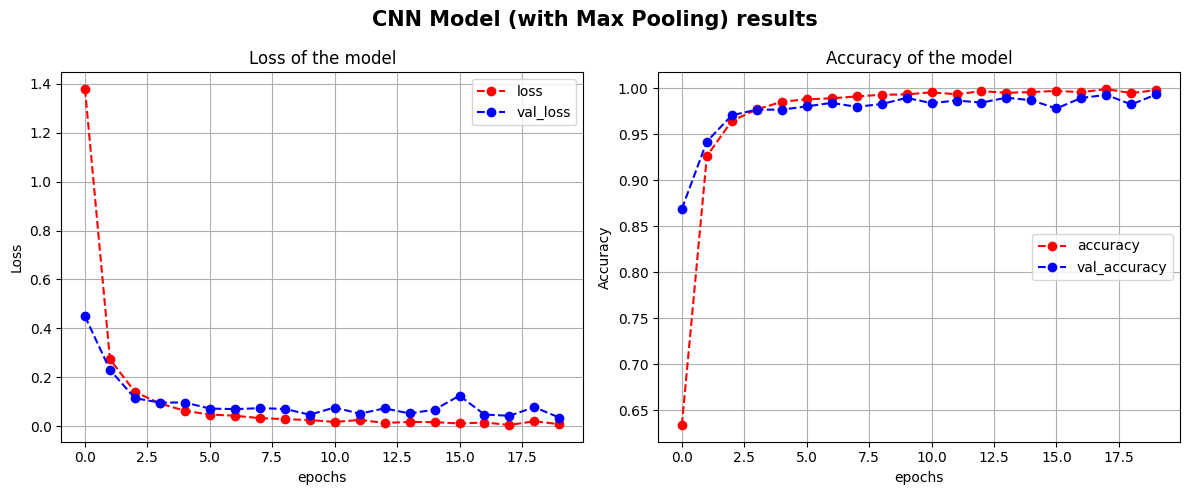

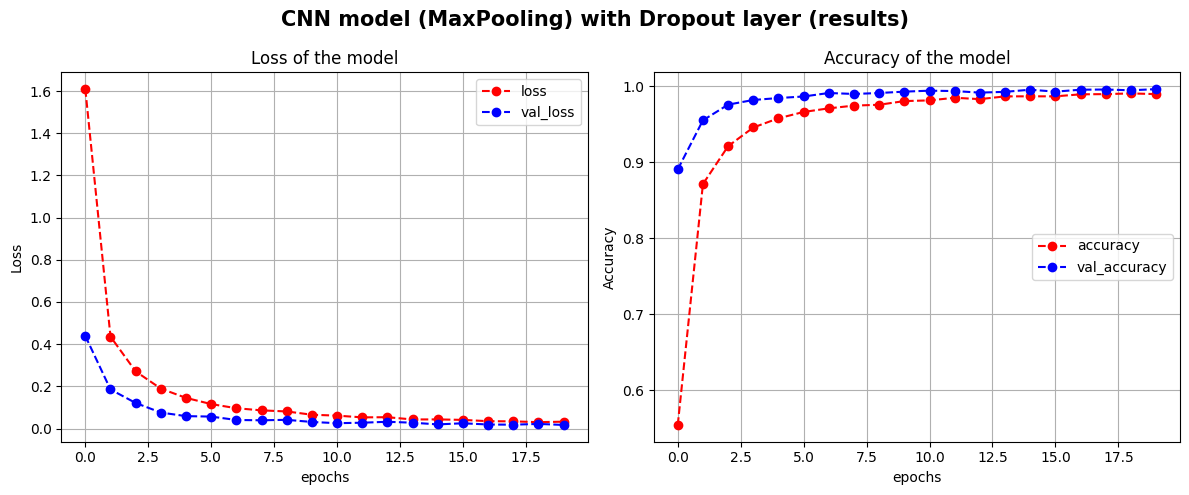



CNN Network without Dropout layer:
         loss  accuracy  val_loss  val_accuracy  epoch
17  0.004464  0.999121  0.041907      0.992859     17
18  0.019241  0.994842  0.077081      0.982402     18
19  0.007674  0.998045  0.034259      0.993369     19


CNN Network With Dropout layer:
         loss  accuracy  val_loss  val_accuracy  epoch
17  0.034008  0.989600  0.018243      0.995664     17
18  0.030159  0.990535  0.021854      0.994644     18
19  0.032515  0.989600  0.017041      0.996174     19


In [139]:
MaxPool_Dropout_name = f"CNN model (MaxPooling) with Dropout layer (results)"
start_maxpool_dropout = time.time()
maxpool_dropout_result ,ypred_withDropout = cnn_maxpool_dropout(X_train,y_train,X_valid,y_valid,X_test,y_test,batch_size,epoch20)
end_maxpool_dropout = time.time()
print(f"time of running for CNN without dropout layer: {end_maxpooling - start_maxpooling}\ntime of running for CNN with dropout layer: {end_maxpool_dropout - start_maxpool_dropout}  (both in seconds)")
disp_result(maxpooling_result,MaxPool_name)
disp_result(maxpool_dropout_result,MaxPool_Dropout_name)

print("\n\nCNN Network without Dropout layer:\n",maxpooling_result.tail(3))
print("\n\nCNN Network With Dropout layer:\n",maxpool_dropout_result.tail(3))

### Confusion Matrix

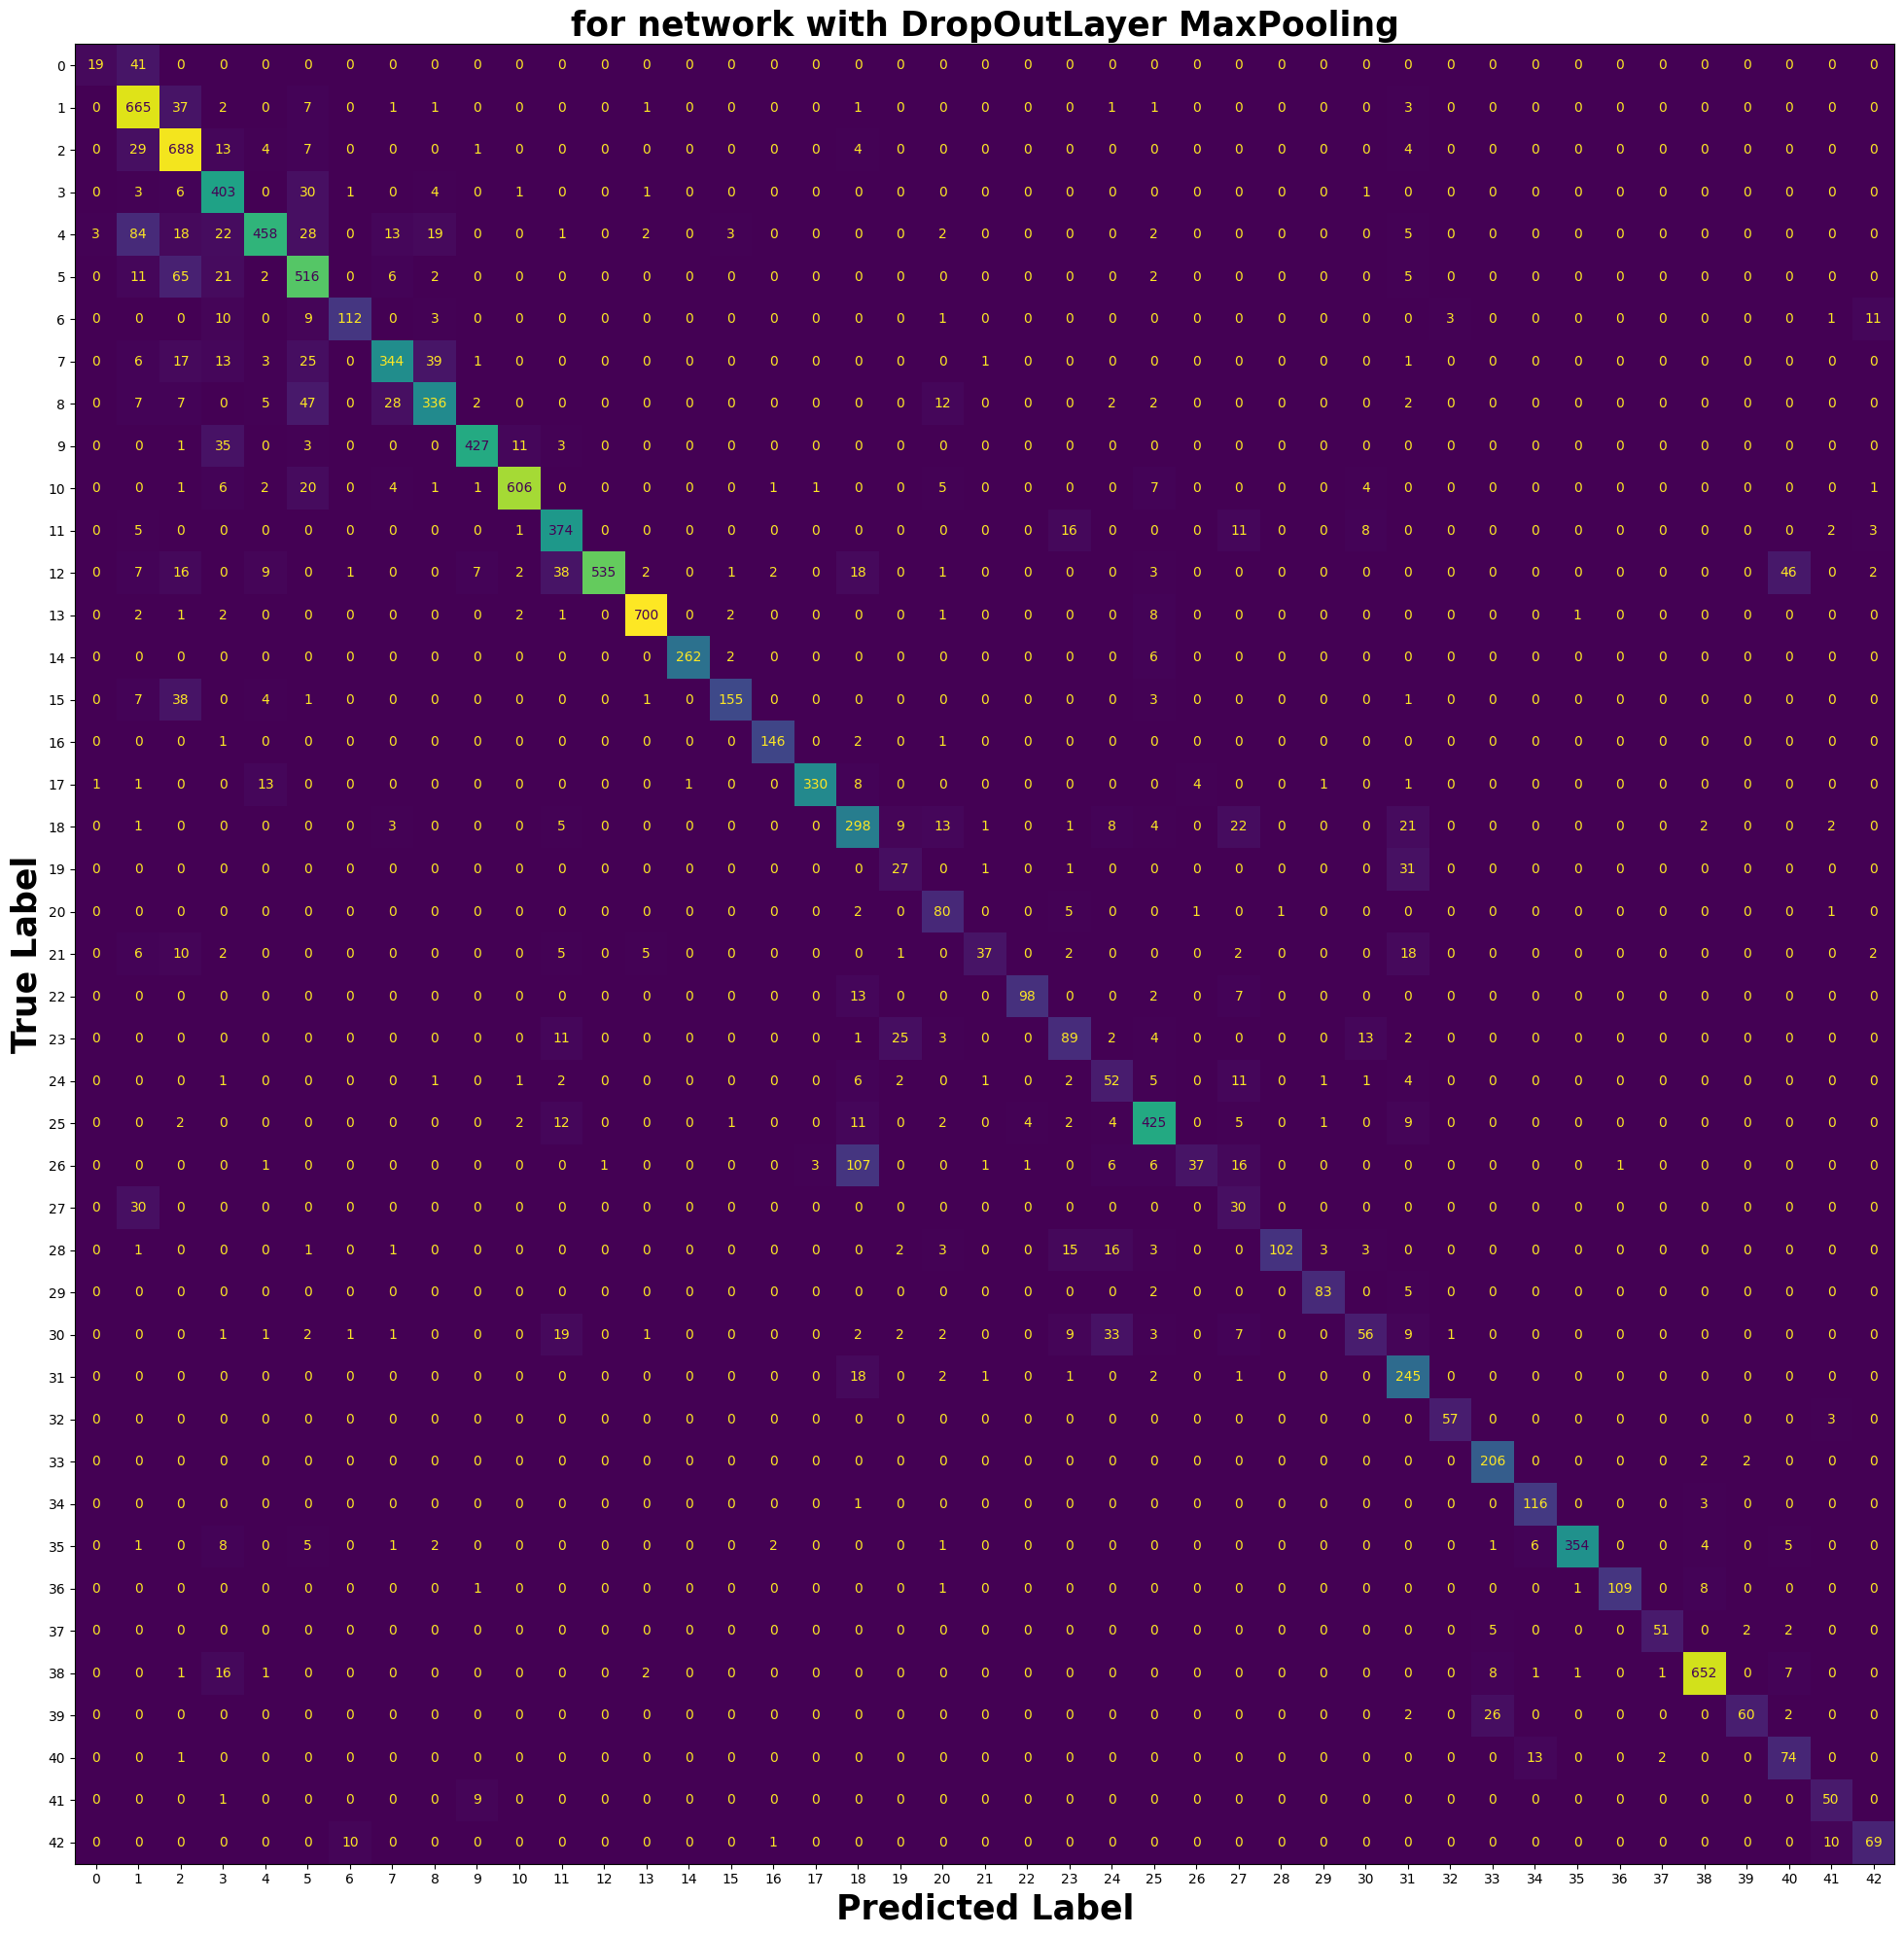

Accuracy score: 0.8339667458432304


In [140]:
ypred_withDropout = argmax(ypred_withDropout) # Considering 2 Dropout layers for CNN Network wit MaxPooling
CategCM_CNN_Dropout = confusion_matrix(y_test, ypred_withDropout)

# CategCM_CNN_MaxPooling
# CategCM_CNN_AvgPooling
Drpout_table = cm_df(CategCM_CNN_Dropout,"CM for network with DropOut Layer MaxPooling") #The Network contains MaxPooling as optimum respose 
                                                                    #of previous section
confusion_Matrix_pic(y_test, ypred_withDropout,'for network with DropOutLayer MaxPooling')

### CNN Network definition considering SGD optimizer 

In [64]:
def cnn_maxpool_SGD(X_train,y_train,X_valid,y_valid,X_test,y_test,batch_size,epochs):
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation = 'relu' , input_shape = (30,30,3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="same"))
    model.add(Conv2D(32,(3,3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="same"))
    model.add(Flatten())
    model.add(Dense(128,activation = tf.nn.relu))
    model.add(Dense(43,activation = tf.nn.softmax))

    model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001) , loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
    
    history = model.fit(X_train , y_train , batch_size = batch_size,epochs = epochs, 
                        validation_data = (X_valid,y_valid))
    CNN_result = pd.DataFrame(history.history)
    CNN_result['epoch'] = history.epoch
    y_pred = model.predict(X_test)

    return CNN_result,y_pred

In [68]:
def cnn_maxpool_SGD_lr1(X_train,y_train,X_valid,y_valid,X_test,y_test,batch_size,epochs):
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation = 'relu' , input_shape = (30,30,3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="same"))
    model.add(Conv2D(32,(3,3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="same"))
    model.add(Flatten())
    model.add(Dense(128,activation = tf.nn.relu))
    model.add(Dense(43,activation = tf.nn.softmax))

    model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) , loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
    
    history = model.fit(X_train , y_train , batch_size = batch_size,epochs = epochs, 
                        validation_data = (X_valid,y_valid))
    CNN_result = pd.DataFrame(history.history)
    CNN_result['epoch'] = history.epoch
    y_pred = model.predict(X_test)

    return CNN_result,y_pred

### Comparison of Adam & SGD optimizers

Epoch 1/20
552/552 [==============================] - 14s 24ms/step - loss: 3.7108 - accuracy: 0.0521 - val_loss: 3.6521 - val_accuracy: 0.0571
Epoch 2/20
552/552 [==============================] - 13s 24ms/step - loss: 3.5970 - accuracy: 0.0565 - val_loss: 3.5439 - val_accuracy: 0.0676
Epoch 3/20
552/552 [==============================] - 13s 24ms/step - loss: 3.5138 - accuracy: 0.0727 - val_loss: 3.4929 - val_accuracy: 0.0867
Epoch 4/20
552/552 [==============================] - 13s 24ms/step - loss: 3.4696 - accuracy: 0.0939 - val_loss: 3.4620 - val_accuracy: 0.0890
Epoch 5/20
552/552 [==============================] - 13s 24ms/step - loss: 3.4362 - accuracy: 0.1107 - val_loss: 3.4296 - val_accuracy: 0.1316
Epoch 6/20
552/552 [==============================] - 13s 24ms/step - loss: 3.4028 - accuracy: 0.1419 - val_loss: 3.3966 - val_accuracy: 0.1556
Epoch 7/20
552/552 [==============================] - 13s 24ms/step - loss: 3.3643 - accuracy: 0.1684 - val_loss: 3.3555 - val_accuracy:

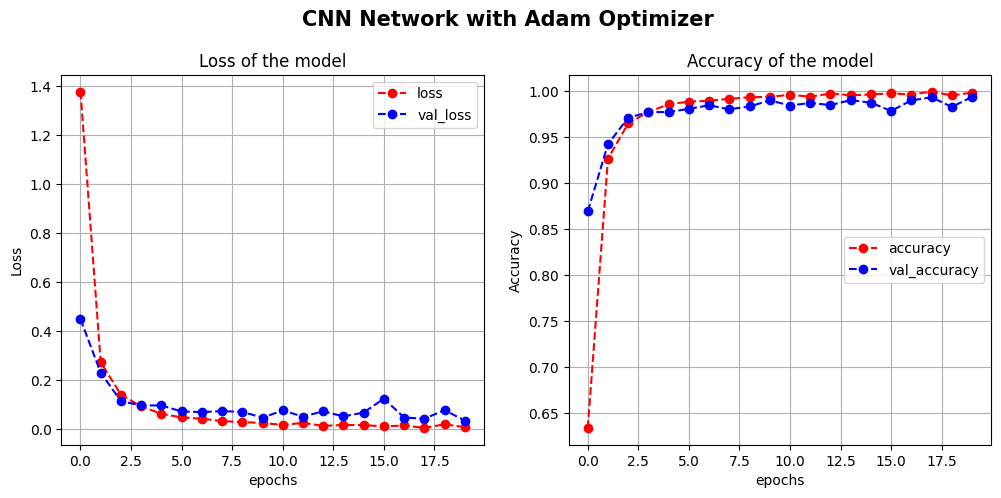

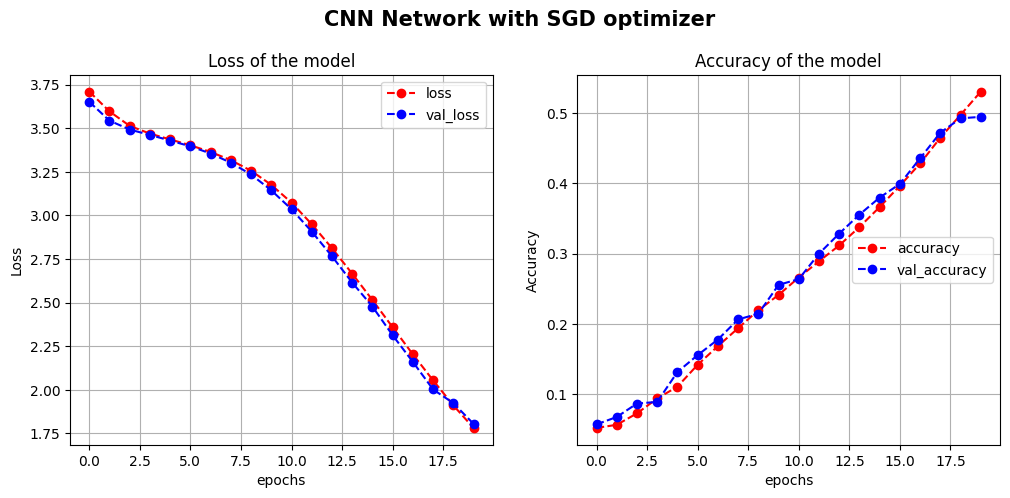



CNN Network without ADAM Optimizer:
         loss  accuracy  val_loss  val_accuracy  epoch
17  0.004464  0.999121  0.041907      0.992859     17
18  0.019241  0.994842  0.077081      0.982402     18
19  0.007674  0.998045  0.034259      0.993369     19


CNN Network With SGD Optimizer :
         loss  accuracy  val_loss  val_accuracy  epoch
17  2.054504  0.464917  2.002407      0.472073     17
18  1.911145  0.497393  1.924181      0.492476     18
19  1.781885  0.530549  1.805014      0.494517     19


In [65]:
MaxPool_Adam_name = f"CNN Network with Adam Optimizer "
maxpool_SGD_name = f"CNN Network with SGD optimizer"
start_SGD = time.time()
maxpool_SGD_result,ypred_SGD  = cnn_maxpool_SGD(X_train,y_train,X_valid,y_valid,X_test,y_test,batch_size,epoch20)
end_SGD = time.time()


print(f"time of running for CNN with Adam optimizer: {end_maxpooling - start_maxpooling}\ntime of running for CNN with SGD optimizer (l_r=0.001): {end_SGD - start_SGD}  (both in seconds)")
disp_result(maxpooling_result,MaxPool_Adam_name)
disp_result(maxpool_SGD_result,maxpool_SGD_name)


print("\n\nCNN Network without ADAM Optimizer:\n",maxpooling_result.tail(3))
print("\n\nCNN Network With SGD Optimizer :\n",maxpool_SGD_result.tail(3))

Epoch 1/20
552/552 [==============================] - 14s 25ms/step - loss: 1.8989 - accuracy: 0.4738 - val_loss: 1.2264 - val_accuracy: 0.6552
Epoch 2/20
552/552 [==============================] - 13s 24ms/step - loss: 0.3886 - accuracy: 0.8870 - val_loss: 0.2220 - val_accuracy: 0.9352
Epoch 3/20
552/552 [==============================] - 13s 24ms/step - loss: 0.1728 - accuracy: 0.9534 - val_loss: 0.6753 - val_accuracy: 0.8740
Epoch 4/20
552/552 [==============================] - 14s 25ms/step - loss: 0.1013 - accuracy: 0.9736 - val_loss: 0.1499 - val_accuracy: 0.9589
Epoch 5/20
552/552 [==============================] - 13s 24ms/step - loss: 0.0738 - accuracy: 0.9816 - val_loss: 0.0725 - val_accuracy: 0.9842
Epoch 6/20
552/552 [==============================] - 13s 24ms/step - loss: 0.0471 - accuracy: 0.9883 - val_loss: 0.0666 - val_accuracy: 0.9839
Epoch 7/20
552/552 [==============================] - 13s 24ms/step - loss: 0.0310 - accuracy: 0.9931 - val_loss: 0.0862 - val_accuracy:

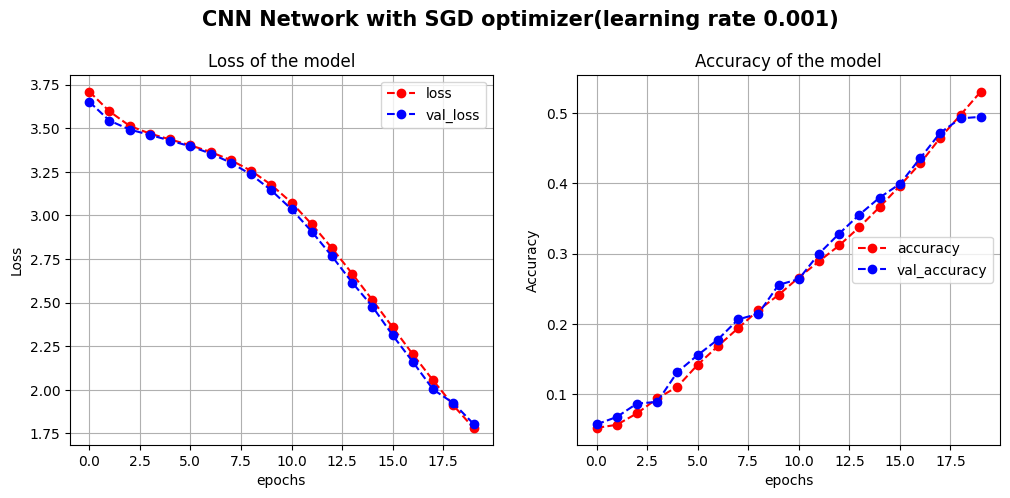

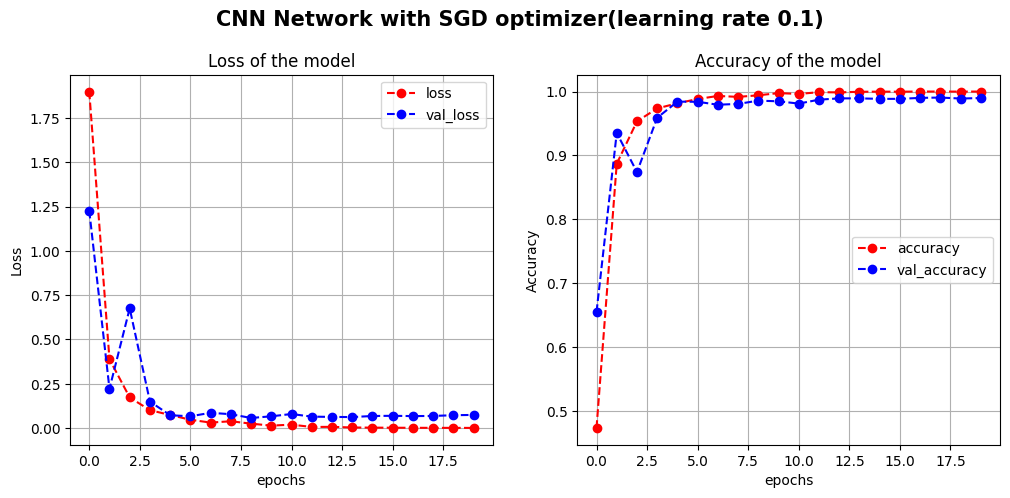



CNN Network With SGD Optimizer (learning rate 0.1):
         loss  accuracy  val_loss  val_accuracy  epoch
17  0.001311  0.999972  0.068526      0.990564     17
18  0.001294  0.999858  0.072594      0.989033     18
19  0.001055  0.999943  0.074324      0.989799     19


In [70]:
start_SGD_lr1 = time.time()
maxpool_SGD_lr1_result,ypred_SGD_lr1  = cnn_maxpool_SGD_lr1(X_train,y_train,X_valid,y_valid,X_test,y_test,batch_size,epoch20)
end_SGD_lr1 = time.time()
print(f"time of running for CNN with SGD optimizer (learning rate(0.1)): {end_SGD_lr1 - start_SGD_lr1}")
maxpool_SGD_lr001_name = f"CNN Network with SGD optimizer(learning rate 0.001)"
maxpool_SGD_lr1_name = f"CNN Network with SGD optimizer(learning rate 0.1)"

disp_result(maxpool_SGD_result,maxpool_SGD_lr001_name)
disp_result(maxpool_SGD_lr1_result,maxpool_SGD_lr1_name)

print("\n\nCNN Network With SGD Optimizer (learning rate 0.1):\n",maxpool_SGD_lr1_result.tail(3))

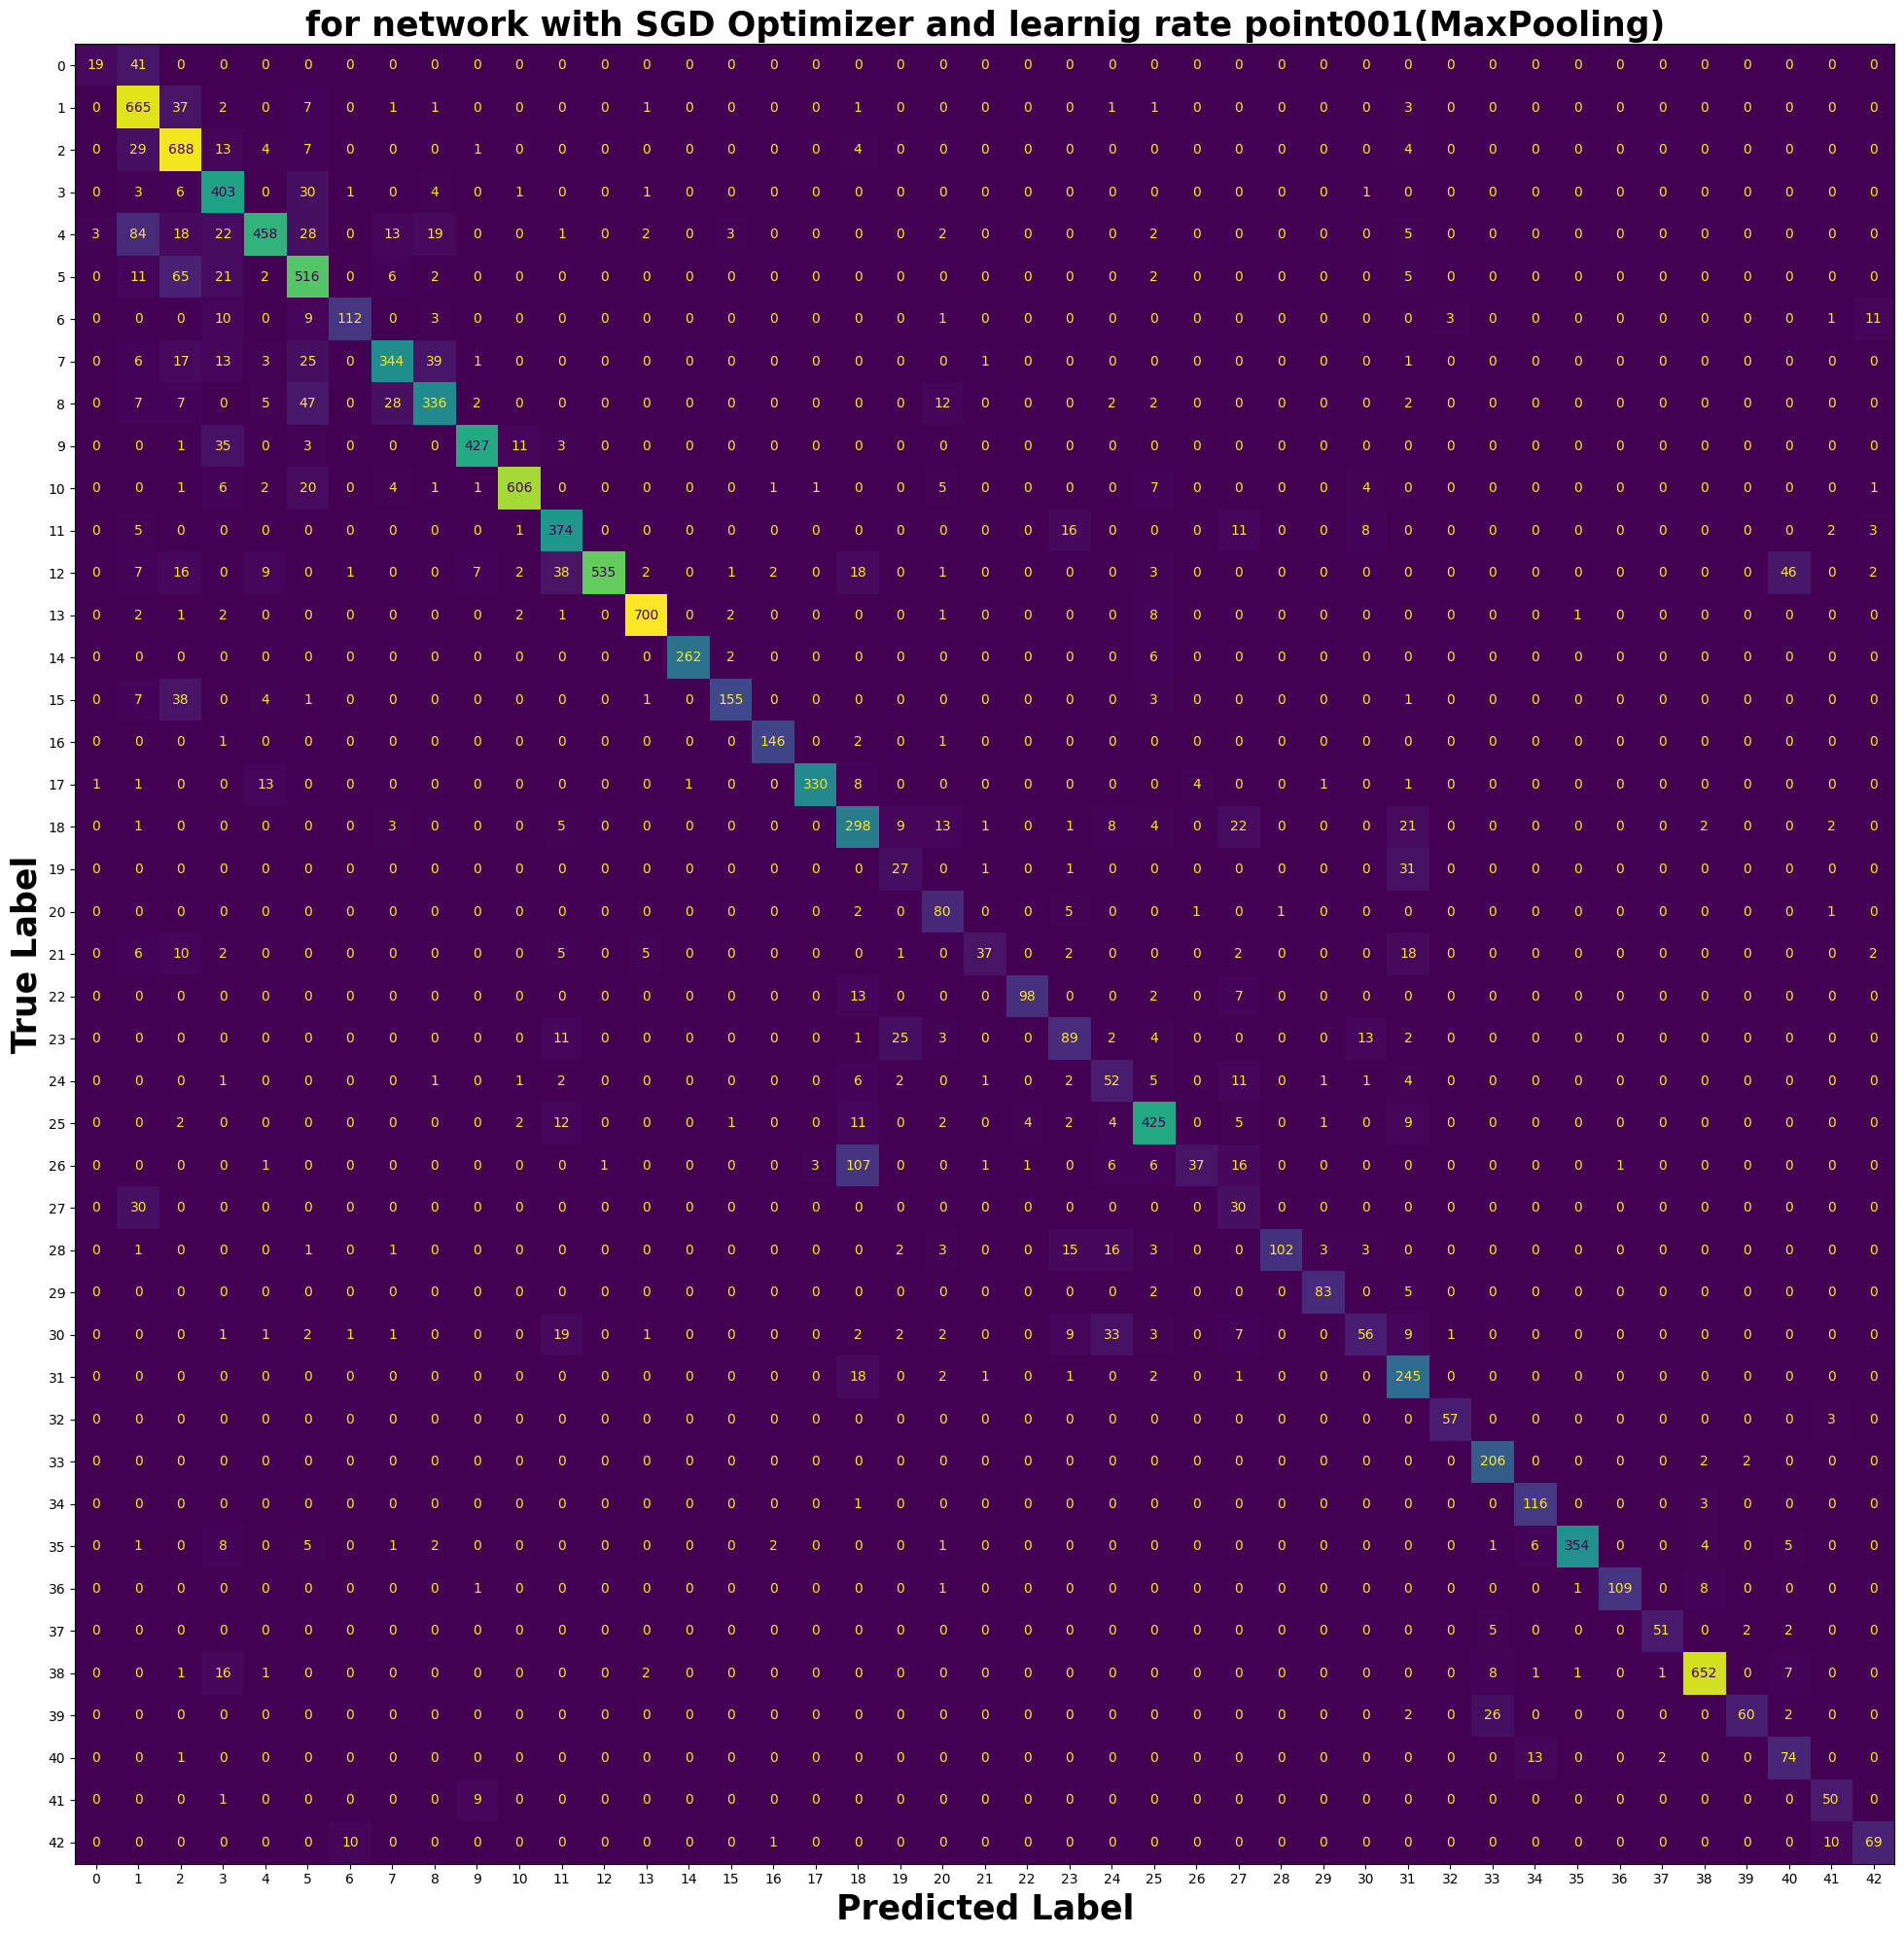

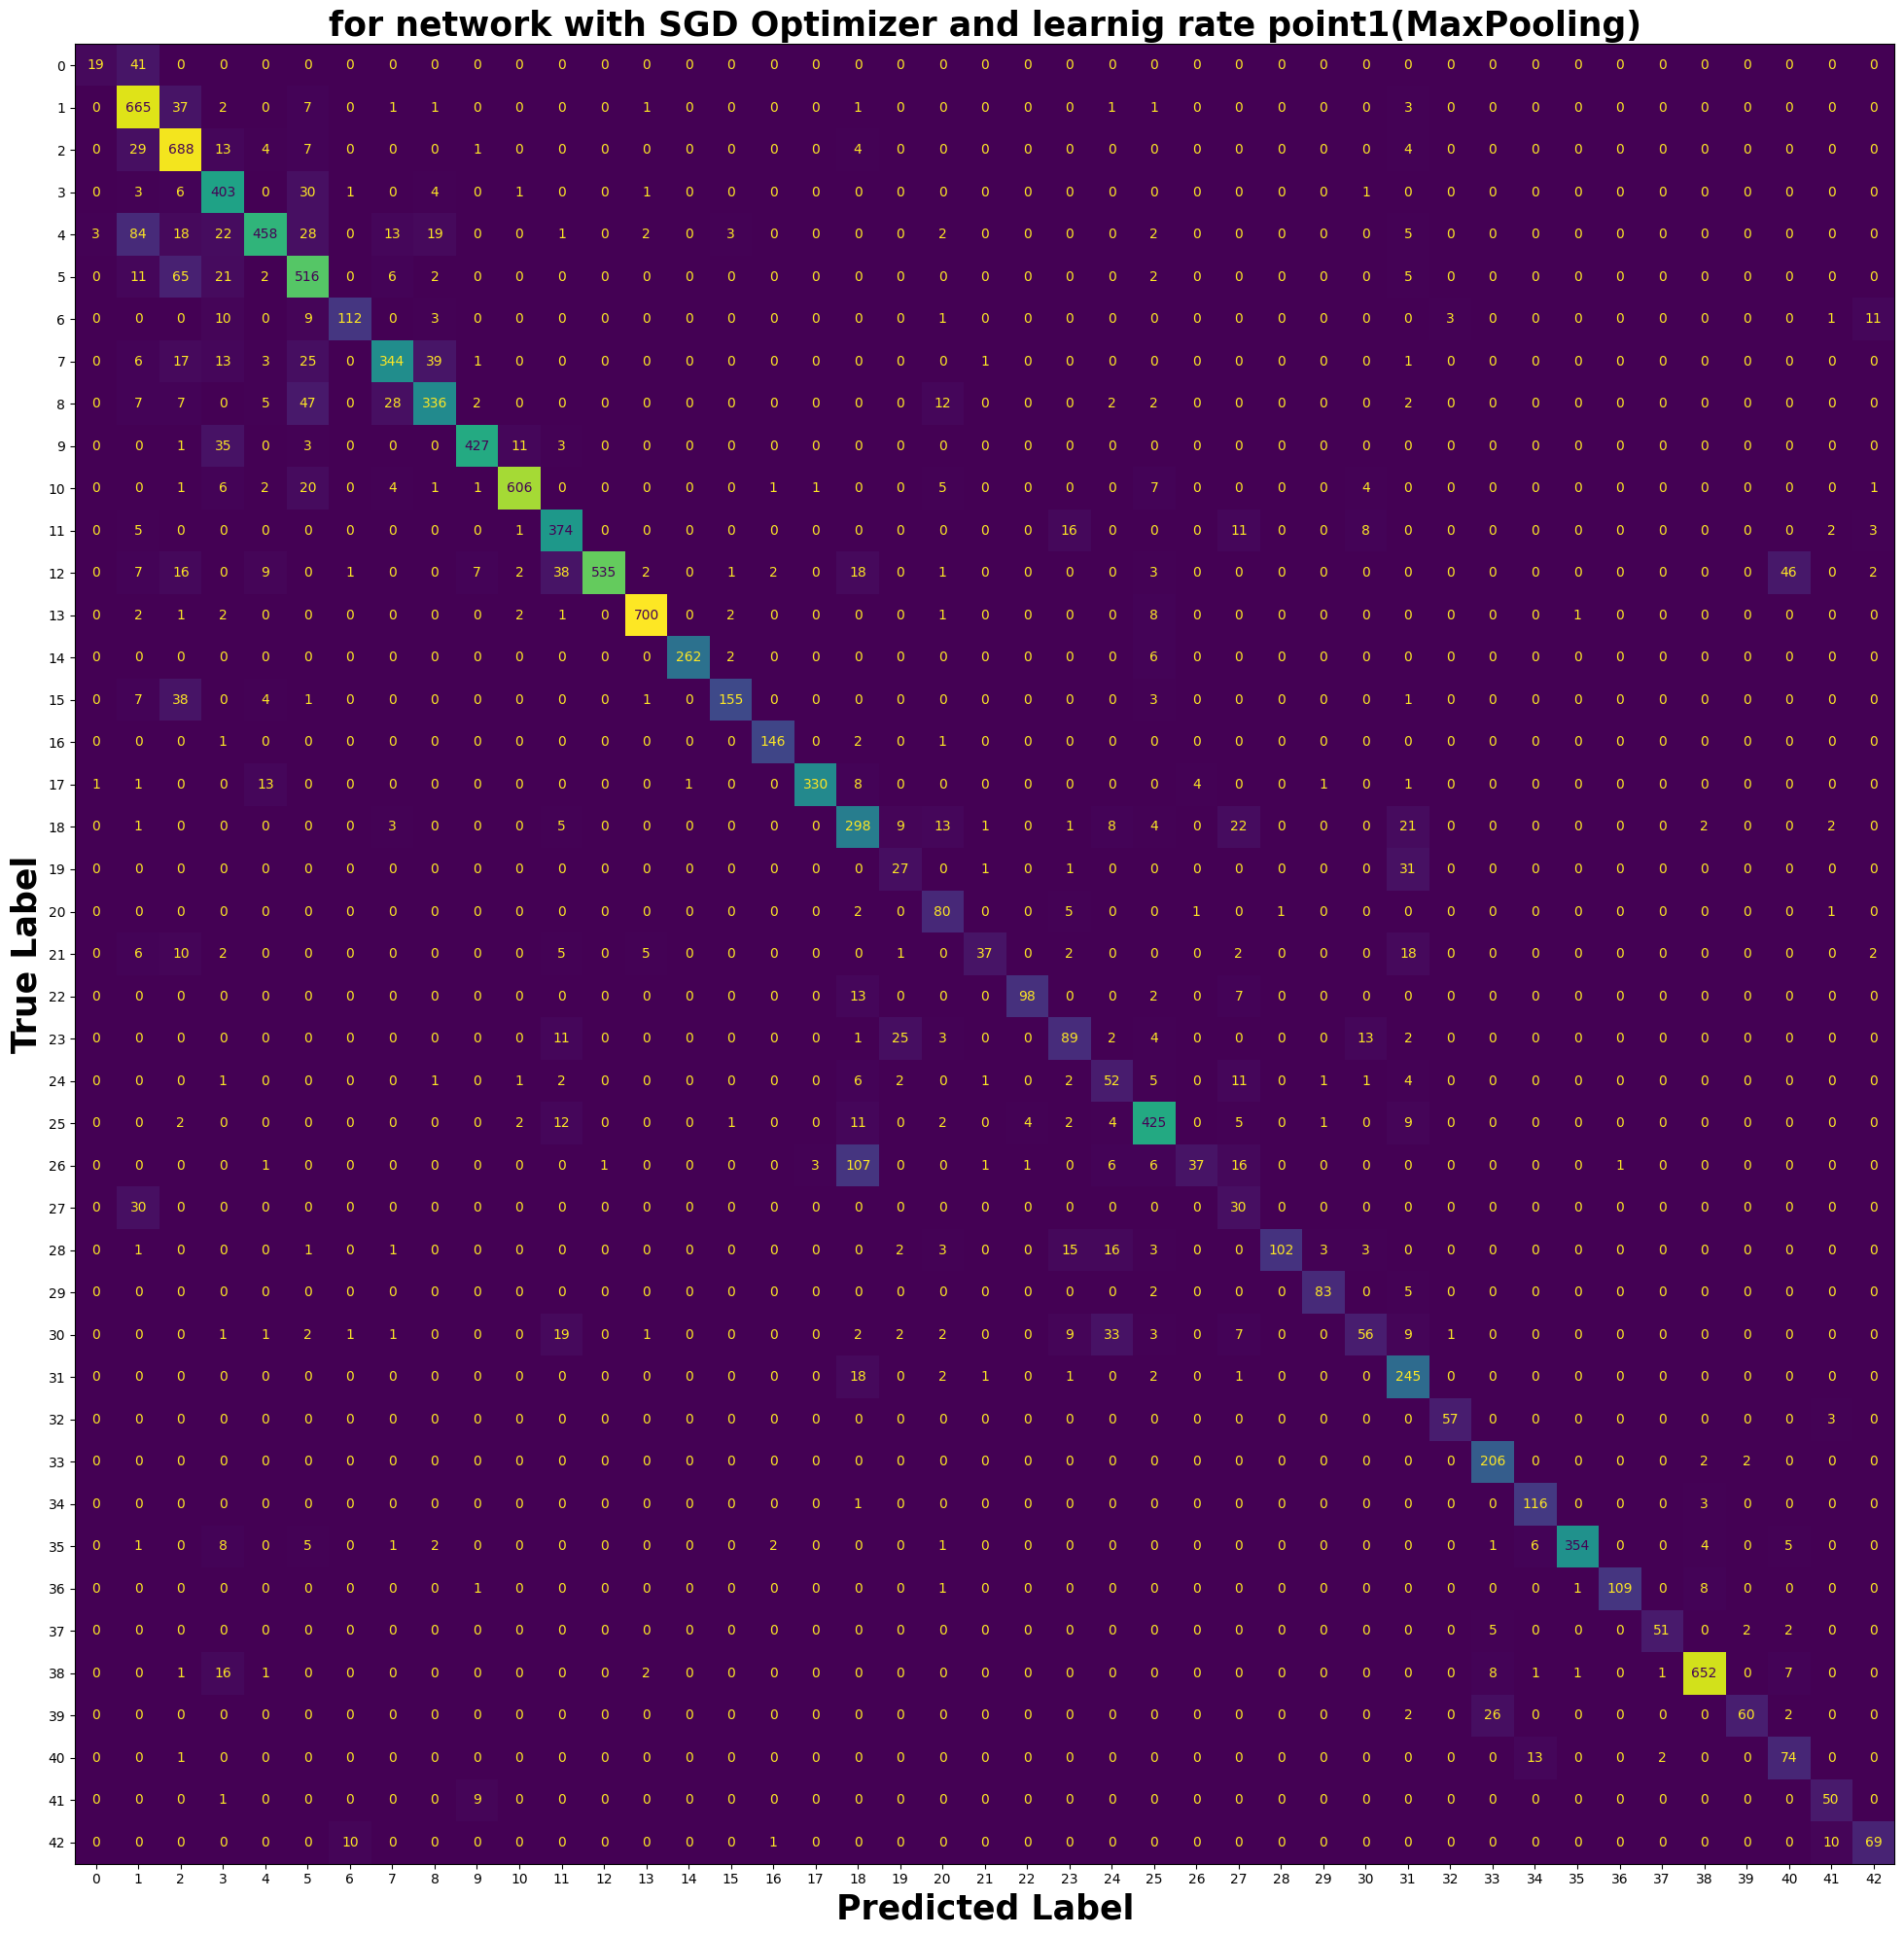

In [107]:
ypred_SGD = argmax(ypred_SGD) # Considering SGD Optimizer for CNN Network wit MaxPooling
CategCM_CNN_SGD_lr001 = confusion_matrix(y_test, ypred_SGD)

SGD_lr001_table = cm_df(CategCM_CNN_SGD_lr001,"CM for network with SGD Optimizer and learnig rate point001(MaxPooling)") 
                                                               #The Network contains MaxPooling,withoout dropout layers as optimum respose 
                                                                    #of previous section
    
confusion_Matrix_pic(y_test, ypred_SGD,'for network with SGD Optimizer and learnig rate point001(MaxPooling)')

ypred_SGD_lr1 = argmax(ypred_SGD_lr1)        # Considering SGD Optimizer for CNN Network wit MaxPooling
CategCM_CNN_SGD_lr1 = confusion_matrix(y_test, ypred_SGD_lr1)

SGD_lr001_table = cm_df(CategCM_CNN_SGD_lr1,"CM for network with SGD Optimizer and learnig rate point1(MaxPooling)") 
                                                #The Network contains MaxPooling,withoout dropout layers as optimum respose 
                                                                    #of previous section
confusion_Matrix_pic(y_test, ypred_SGD_lr1,'for network with SGD Optimizer and learnig rate point1(MaxPooling)')

### Comparison of sigmoid & tanh activation functions with RELU

In [72]:
def cnn_maxpool_tanh(X_train,y_train,X_valid,y_valid,X_test,y_test,batch_size,epochs):
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation = 'tanh' , input_shape = (30,30,3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="same"))
    model.add(Conv2D(32,(3,3),activation = 'tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="same"))
    model.add(Flatten())
    model.add(Dense(128,activation = tf.nn.tanh))
    model.add(Dense(43,activation = tf.nn.softmax))

    model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
    
    history = model.fit(X_train , y_train , batch_size = batch_size,epochs = epochs,
                        validation_data = (X_valid,y_valid))
    CNN_result = pd.DataFrame(history.history)
    CNN_result['epoch'] = history.epoch
    y_pred = model.predict(X_test)

    return CNN_result,y_pred

In [73]:
def cnn_maxpool_sigmoid(X_train,y_train,X_valid,y_valid,X_test,y_test,batch_size,epochs):
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation = 'sigmoid' , input_shape = (30,30,3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="same"))
    model.add(Conv2D(32,(3,3),activation = 'sigmoid'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="same"))
    model.add(Flatten())
    model.add(Dense(128,activation = tf.nn.sigmoid))
    model.add(Dense(43,activation = tf.nn.softmax))

    model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
    
    history = model.fit(X_train , y_train , batch_size = batch_size,epochs = epochs, 
                        validation_data = (X_valid,y_valid))
    CNN_result = pd.DataFrame(history.history)
    CNN_result['epoch'] = history.epoch
    y_pred = model.predict(X_test)

    return CNN_result,y_pred

Epoch 1/20
552/552 [==============================] - 16s 27ms/step - loss: 3.2746 - accuracy: 0.1250 - val_loss: 2.7492 - val_accuracy: 0.2747
Epoch 2/20
552/552 [==============================] - 14s 26ms/step - loss: 1.7033 - accuracy: 0.5485 - val_loss: 1.0352 - val_accuracy: 0.7309
Epoch 3/20
552/552 [==============================] - 16s 29ms/step - loss: 0.7331 - accuracy: 0.8187 - val_loss: 0.5396 - val_accuracy: 0.8809
Epoch 4/20
552/552 [==============================] - 14s 25ms/step - loss: 0.4257 - accuracy: 0.8992 - val_loss: 0.3607 - val_accuracy: 0.9186
Epoch 5/20
552/552 [==============================] - 14s 26ms/step - loss: 0.2814 - accuracy: 0.9375 - val_loss: 0.2571 - val_accuracy: 0.9424
Epoch 6/20
552/552 [==============================] - 14s 26ms/step - loss: 0.1979 - accuracy: 0.9585 - val_loss: 0.1857 - val_accuracy: 0.9610
Epoch 7/20
552/552 [==============================] - 14s 26ms/step - loss: 0.1464 - accuracy: 0.9706 - val_loss: 0.1457 - val_accuracy:

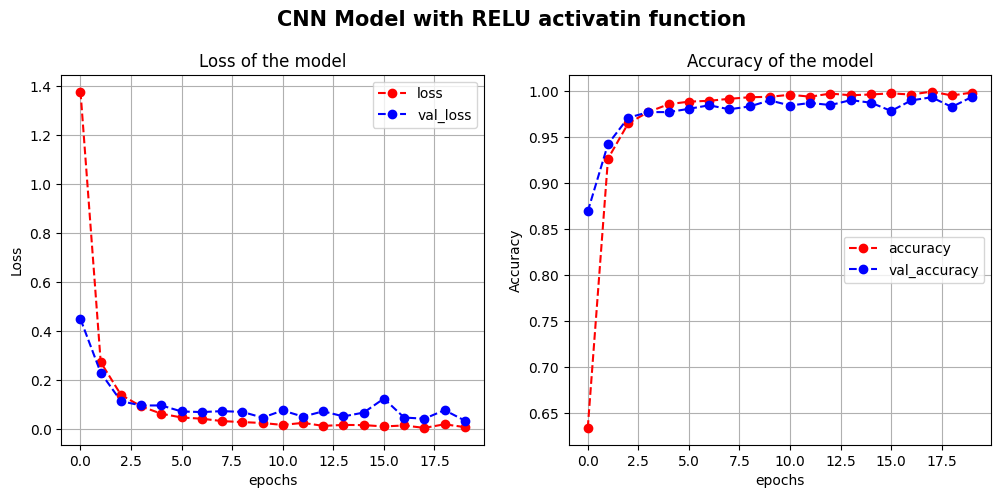

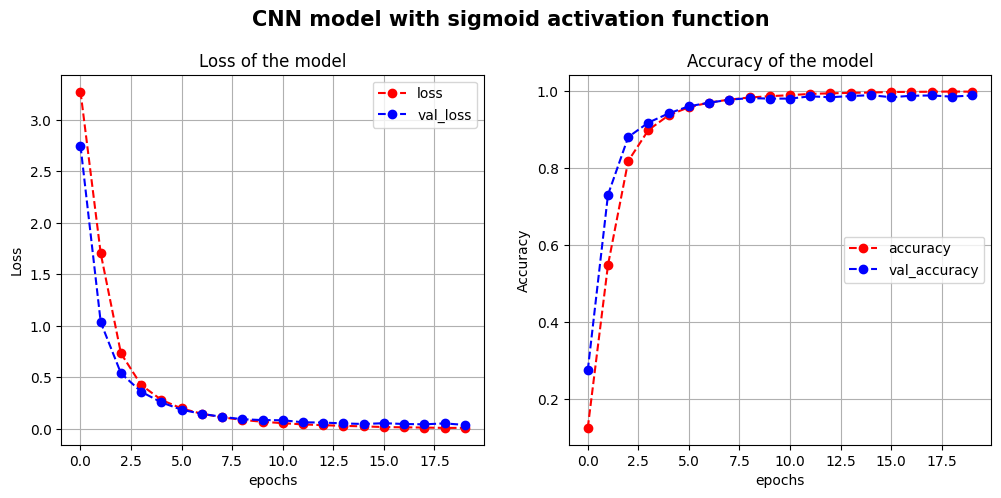

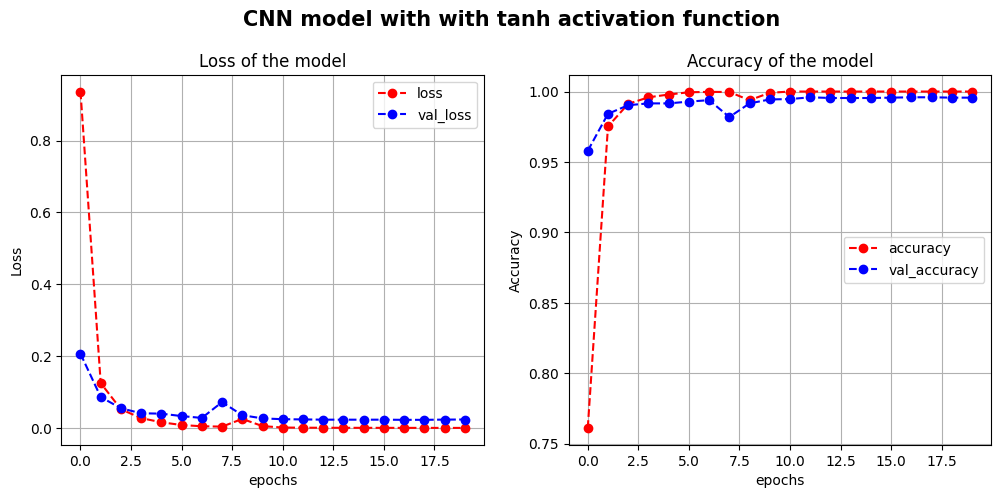

ReLu activation fuunction Results:
         loss  accuracy  val_loss  val_accuracy  epoch
17  0.004464  0.999121  0.041907      0.992859     17
18  0.019241  0.994842  0.077081      0.982402     18
19  0.007674  0.998045  0.034259      0.993369     19

Sigmoid activation fuunction Results:
         loss  accuracy  val_loss  val_accuracy  epoch
17  0.012864  0.998753  0.044156      0.989033     17
18  0.009383  0.999235  0.053045      0.985973     18
19  0.009820  0.998923  0.038457      0.989033     19

tanh activation function Results:
         loss  accuracy  val_loss  val_accuracy  epoch
17  0.000134       1.0  0.022551      0.995919     17
18  0.000102       1.0  0.023208      0.995664     18
19  0.000080       1.0  0.023457      0.995664     19


In [75]:
MaxPool_Adam_RELU_name = f"CNN Model with RELU activatin function"

maxpool_Sigmoid_name = f"CNN model with sigmoid activation function"
start_sigmoid = time.time()
maxpool_sigmoid_result,ypred_sigmoid  = cnn_maxpool_sigmoid(X_train,y_train,X_valid,y_valid,X_test,y_test,batch_size,epoch20)
end_sigmoid = time.time()

maxpool_tanh_name = f"CNN model with with tanh activation function"
start_tanh = time.time()
maxpool_tanh_result,ypred_tanh  = cnn_maxpool_tanh(X_train,y_train,X_valid,y_valid,X_test,y_test,batch_size,epoch20)
end_tanh = time.time()

print(f"time of running for CNN with relu activation function: {end_maxpooling - start_maxpooling}\ntime of running for CNN with sigmoid activation function: {end_sigmoid - start_sigmoid}\ntime of running for CNN with tanh activation function: {end_tanh - start_tanh}(both in seconds)")


disp_result(maxpooling_result,MaxPool_Adam_RELU_name)
disp_result(maxpool_sigmoid_result,maxpool_Sigmoid_name)
disp_result(maxpool_tanh_result,maxpool_tanh_name)

print("ReLu activation fuunction Results:\n",maxpooling_result.tail(3))
print("\nSigmoid activation fuunction Results:\n",maxpool_sigmoid_result.tail(3))
print("\ntanh activation function Results:\n",maxpool_tanh_result.tail(3))

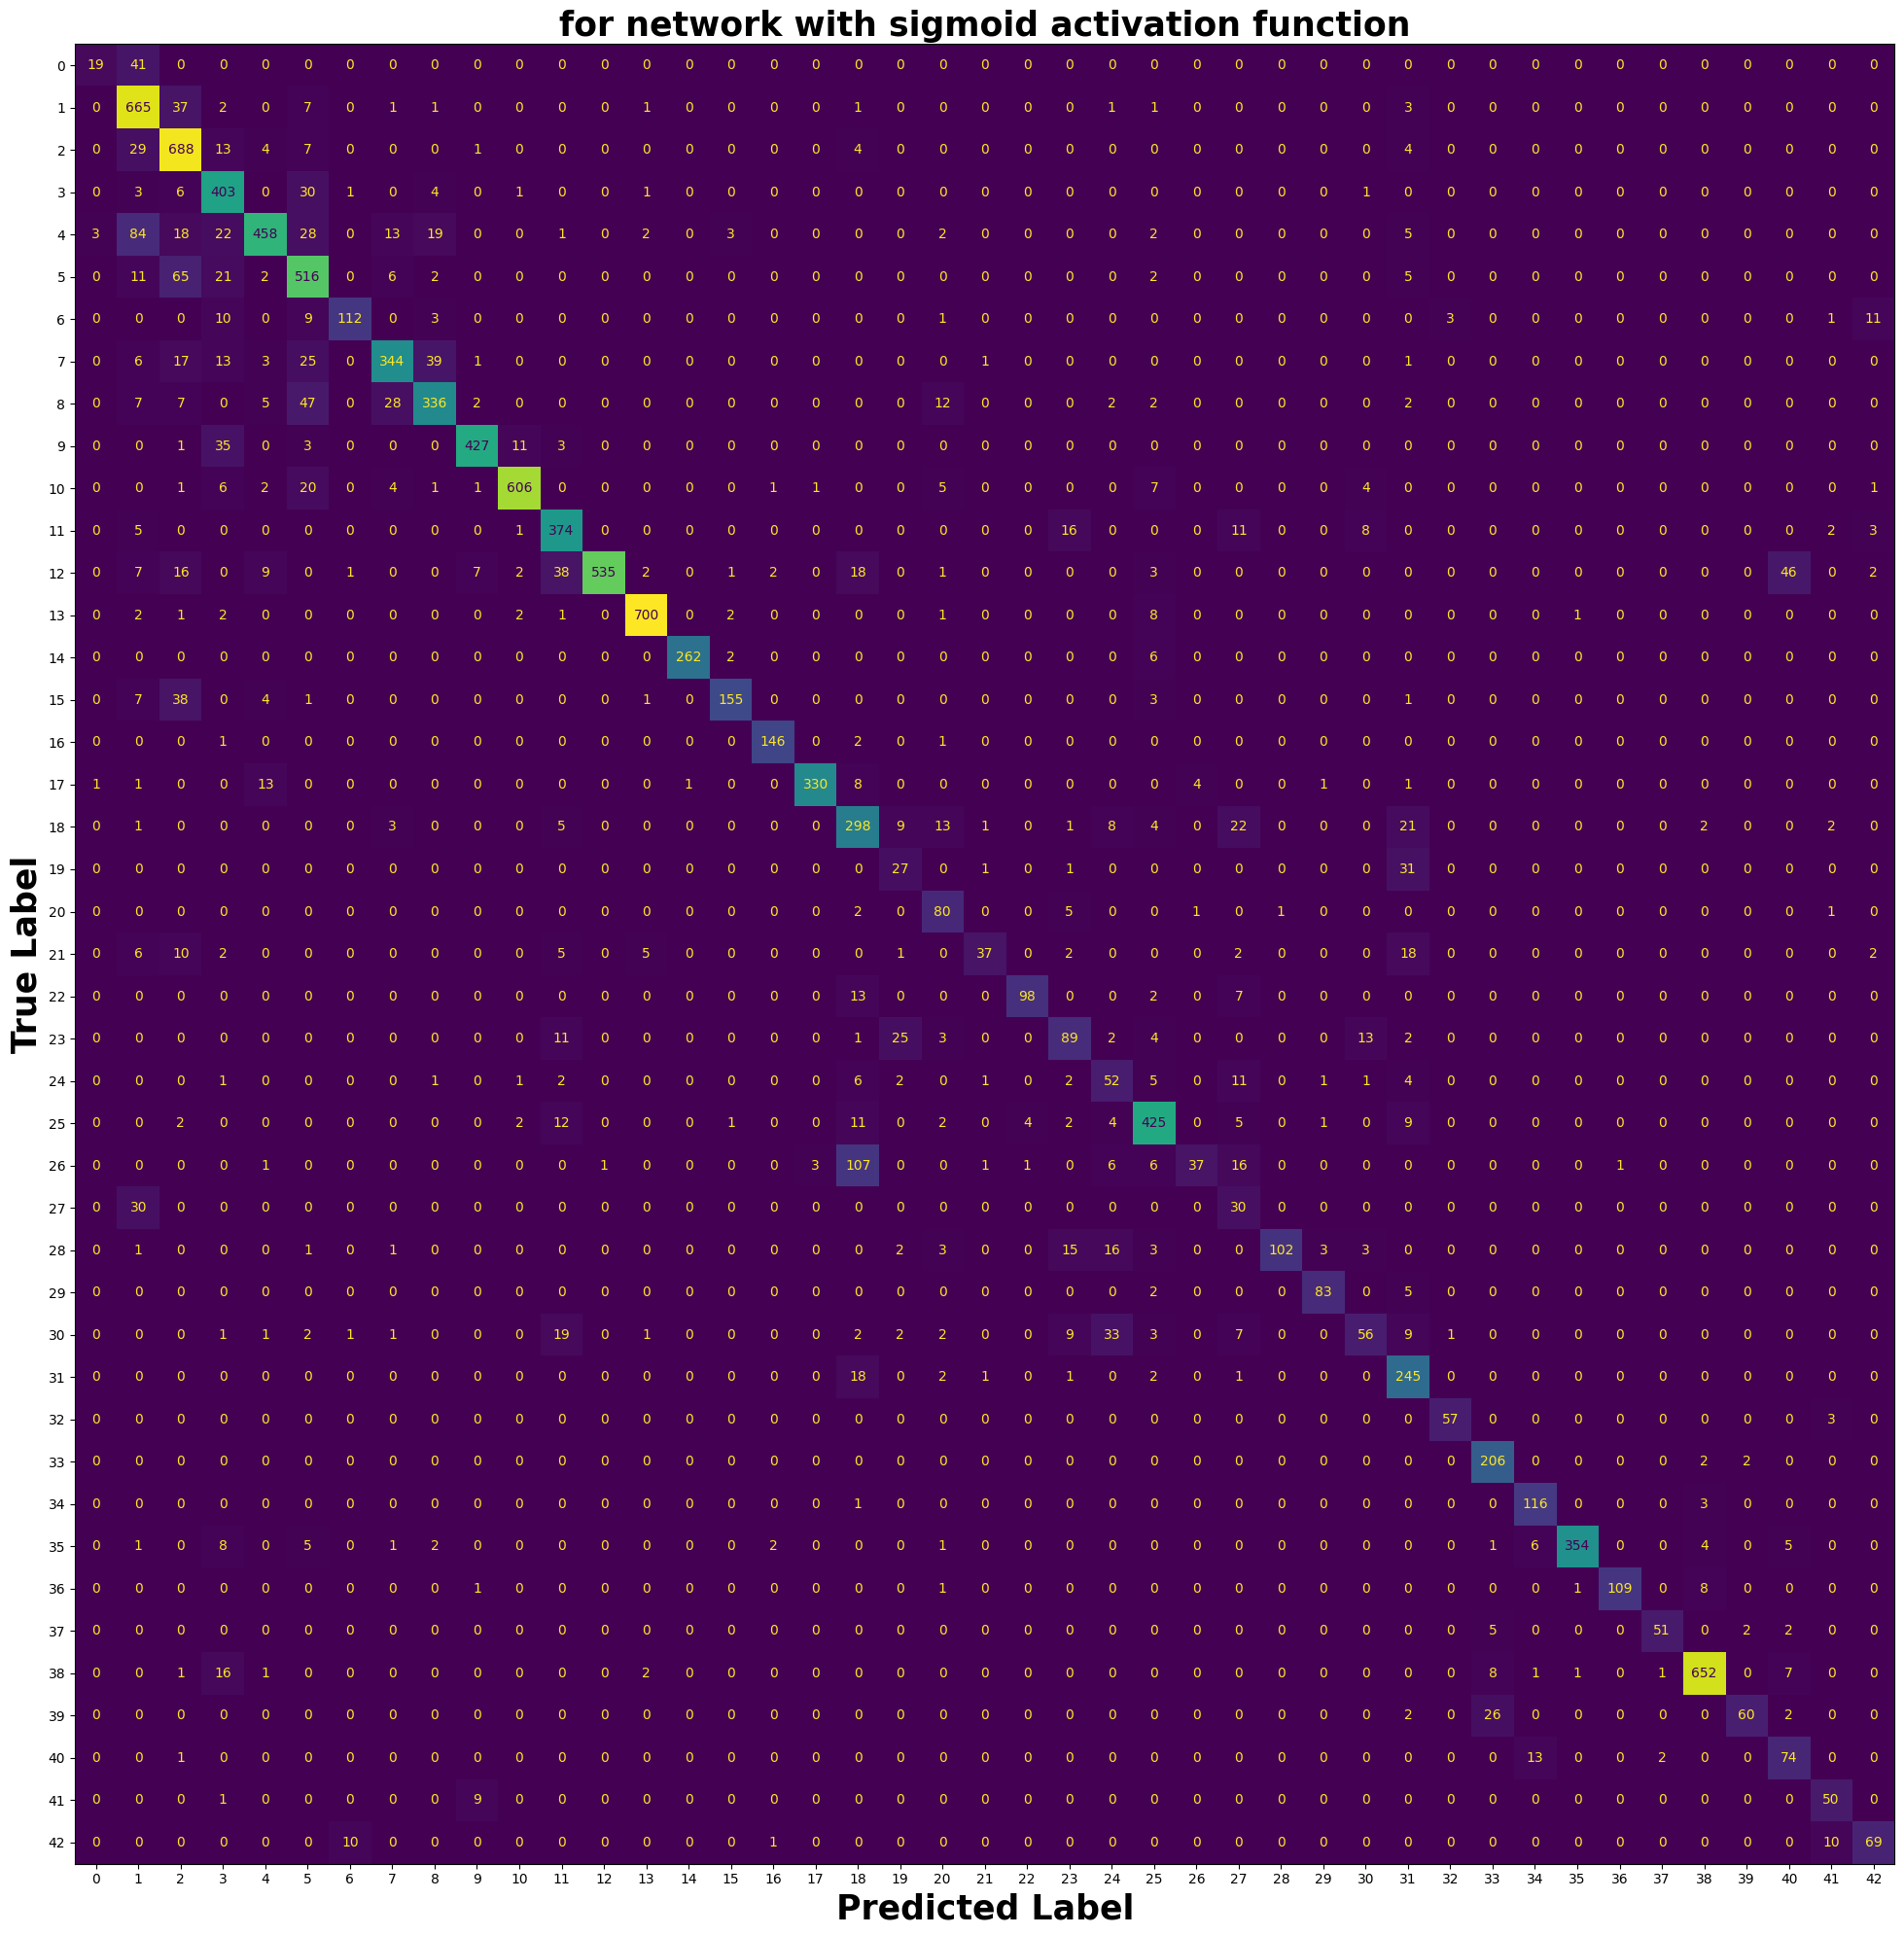

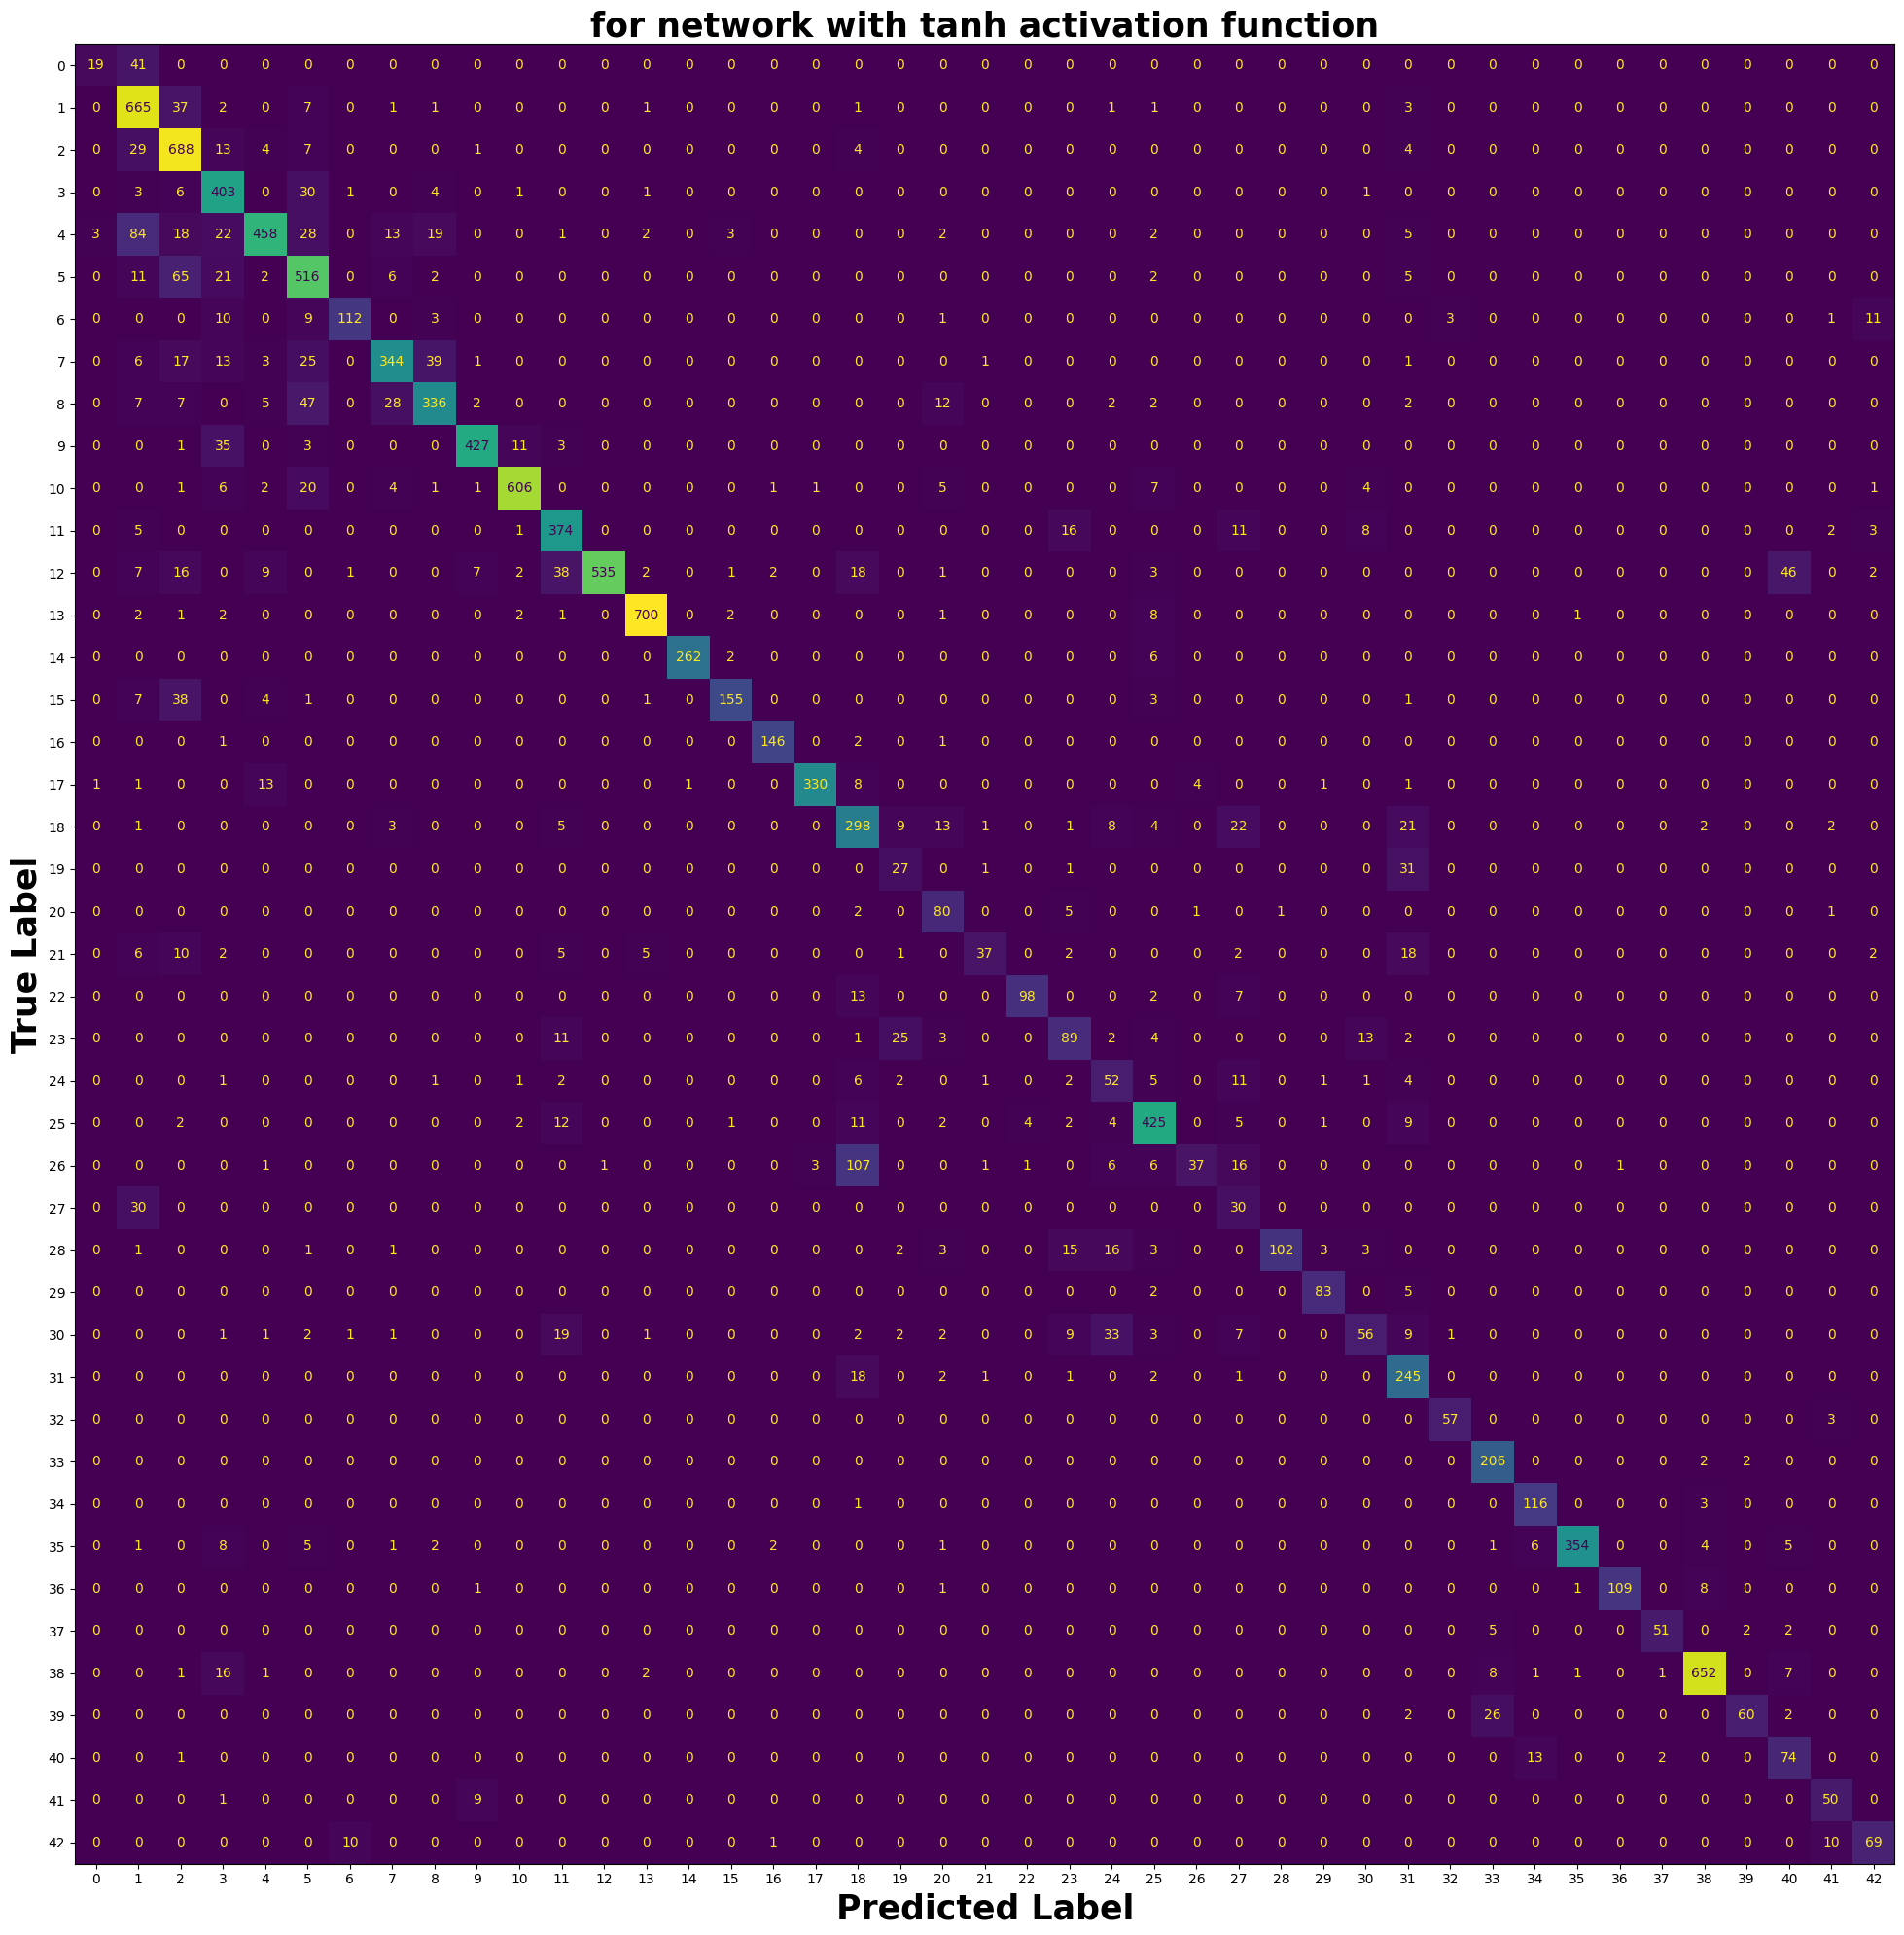

In [106]:
ypred_sigmoid = argmax(ypred_sigmoid) # Considering SGD Optimizer for CNN Network wit MaxPooling
CategCM_CNN_sigmoid = confusion_matrix(y_test, ypred_sigmoid)

sigmoid_table = cm_df(CategCM_CNN_sigmoid,"CM for network with sigmoid activation function") 
                                                    #The Network contains MaxPooling and Adam optimizer
                                                        #without dropout layers as optimum respose 
                                                            #of previous section
confusion_Matrix_pic(y_test, ypred_sigmoid,'for network with sigmoid activation function')


ypred_tanh = argmax(ypred_tanh) # Considering SGD Optimizer for CNN Network wit MaxPooling
CategCM_CNN_tanh = confusion_matrix(y_test, ypred_tanh)

tanh_table = cm_df(CategCM_CNN_tanh,"CM for network with with tanh activation function") 
                                                    #The Network contains MaxPooling and Adam optimizer
                                                        #without dropout layers as optimum respose 
                                                            #of previous section
confusion_Matrix_pic(y_test, ypred_tanh,'for network with tanh activation function')

# Data Augmentation Section

### Example of Data Augmentation

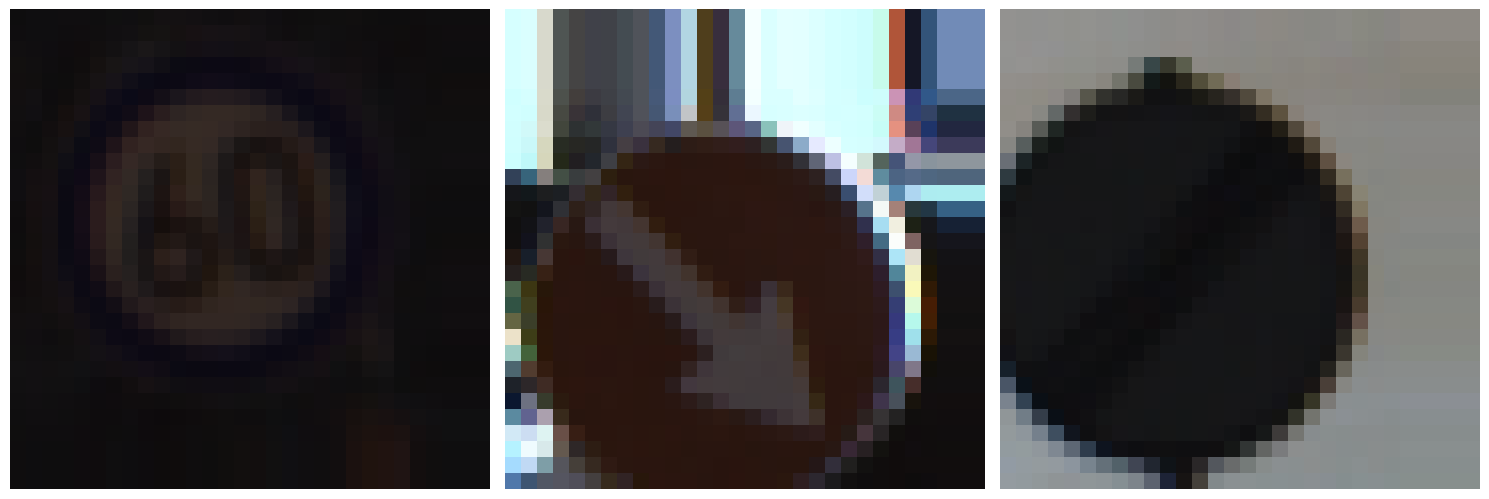

In [144]:
# ImageDataGenerator shifting
datagenn = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)

# iterator
aug_iter = datagenn.flow(X_train*255.0, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(aug_iter)[0].astype('uint8')
 
    # plot image
    ax[i].imshow(image)
    ax[i].axis('off')

In [120]:
def CNN_dataAug(X_train,y_train,X_valid,y_valid,X_test,y_test,epochs):
    
    datagen = ImageDataGenerator(rotation_range = 15,  #Brightness
                                zoom_range = 0.15,  #zoom
                                height_shift_range=0.15, # vertical shift)
    
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation = 'tanh' , input_shape = (30,30,3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="same"))
    model.add(Conv2D(32,(3,3),activation = 'tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="same"))
    model.add(Flatten())
    model.add(Dense(128,activation = tf.nn.tanh))
    model.add(Dense(43,activation = tf.nn.softmax))

    model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
    
    history = model.fit(datagen.flow(X_train,y_train,batch_size = 64),epochs = epochs, 
                        validation_data = (X_valid,y_valid))
    CNN_result = pd.DataFrame(history.history)
    CNN_result['epoch'] = history.epoch
    y_pred = model.predict(X_test)

    return CNN_result,y_pred

In [121]:
CNN_aug_result, ypred_CNN_aug  =CNN_dataAug(X_train,y_train,X_valid,y_valid,X_test,y_test,epoch20)


Epoch 1/20
552/552 [==============================] - 24s 41ms/step - loss: 1.4670 - accuracy: 0.5903 - val_loss: 0.4965 - val_accuracy: 0.8674
Epoch 2/20
552/552 [==============================] - 23s 42ms/step - loss: 0.5398 - accuracy: 0.8444 - val_loss: 0.2549 - val_accuracy: 0.9362
Epoch 3/20
552/552 [==============================] - 23s 41ms/step - loss: 0.3552 - accuracy: 0.9006 - val_loss: 0.1637 - val_accuracy: 0.9643
Epoch 4/20
552/552 [==============================] - 22s 40ms/step - loss: 0.2634 - accuracy: 0.9265 - val_loss: 0.1212 - val_accuracy: 0.9725
Epoch 5/20
552/552 [==============================] - 22s 40ms/step - loss: 0.2091 - accuracy: 0.9415 - val_loss: 0.0970 - val_accuracy: 0.9765
Epoch 6/20
552/552 [==============================] - 22s 40ms/step - loss: 0.1743 - accuracy: 0.9519 - val_loss: 0.0763 - val_accuracy: 0.9814
Epoch 7/20
552/552 [==============================] - 22s 40ms/step - loss: 0.1533 - accuracy: 0.9576 - val_loss: 0.0678 - val_accuracy:

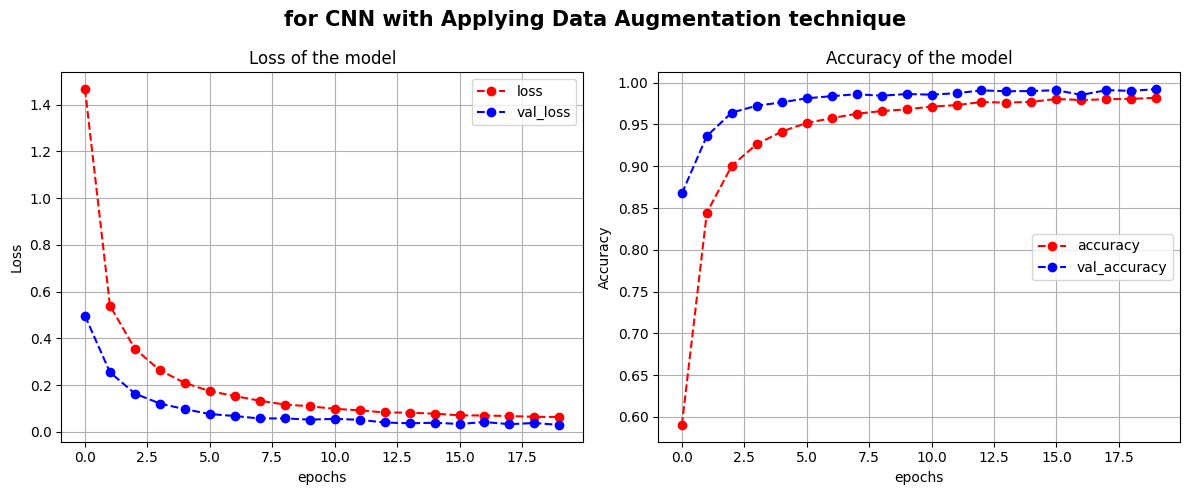

CNN with Applying Data Augmentation:
         loss  accuracy  val_loss  val_accuracy  epoch
17  0.067775  0.980248  0.033053      0.991074     17
18  0.064394  0.980730  0.037808      0.990309     18
19  0.063750  0.981977  0.029631      0.992349     19


In [122]:
CNN_Aug_name = f"for CNN with Applying Data Augmentation technique"
disp_result(CNN_aug_result,CNN_Aug_name)

print("CNN with Applying Data Augmentation:\n",CNN_aug_result.tail(3))

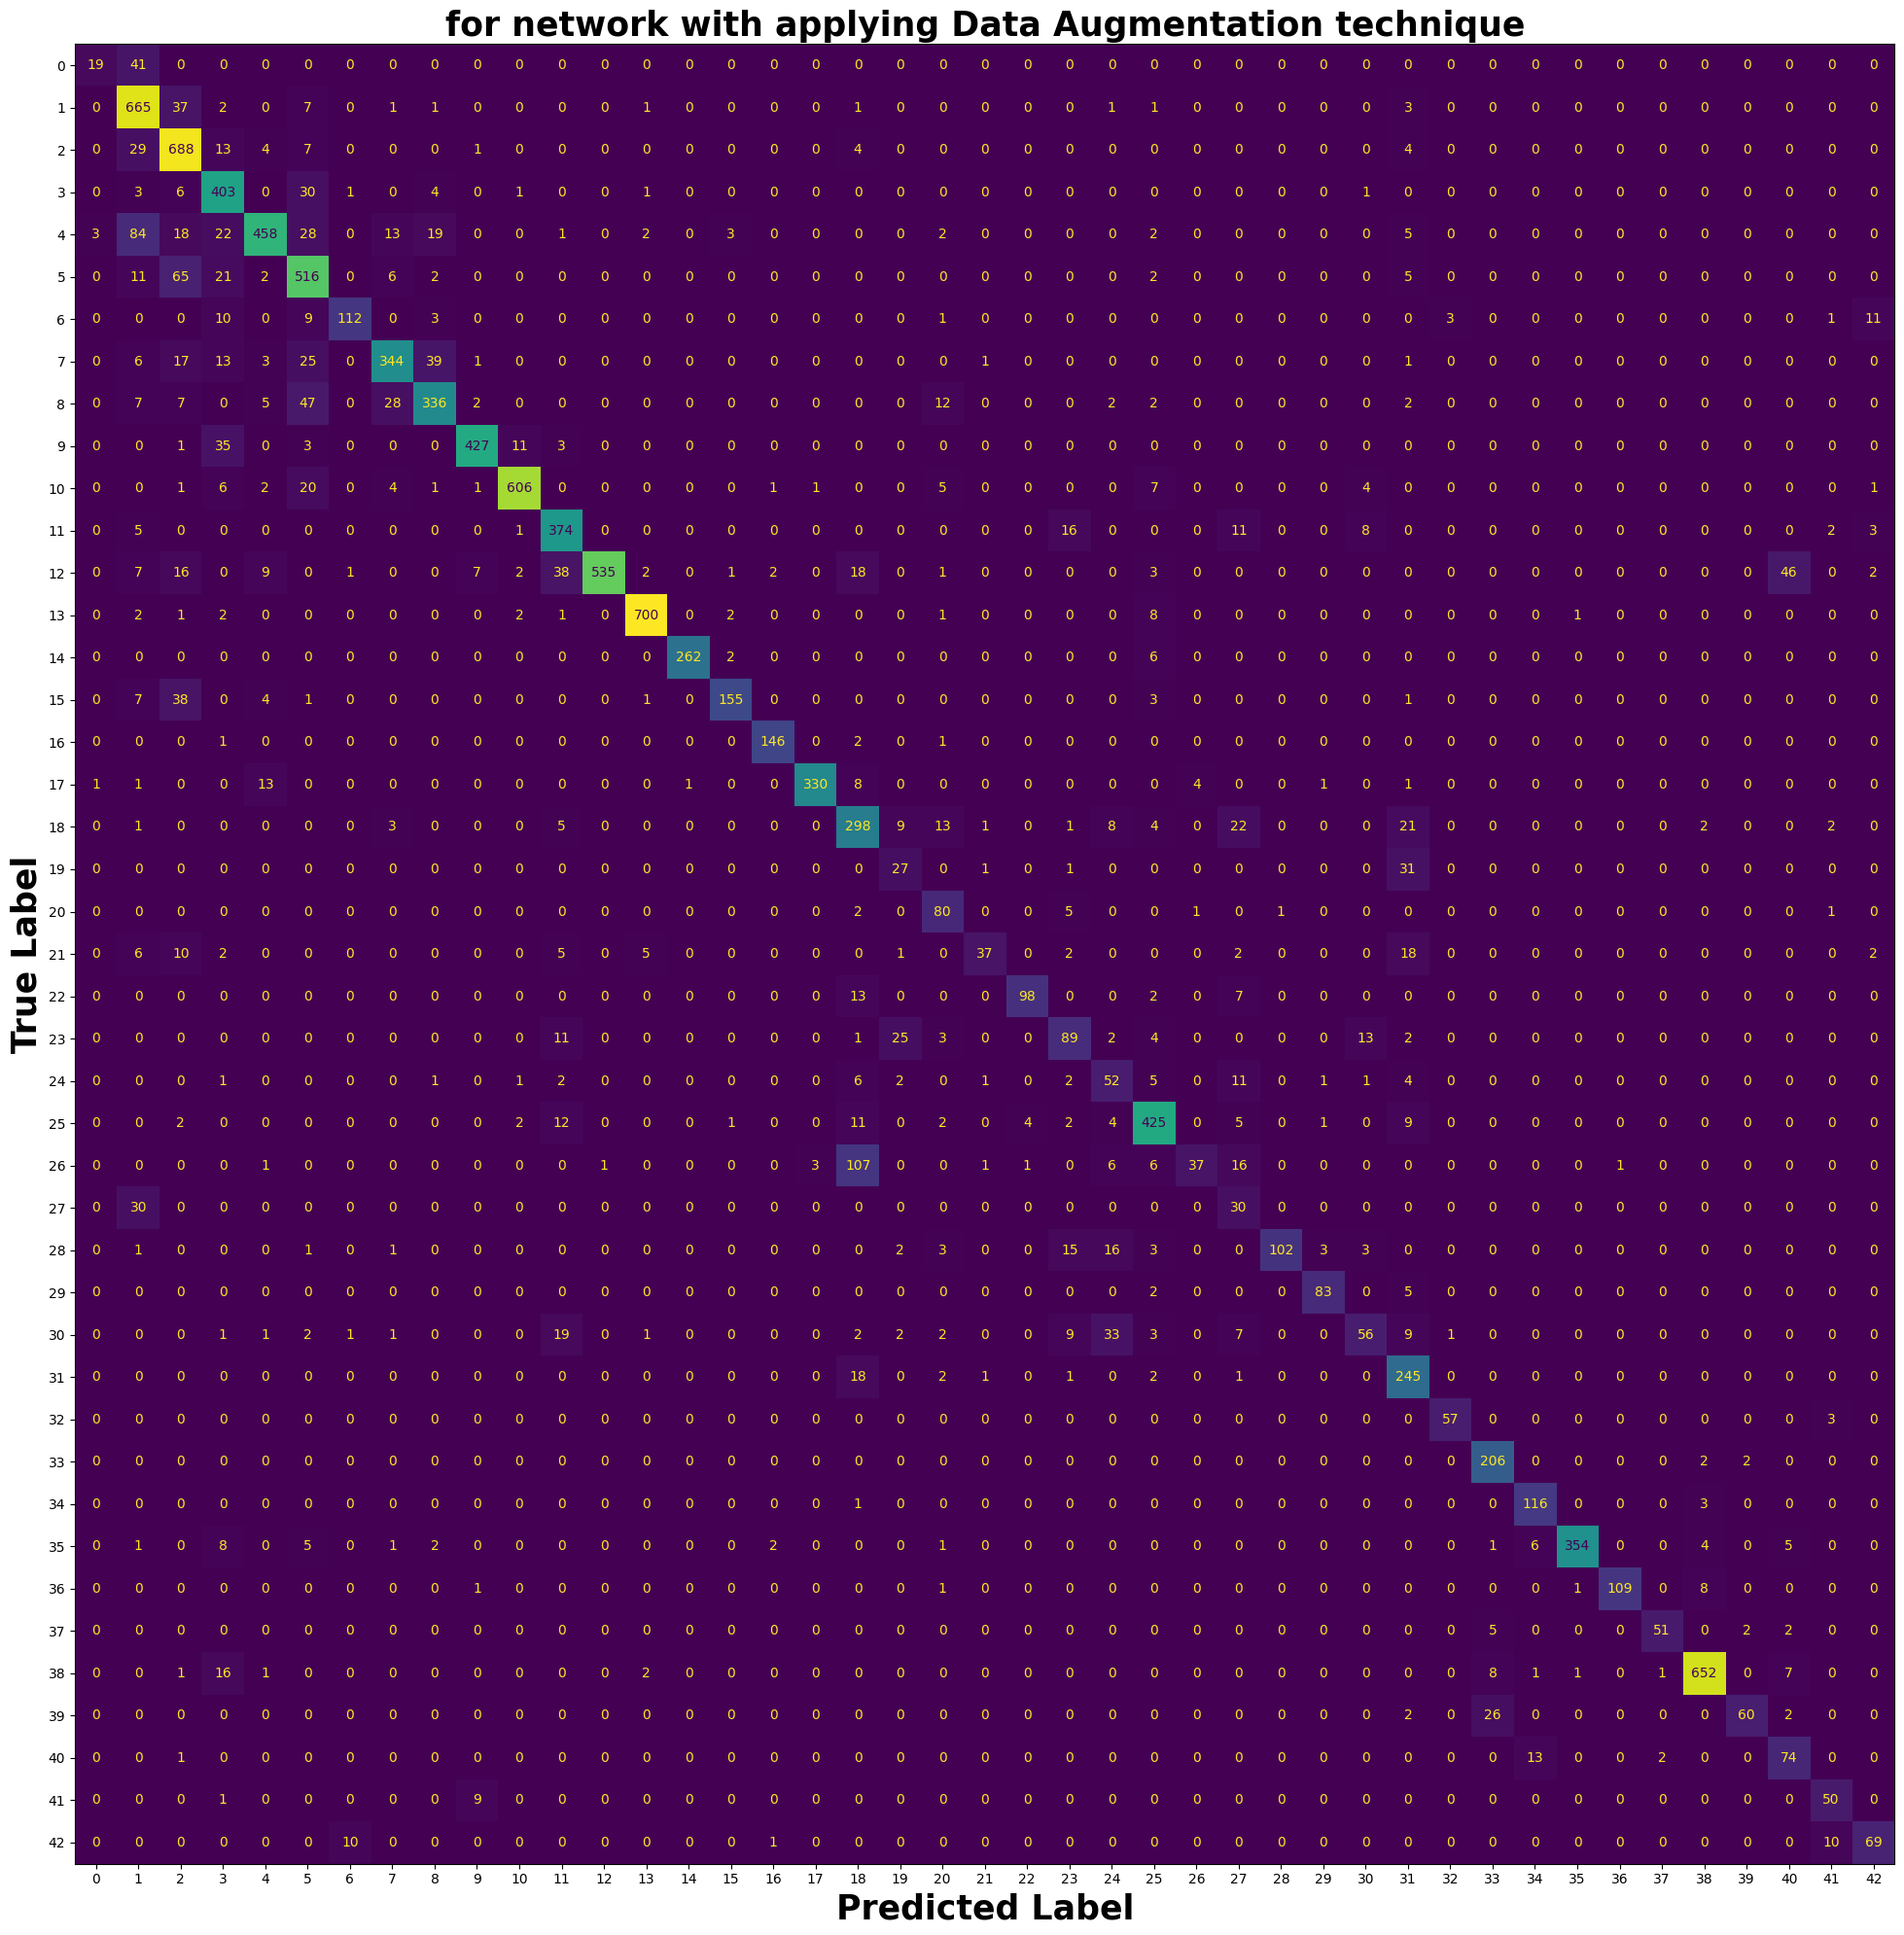

Accuracy score: 0.8339667458432304


In [145]:
ypred_CNN_aug = argmax(ypred_CNN_aug) 
CategCM_CNN_Aug = confusion_matrix(y_test, ypred_CNN_aug)

tanh_table = cm_df(CategCM_CNN_Aug,"CM for network with applying Data Augmentation technique") 
                                                  
confusion_Matrix_pic(y_test, ypred_CNN_aug,'for network with applying Data Augmentation technique')